# Milestone 1 - EDA and Preprocessing data


- Load the Dataset


> Make sure to include markdown-based text commenting and explaining each step you perform.


# 1 - Extraction


Required Libraries for EDA


In [312]:
# importing libraries

# Data manipulation and preprocessing
import pandas as pd
import numpy as np
import requests
import time

# Data visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup

# Cool plotting style
plt.style.use('ggplot')
rcParams['figure.figsize'] = 12, 6

Set an option to display all columns


In [2]:
pd.set_option('display.max_columns', None)

Function to load the dataset


In [3]:
def load_data(data_path):
    # Load the data
    data = pd.read_csv(data_path)
    return data

In [4]:
data_path = 'data/fintech_data_22_52_14669.csv'
df = load_data(data_path)

# 2- EDA


Showing the first 5 rows of the dataset


In [5]:
df.head()

Customer Id                Emp Title  \
0  YidceGZkXHgxZmtceGY1XHhiOFx4MDN3XHg4MnxceGUxXH...              Lieutenant    
1  YidUXHhhZlx4YTVcdFx4ZmYhRWpbXHhmMDRceDE4WE03XH...  Senior Film Management    
2  YidceGY5KUBceGVkXHhiOW9ceGI2ZVx4ZmVceGYze1x4YW...              Machinist 2   
3  Yid3XHgwMVxyQVx4MTQxXHg5OFx4YjVceGMxPVx4OGZceD...         customer service   
4  YidceGFhXHgxMn5cblx4OGJceDkwXHhjN1x4YjRMR1x4Yz...                   Drivet   

  Emp Length Home Ownership  Annual Inc  Annual Inc Joint Verification Status  \
0  10+ years       MORTGAGE    200000.0               NaN     Source Verified   
1  10+ years       MORTGAGE     63000.0               NaN            Verified   
2     1 year            OWN     30000.0               NaN            Verified   
3  10+ years           RENT     20000.0               NaN            Verified   
4    2 years           RENT     48000.0               NaN     Source Verified   

  Zip Code Addr State  Avg Cur Bal  Tot Cur Bal  Loan Id  Loan Status  \
0    117xx         NY      19404.0     329872.0   197838      Current   
1    441xx         OH       1946.0      38927.0   124597      Current   
2    972xx         OR      22762.0     136571.0   107933  Charged Off   
3    486xx         MI       1610.0       9662.0    63136  Charged Off   
4    334xx         FL       5341.0      48069.0    20511      Current   

   Loan Amount State  Funded Amount        Term  Int Rate  Grade  \
0      20000.0    NY        20000.0   60 months    0.1240      6   
1      12000.0    OH        12000.0   60 months    0.0993      7   
2      10750.0    OR        10750.0   36 months    0.1952     23   
3       8000.0    MI         8000.0   36 months    0.0789      2   
4       4200.0    FL         4200.0   36 months    0.0993      8   

         Issue Date  Pymnt Plan        Type             Purpose  \
0    19 August 2019       False  Individual  debt_consolidation   
1  17 November 2017       False  Individual         credit_card   
2     15 March 2015       False  Individual  debt_consolidation   
3     15 March 2015       False  Individual         credit_card   
4  17 December 2017       False  Individual  debt_consolidation   

               Description  
0       Debt consolidation  
1  Credit card refinancing  
2       Debt consolidation  
3  Credit card refinancing  
4       Debt consolidation

Showing the last 5 rows of the dataset


In [6]:
df.tail()

Customer Id  \
27025  YidceGYxXHhkMTAkXHhlNnNceDE0ZVx4ZTBceGI3XHJceG...   
27026  YidceDgwW1x4MDJceGM4TipceGRkXHgwZWBiNlx4OTZceD...   
27027  YidceGJlXHhmYlx4YTJccldceDAzSFx4OTJceGEwXHhmNF...   
27028  YiI/XHg5Nz5ceDk0MFx4ZWFqd1ZceGM4RlZceDgyXHg4Zm...   
27029  YiJceDliIEJHXHhhY1x4ZTFrXHhiOVx4MTRceDg0XHhkMG...   

                      Emp Title Emp Length Home Ownership  Annual Inc  \
27025                       HHA  10+ years           RENT     45000.0   
27026            Letter Carrier  10+ years       MORTGAGE     91500.0   
27027   Chief building engineer     1 year            OWN     95000.0   
27028           Field Inspector   < 1 year            OWN     27500.0   
27029  Senior Center Specialist    7 years       MORTGAGE     31000.0   

       Annual Inc Joint Verification Status Zip Code Addr State  Avg Cur Bal  \
27025          170000.0        Not Verified    100xx         NY       3057.0   
27026               NaN     Source Verified    331xx         FL      18327.0   
27027               NaN     Source Verified    088xx         NJ       3070.0   
27028               NaN        Not Verified    201xx         VA       2013.0   
27029          150000.0        Not Verified    300xx         GA      30713.0   

       Tot Cur Bal  Loan Id Loan Status  Loan Amount State  Funded Amount  \
27025      36682.0   200561     Current      20000.0    NY        20000.0   
27026     256580.0    13029     Current       3200.0    FL         3200.0   
27027      30702.0   147842     Current      15000.0    NJ        15000.0   
27028      10064.0    84652     Current      10000.0    VA        10000.0   
27029     245706.0    63573     Current       8000.0    GA         8000.0   

             Term  Int Rate  Grade        Issue Date  Pymnt Plan        Type  \
27025   60 months    0.1709     16  18 February 2018       False   Joint App   
27026   36 months    0.1349     12   16 October 2016       False  INDIVIDUAL   
27027   36 months    0.0799      1   17 January 2017       False  Individual   
27028   36 months    0.0702      5  19 February 2019       False  Individual   
27029   36 months    0.0819      1      19 July 2019       False   Joint App   

                  Purpose              Description  
27025  debt_consolidation       Debt consolidation  
27026    home_improvement         Home improvement  
27027  debt_consolidation       Debt consolidation  
27028  debt_consolidation       Debt consolidation  
27029         credit_card  Credit card refinancing

Getting the size of the dataset (rows, columns)


In [7]:
df.shape

(27030, 24)

Getting short summary of the dataset


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27030 entries, 0 to 27029
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Id          27030 non-null  object 
 1   Emp Title            24654 non-null  object 
 2   Emp Length           25173 non-null  object 
 3   Home Ownership       27030 non-null  object 
 4   Annual Inc           27030 non-null  float64
 5   Annual Inc Joint     1920 non-null   float64
 6   Verification Status  27030 non-null  object 
 7   Zip Code             27030 non-null  object 
 8   Addr State           27030 non-null  object 
 9   Avg Cur Bal          27030 non-null  float64
 10  Tot Cur Bal          27030 non-null  float64
 11  Loan Id              27030 non-null  int64  
 12  Loan Status          27030 non-null  object 
 13  Loan Amount          27030 non-null  float64
 14  State                27030 non-null  object 
 15  Funded Amount        27030 non-null 

Getting statistical summary of the dataset


In [9]:
df.describe()

Annual Inc  Annual Inc Joint    Avg Cur Bal   Tot Cur Bal  \
count  2.703000e+04      1.920000e+03   27030.000000  2.703000e+04   
mean   8.038403e+04      1.306625e+05   13642.988272  1.447128e+05   
std    1.059586e+05      8.254032e+04   16946.032082  1.663899e+05   
min    2.000000e+03      2.300000e+04       0.000000  0.000000e+00   
25%    4.784000e+04      8.500000e+04    3075.000000  2.938375e+04   
50%    6.631050e+04      1.150000e+05    7399.000000  8.040300e+04   
75%    9.500000e+04      1.546250e+05   18838.500000  2.157390e+05   
max    7.691779e+06      1.750000e+06  555925.000000  4.447397e+06   

             Loan Id   Loan Amount  Funded Amount      Int Rate         Grade  
count   27030.000000  27030.000000   27030.000000  25819.000000  27030.000000  
mean   134907.454569  15375.772290   15375.772290      0.130201     10.848946  
std     77931.494675   9437.017325    9437.017325      0.048821      6.304635  
min        11.000000   1000.000000    1000.000000      0.053100      1.000000  
25%     66868.750000   8000.000000    8000.000000      0.091700      6.000000  
50%    134591.500000  13000.000000   13000.000000      0.124900     10.000000  
75%    202027.000000  20000.000000   20000.000000      0.159900     15.000000  
max    270296.000000  40000.000000   40000.000000      0.309900     35.000000

Showing correlation between the columns


In [10]:
df.isnull().sum()

Customer Id                0
Emp Title               2376
Emp Length              1857
Home Ownership             0
Annual Inc                 0
Annual Inc Joint       25110
Verification Status        0
Zip Code                   0
Addr State                 0
Avg Cur Bal                0
Tot Cur Bal                0
Loan Id                    0
Loan Status                0
Loan Amount                0
State                      0
Funded Amount              0
Term                       0
Int Rate                1211
Grade                      0
Issue Date                 0
Pymnt Plan                 0
Type                       0
Purpose                    0
Description              218
dtype: int64

In [11]:
df.corr()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23968\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Annual Inc  Annual Inc Joint  Avg Cur Bal  Tot Cur Bal  \
Annual Inc          1.000000          0.807666     0.200797     0.280257   
Annual Inc Joint    0.807666          1.000000     0.319660     0.532043   
Avg Cur Bal         0.200797          0.319660     1.000000     0.838531   
Tot Cur Bal         0.280257          0.532043     0.838531     1.000000   
Loan Id             0.193089          0.269267     0.215304     0.286228   
Loan Amount         0.213653          0.292910     0.233255     0.307663   
Funded Amount       0.213653          0.292910     0.233255     0.307663   
Int Rate           -0.051575         -0.126253    -0.071312    -0.073880   
Grade              -0.053609         -0.122337    -0.070092    -0.072861   
Pymnt Plan         -0.003675         -0.007107    -0.001721     0.000318   

                   Loan Id  Loan Amount  Funded Amount  Int Rate     Grade  \
Annual Inc        0.193089     0.213653       0.213653 -0.051575 -0.053609   
Annual Inc Joint  0.269267     0.292910       0.292910 -0.126253 -0.122337   
Avg Cur Bal       0.215304     0.233255       0.233255 -0.071312 -0.070092   
Tot Cur Bal       0.286228     0.307663       0.307663 -0.073880 -0.072861   
Loan Id           1.000000     0.962091       0.962091  0.092914  0.087354   
Loan Amount       0.962091     1.000000       1.000000  0.061984  0.057044   
Funded Amount     0.962091     1.000000       1.000000  0.061984  0.057044   
Int Rate          0.092914     0.061984       0.061984  1.000000  0.922195   
Grade             0.087354     0.057044       0.057044  0.922195  1.000000   
Pymnt Plan       -0.001695    -0.002848      -0.002848 -0.000177 -0.000969   

                  Pymnt Plan  
Annual Inc         -0.003675  
Annual Inc Joint   -0.007107  
Avg Cur Bal        -0.001721  
Tot Cur Bal         0.000318  
Loan Id            -0.001695  
Loan Amount        -0.002848  
Funded Amount      -0.002848  
Int Rate           -0.000177  
Grade              -0.000969  
Pymnt Plan          1.000000

#### Functions to plot the data for visualization


In [12]:
def plot_correlation_matrix(df: pd.DataFrame, figsize: tuple):
    plt.figure(figsize=figsize)
    sns.heatmap(df.corr(), 
                cbar=True, 
                annot=True, 
                square=True, 
                cmap='Spectral_r', 
                fmt='.2f', 
                linewidths=2,
                annot_kws={'size': 15})
    plt.show()

def plot_histogram(df: pd.DataFrame, column_name: str, kde, figsize: tuple):
    plt.figure(figsize=figsize)
    sns.histplot(df[column_name], kde=kde)
    plt.title(f'Distribution of {column_name}')
    plt.show()

def plot_boxplot_single_column(df: pd.DataFrame, column_name: str, figsize: tuple):
    plt.figure(figsize=figsize)
    sns.boxplot(x=column_name, data=df)
    plt.title(f'Boxplot of {column_name}')
    plt.show()

def plot_boxplot_multiple_columns(df: pd.DataFrame, 
                                  column_name1:str, 
                                  column_name2: str, 
                                  title: str, 
                                  x_label: str, 
                                  y_label: str, 
                                  figsize: tuple):
    plt.figure(figsize=figsize)
    sns.boxplot(x=column_name1, y=column_name2, data=df)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

def plot_vertical_countplot(df: pd.DataFrame, column_name: str, figsize: tuple):
    plt.figure(figsize=figsize)
    sns.countplot(x=column_name, data=df)
    plt.title(f'Countplot of {column_name}')
    plt.show()

def plot_horizontal_countplot(df: pd.DataFrame, column_name: str, figsize: tuple):
    plt.figure(figsize=figsize)
    # sorted
    sns.countplot(y=column_name, data=df, order = df[column_name].value_counts().index)
    plt.title(f'Countplot of {column_name}')
    plt.show()

def plot_countplot_multiple_columns(df: pd.DataFrame, 
                                  column_name1:str, 
                                  column_name2: str, 
                                  title: str, 
                                  x_label: str, 
                                  y_label: str, 
                                  figsize: tuple):
    plt.figure(figsize=figsize)
    sns.countplot(data=df, x=column_name1, hue=column_name2, palette='Set2')
    plt.title(title)
    plt.xlabel(column_name1)
    plt.ylabel('Count')
    plt.legend(title=column_name2)
    plt.xticks(rotation=45)
    plt.show()


def plot_top_n_barplot(df: pd.DataFrame, n: int, title: str, figsize: tuple):
    plt.figure(figsize=figsize)
    sns.barplot(x=df.values[:n], y=df.index[:n])
    plt.title(f'Top {n} {title}')
    plt.xlabel('Count')
    plt.ylabel('Category')
    plt.show()

def plot_scatterplot(df: pd.DataFrame, x:str, y:str, figsize: tuple):
    plt.figure(figsize=figsize)
    sns.scatterplot(x=x, y=y, data=df)
    plt.title(f'{x} vs {y}')
    plt.show()

def plot_scatter_average(df: pd.DataFrame, columnName1: str, columnName2: str, figsize: tuple):
  average = df.groupby(columnName1)[columnName2].mean()
  plt.figure(figsize=figsize)
  plt.xlabel(columnName1)
  plt.ylabel(columnName2)
  plt.title(columnName2+' VS. '+columnName1)
  plt.scatter(average.index,average)
  plt.show()

Showing Relationship between features


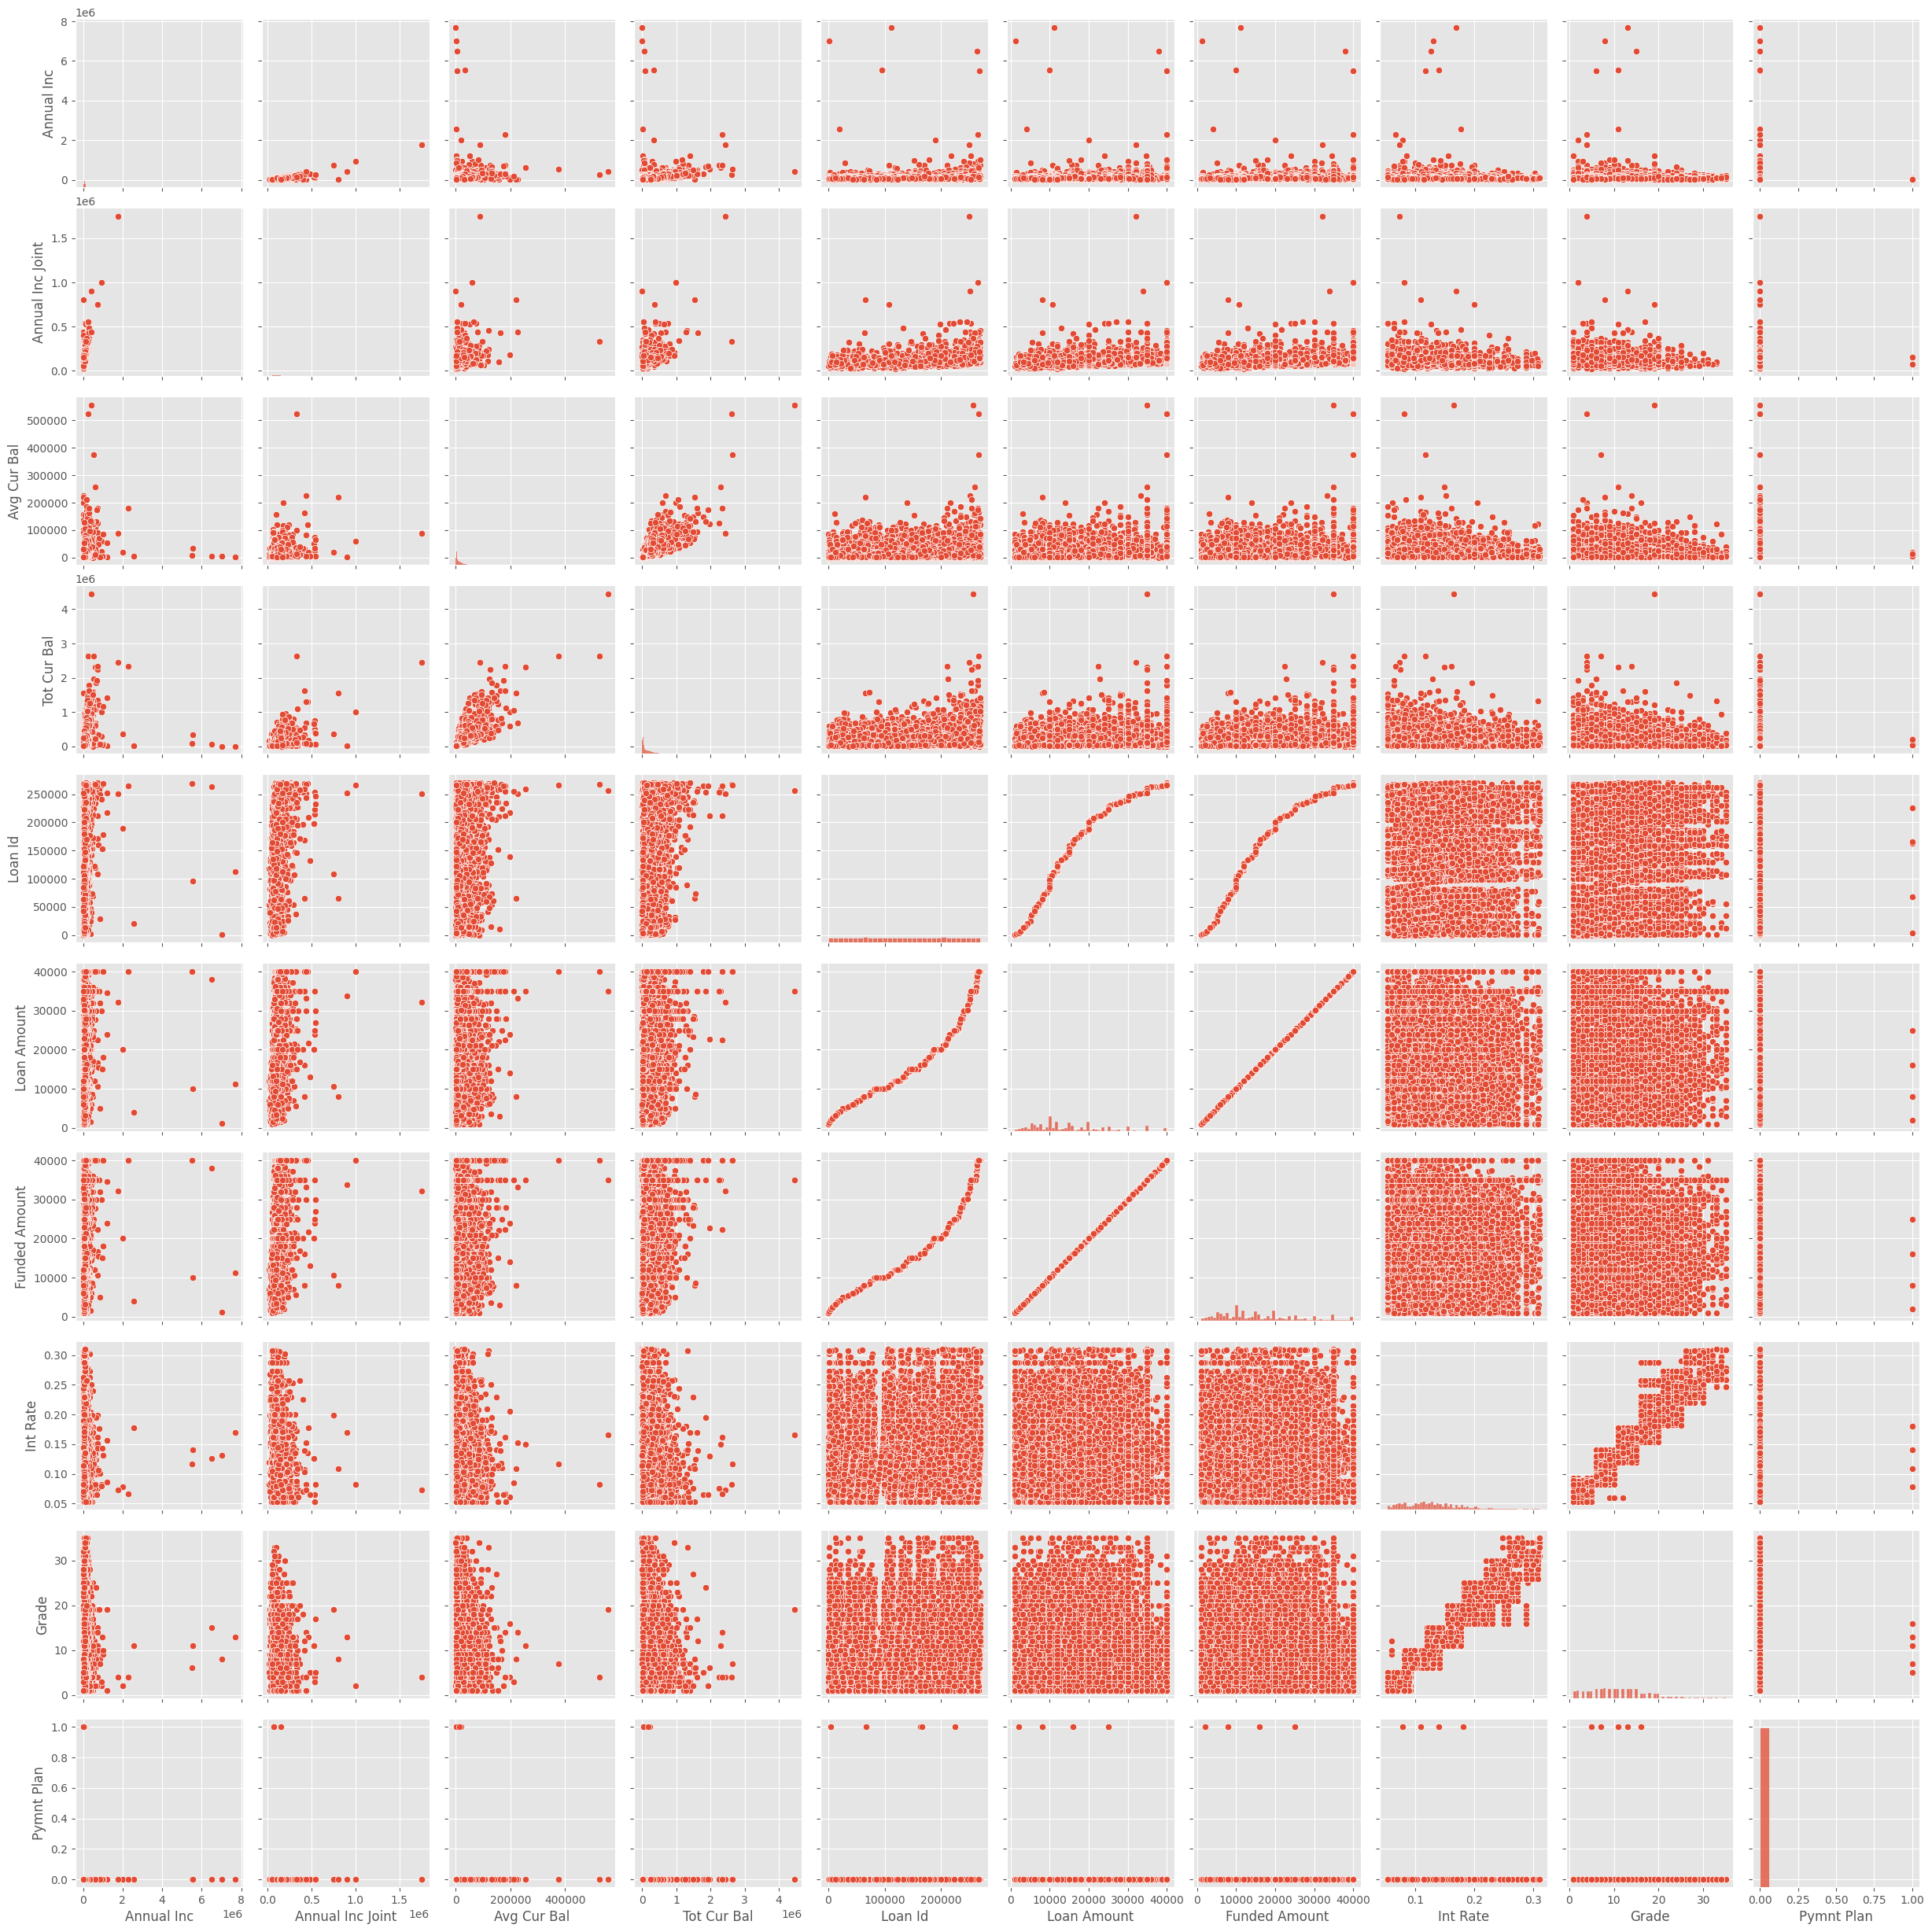

In [13]:
sns.pairplot(df)

Studying correlation between features


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23968\628346930.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


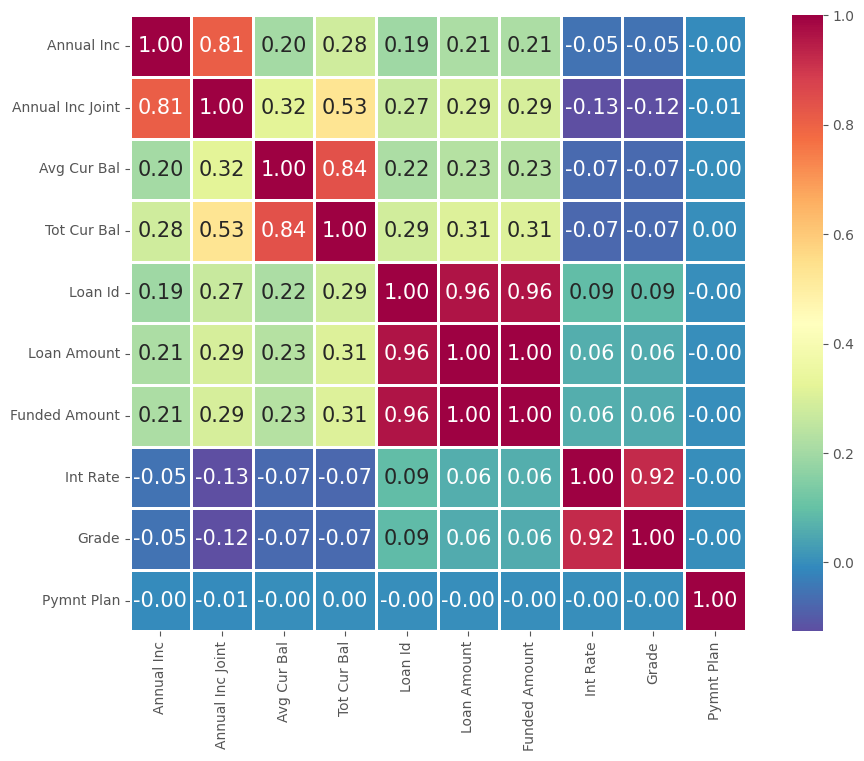

In [14]:
plot_correlation_matrix(df, (12, 8))

- Q1: What is the distribution loan amount among customers?

Answer: The distribution of loan amount among customers is right-skewed, with most customers having a loan amount of around 10000. We can observe that most loans fall within a specific range indicating that customers tend to borrow moderate amounts.


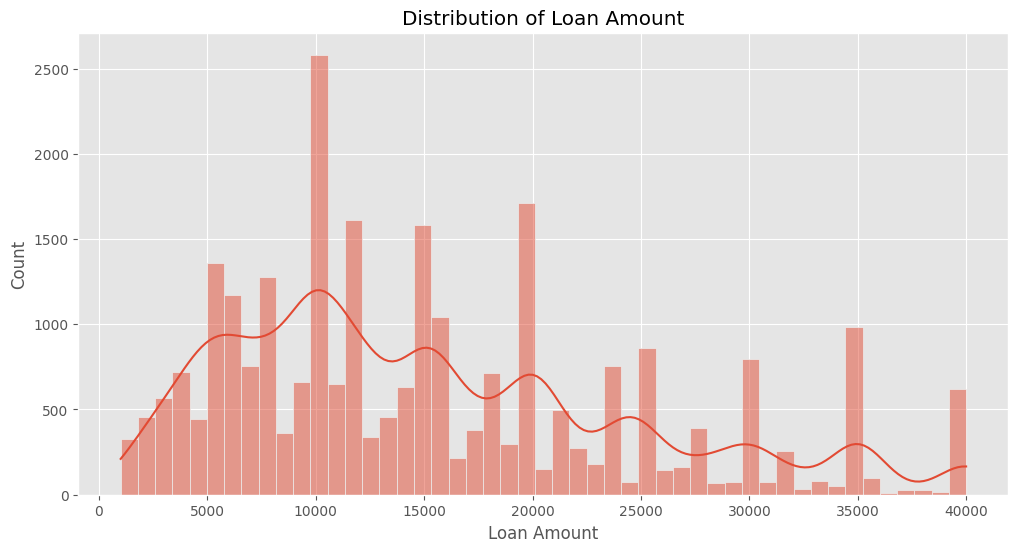

In [15]:
plot_histogram(df, column_name='Loan Amount', kde=True, figsize=(12, 6))

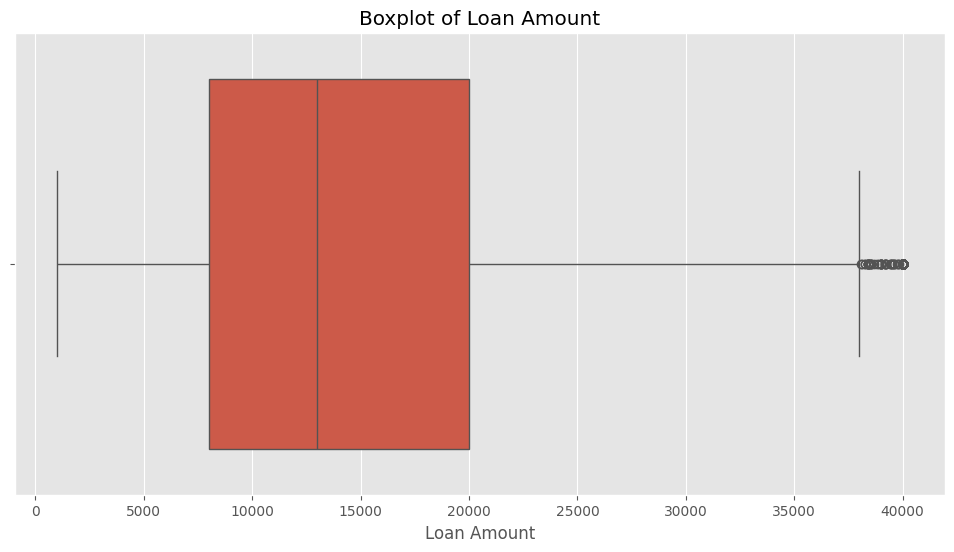

In [16]:
plot_boxplot_single_column(df, column_name='Loan Amount', figsize=(12, 6))

- Q2: What is the top 10 employee title that issue a loan?

Answer: We can observe that the top 10 employee titles that issue loans are Teacher, Manager, Owner, Registered Nurse, Driver, Supervisor, Sales, Project Manager and Office Manager.


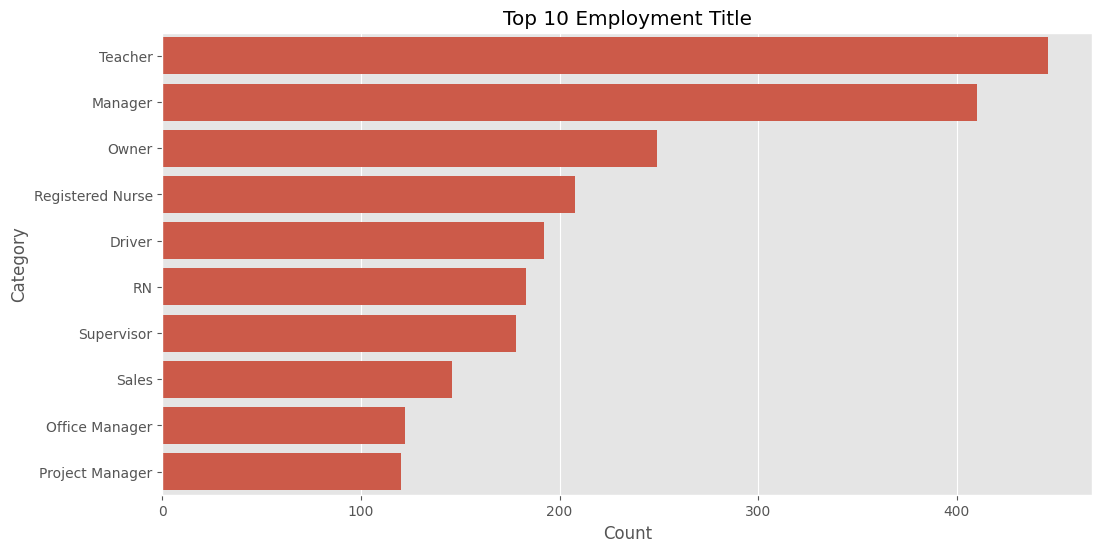

In [17]:
plot_top_n_barplot(df['Emp Title'].value_counts(), 10, 'Employment Title', figsize=(12, 6))

- Q3: What is the distribution of the number of years of employment among customers?

Answer: We can observe that employees with 10 years of employment are the most common among customers. The most customers that issue loan


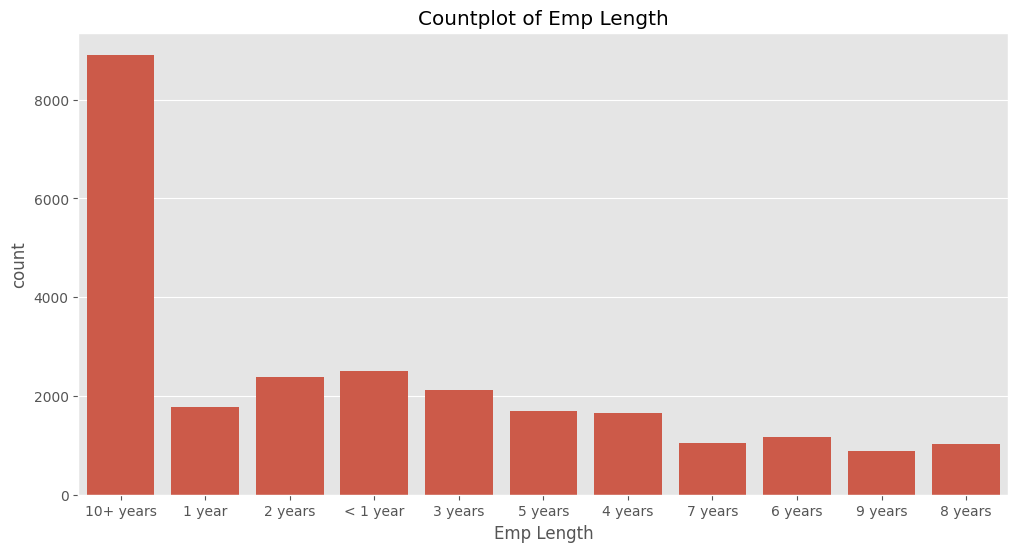

In [18]:
plot_vertical_countplot(df, 'Emp Length', figsize=(12, 6))

- Q4: What is the distribution of the loan amount among customers with different employment lengths?

Answer: Loan amounts do not vary significantly by employment length, but there is a slight increase in loan amounts for customers with longer employment. Customers with very short employment lengths also have smaller loan amounts on average.


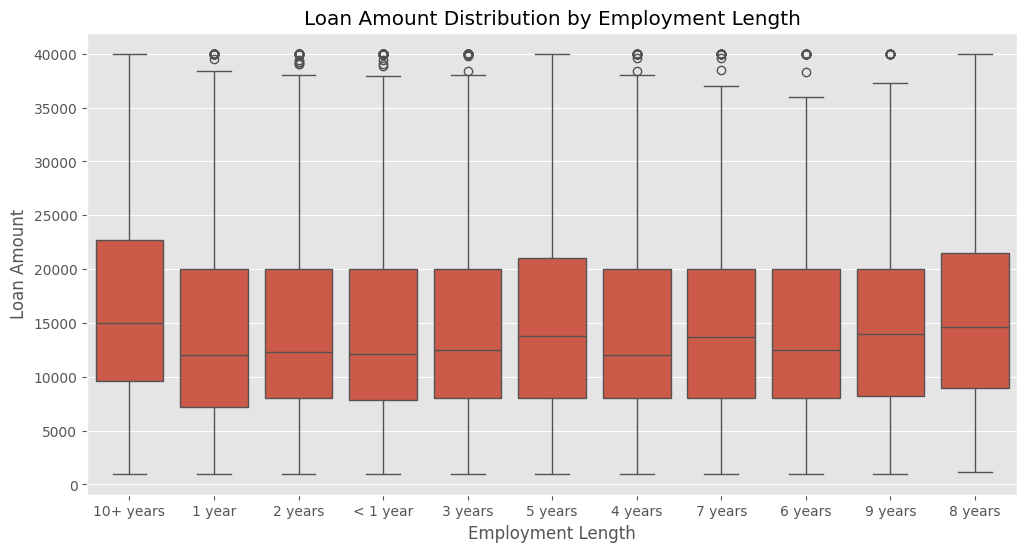

In [19]:
plot_boxplot_multiple_columns(df, 'Emp Length', 'Loan Amount', 'Loan Amount Distribution by Employment Length', 'Employment Length', 'Loan Amount', (12, 6))

- Q5: What is the relationship between the annual income and loan amount?

Answer: We can observe that there seems to be a positive trend, higher-income individuals generally take larger loans, yet the correlation is not strictly linear, suggesting that other factors may also influence loan amount.


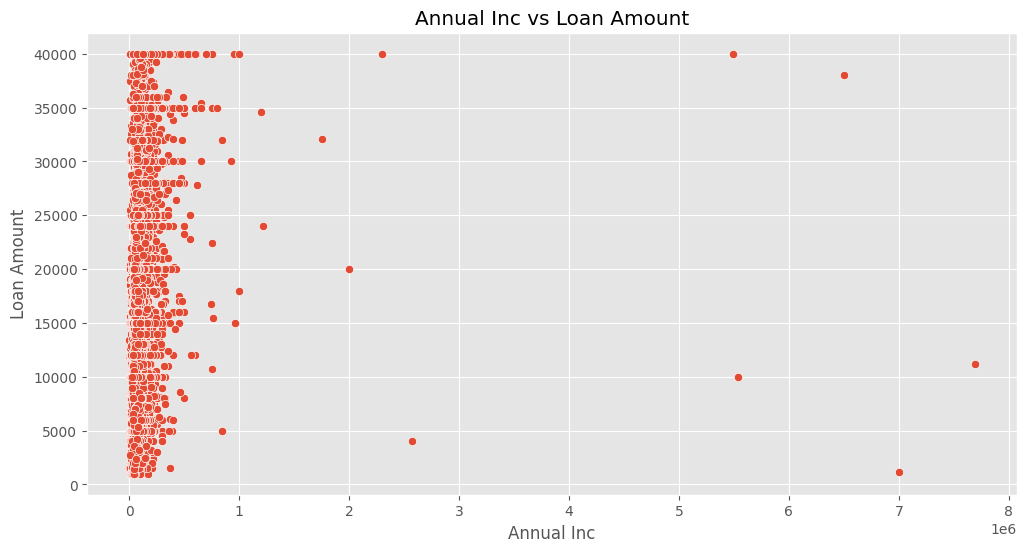

In [20]:
# relationship between annual income and loan amount
plot_scatterplot(df, 'Annual Inc', 'Loan Amount', figsize=(12, 6))

- Q6: Are most of the customer's income and employment verified?

Answer: We can observe that there is a high percentage of customers whose income and employment are not verified. This could be a potential risk that these customers may not be able to repay the loan.


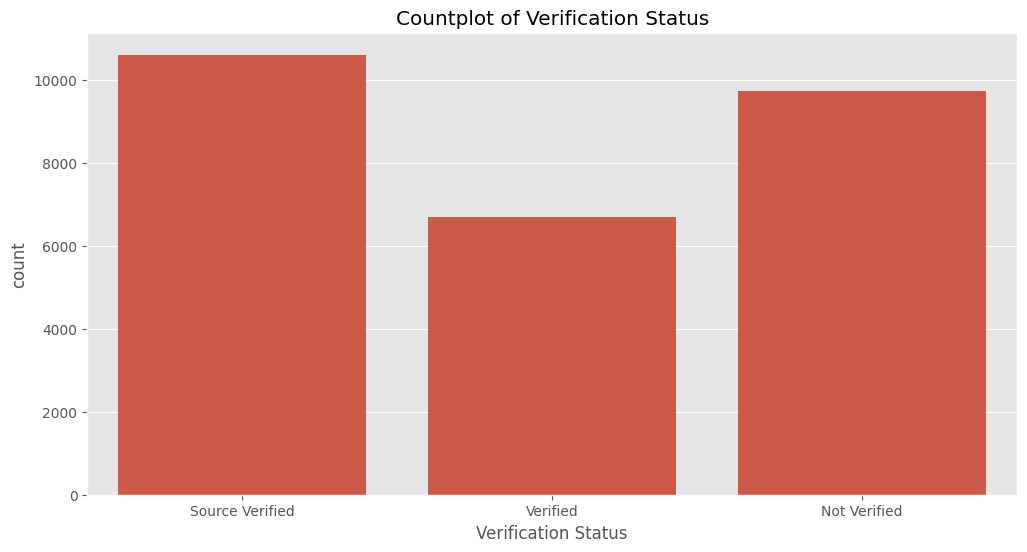

In [21]:
plot_vertical_countplot(df, 'Verification Status', figsize=(12, 6))

- Q7: What is the geographical distribution of customers based on state?

Answer: We can observe that the top 5 states with the highest number of borrowers are California, Texas, New York, Florida, and Illinois.


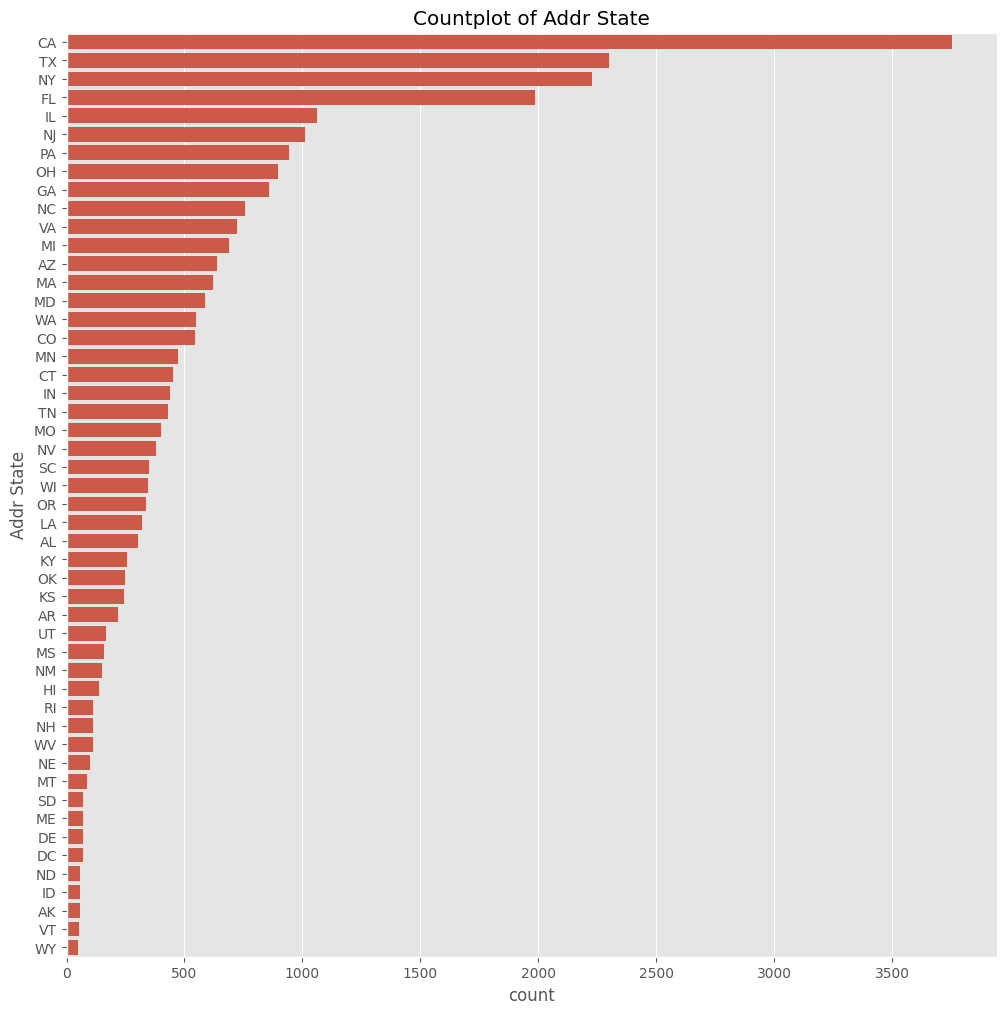

In [22]:
plot_horizontal_countplot(df, 'Addr State', figsize=(12, 12))


- Q8: What is the distribution of the loan status

Answer: We can observe that most loans are current, followed by fully paid. This indicates that most customers are able to repay their loans(i.e most of the loans are either actively being repaid or have been fully repaid)


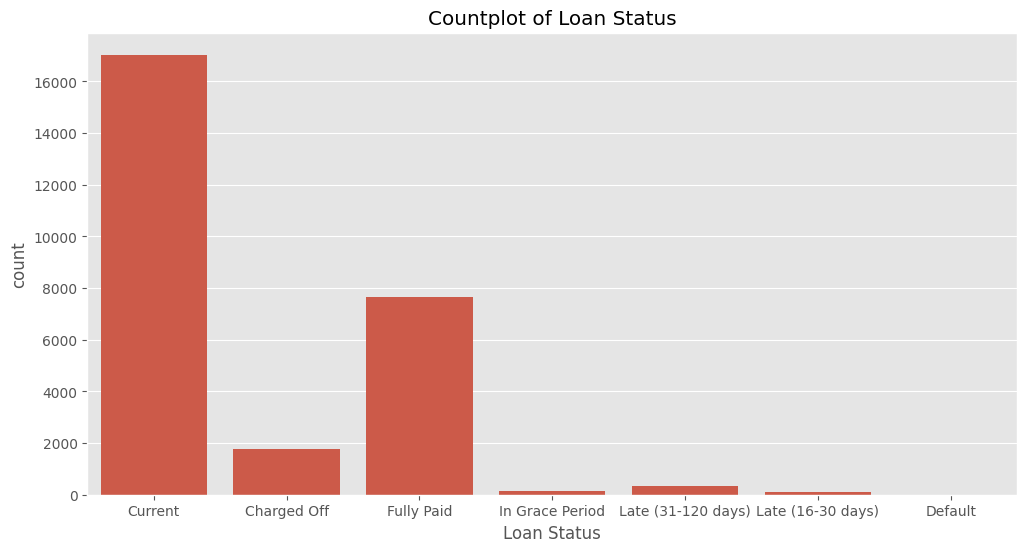

In [23]:
plot_vertical_countplot(df, 'Loan Status', figsize=(12, 6))

- Q9: What is the distribution of the loan status based on the loan grade?

Answer: We can observe that most loans are grade B, followed by grade C. Most of the loans are current, followed by fully paid. This indicates that most customers are able to repay their loans(i.e most of the loans are either actively being repaid or have been fully repaid)


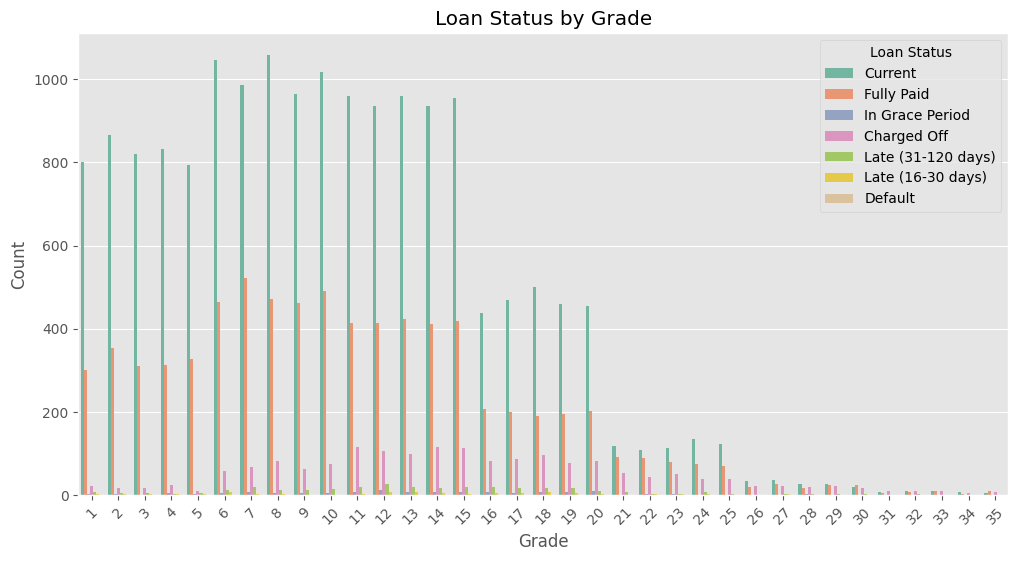

In [24]:
plot_countplot_multiple_columns(df, 'Grade', 'Loan Status', 'Loan Status by Grade', 'Grade', 'Count', (12, 6))


- Q10: Is the loan amount affected by the loan grade?

Answer: We can observe that classes E,F,G have higher loan amounts compared to other classes. This indicates that customers with lower loan grades tend to borrow more money.


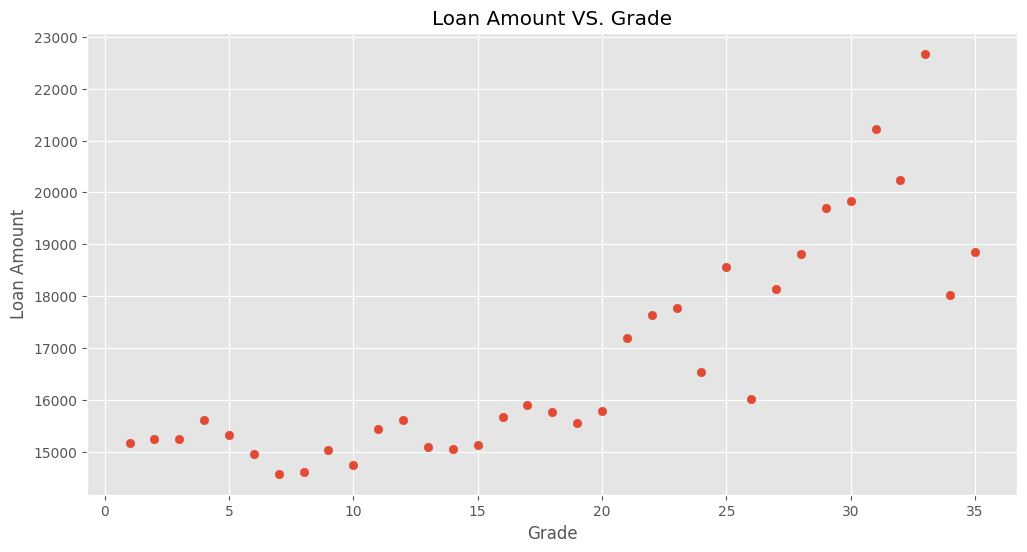

In [25]:
plot_scatter_average(df, 'Grade','Loan Amount', (12, 6))

- Q11: Is the loan amount the same as the funded amount?

Answer: We can observe that the loan amount is almost the same as the funded amount. We can infer that the funded amount is the amount that the customer actually receives.


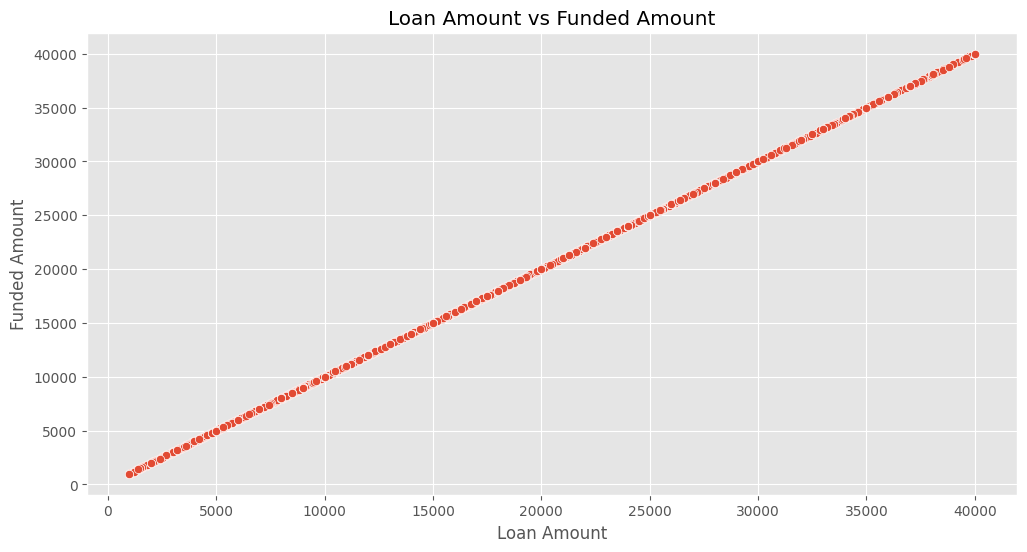

In [26]:
plot_scatterplot(df, 'Loan Amount', 'Funded Amount', figsize=(12, 6))

- Q12: Is there a relationship between the loan grade and the interest rate?

Answer: We can observe that higher grade such as (A, B, C) have lower interest rates compared to lower grades such as (D, E, F, G). This indicates that customers with higher grades are less risky and are charged lower interest rates.


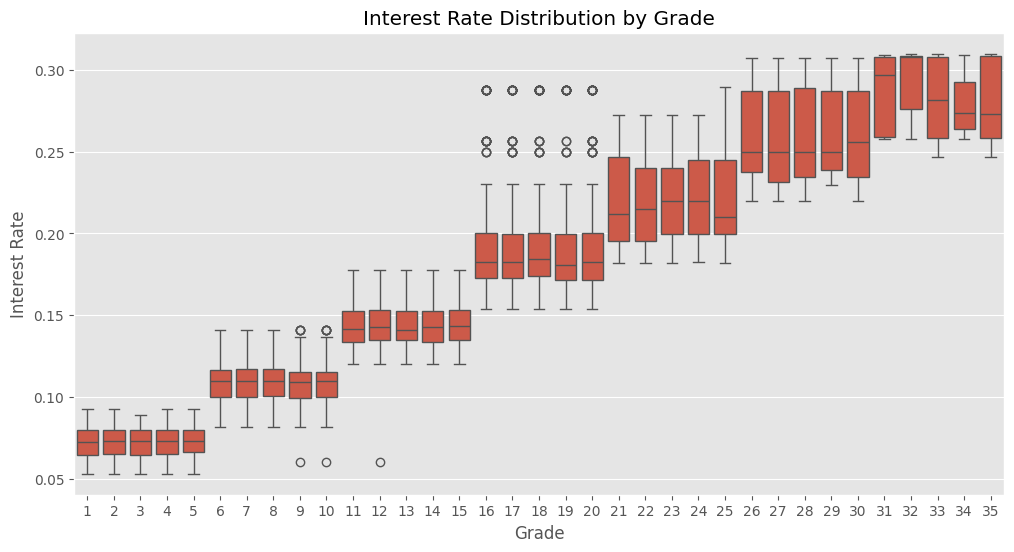

In [27]:
plot_boxplot_multiple_columns(df, 'Grade', 'Int Rate', 'Interest Rate Distribution by Grade', 'Grade', 'Interest Rate', (12, 6))

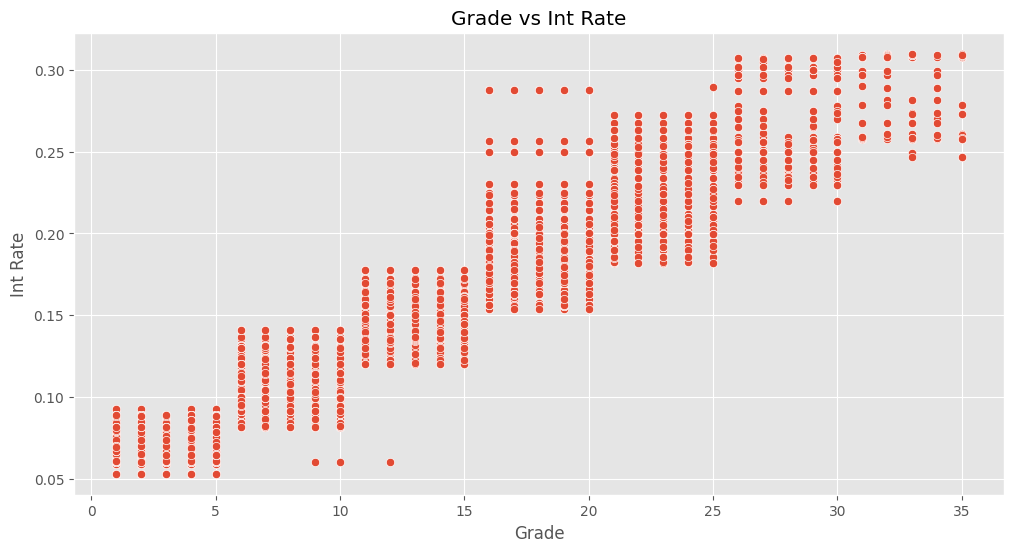

In [28]:
plot_scatterplot(df, 'Grade', 'Int Rate', (12, 6))

- Q13: What is the most common purpose for taking a loan?

Answer: We can observe that the most common purpose for taking a loan is debt consolidation, followed by credit card. This indicates that most customers take loans to consolidate their debts.


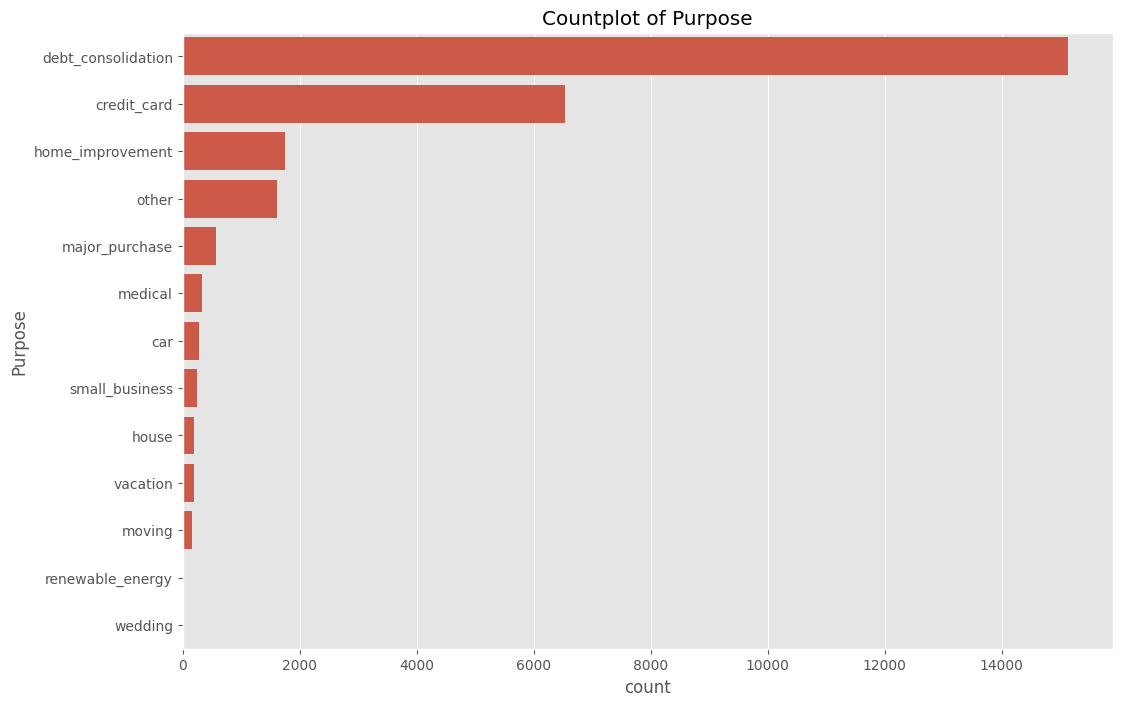

In [29]:
plot_horizontal_countplot(df, 'Purpose', (12, 8))

### Observations:

- The distribution of loan amount among customers is right-skewed, with most customers having a loan amount of around 10000. We can observe that most loans fall within a specific range indicating that customers tend to borrow moderate amounts.

- The top 10 employee titles that issue loans are Teacher, Manager, Owner, Registered Nurse, Driver, Supervisor, Sales, Project Manager, and Office Manager.

- Employees with 10 years of employment are the most common among customers.

- Loan amounts do not vary significantly by employment length, but there is a slight increase in loan amounts for customers with longer employment. Customers with very short employment lengths also have smaller loan amounts on average.

- There seems to be a positive trend between annual income and loan amount, higher-income individuals generally take larger loans, yet the correlation is not strictly linear, suggesting that other factors may also influence loan amount.

- There is a high percentage of customers whose income and employment are not verified. This could be a potential risk that these customers may not be able to repay the loan.

- The top 5 states with the highest number of borrowers are California, Texas, New York, Florida, and Illinois.

- Most loans are current, followed by fully paid. This indicates that most customers are able to repay their loans(i.e most of the loans are either actively being repaid or have been fully repaid)

- Most loans are grade B, followed by grade C. Most of the loans are current, followed by fully paid.

- Classes E,F,G have higher loan amounts compared to other classes. This indicates that customers with lower loan grades tend to borrow more money.

- The loan amount is almost the same as the funded amount. We can infer that the funded amount is the amount that the customer actually receives.

- Higher grade such as (A, B, C) have lower interest rates compared to lower grades such as (D, E, F, G). This indicates that customers with higher grades are less risky and are charged lower interest rates.

- The most common purpose for taking a loan is debt consolidation, followed by credit card. This indicates that most customers take loans to consolidate their debts.


### Before Preprocessing the data, I wil create a lookup table that will contain info about the original values that have been imputed or encoded


In [30]:
lookup_table = pd.DataFrame(columns=['Column', 'Original', 'Imputed'])

# 3 - Cleaning Data


In [31]:
df.columns

Index(['Customer Id', 'Emp Title', 'Emp Length', 'Home Ownership',
       'Annual Inc', 'Annual Inc Joint', 'Verification Status', 'Zip Code',
       'Addr State', 'Avg Cur Bal', 'Tot Cur Bal', 'Loan Id', 'Loan Status',
       'Loan Amount', 'State', 'Funded Amount', 'Term', 'Int Rate', 'Grade',
       'Issue Date', 'Pymnt Plan', 'Type', 'Purpose', 'Description'],
      dtype='object')

## Tidying up column names


I have renamed the columns to make them more readable and consistent, by converting them to lowercase and replacing spaces with underscores and removing special characters.


In [32]:
def clean_column_name(column_name: str):
    formatted_name = column_name.lower()
    formatted_name = formatted_name.strip()
    formatted_name = formatted_name.replace(' ', '_')
    formatted_name = ''.join(e for e in formatted_name if e.isalnum() or e == '_')

    return formatted_name

def clean_column_names(df: pd.DataFrame):
    df.columns = [clean_column_name(column) for column in df.columns]
    return df

df = clean_column_names(df)

In [33]:
df.columns

Index(['customer_id', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'annual_inc_joint', 'verification_status', 'zip_code',
       'addr_state', 'avg_cur_bal', 'tot_cur_bal', 'loan_id', 'loan_status',
       'loan_amount', 'state', 'funded_amount', 'term', 'int_rate', 'grade',
       'issue_date', 'pymnt_plan', 'type', 'purpose', 'description'],
      dtype='object')

## Choose a suitable column index


I have created a function that returns the candidate columns for the index based on the uniqueness of the values of the columns. I have selected the column 'loan_id' as the index since it is unique and can be used to identify each row.


In [34]:
def index_feature_candidates(df: pd.DataFrame):
    return df.shape[0] - df.nunique()

index_feature_candidates(df)

customer_id                0
emp_title              13898
emp_length             27019
home_ownership         27026
annual_inc             23942
annual_inc_joint       26372
verification_status    27027
zip_code               26177
addr_state             26980
avg_cur_bal            10032
tot_cur_bal             1527
loan_id                    0
loan_status            27023
loan_amount            25842
state                  26980
funded_amount          25842
term                   27028
int_rate               26665
grade                  26995
issue_date             26941
pymnt_plan             27028
type                   27025
purpose                27017
description            26228
dtype: int64

We can see that we have two features that can be used as index so I will use the loan_id as it is more readable than customer id.
The data represents information about loans so it is more useful to use the loan id


In [35]:
df.set_index('loan_id')

customer_id  \
loan_id                                                      
197838   YidceGZkXHgxZmtceGY1XHhiOFx4MDN3XHg4MnxceGUxXH...   
124597   YidUXHhhZlx4YTVcdFx4ZmYhRWpbXHhmMDRceDE4WE03XH...   
107933   YidceGY5KUBceGVkXHhiOW9ceGI2ZVx4ZmVceGYze1x4YW...   
63136    Yid3XHgwMVxyQVx4MTQxXHg5OFx4YjVceGMxPVx4OGZceD...   
20511    YidceGFhXHgxMn5cblx4OGJceDkwXHhjN1x4YjRMR1x4Yz...   
...                                                    ...   
200561   YidceGYxXHhkMTAkXHhlNnNceDE0ZVx4ZTBceGI3XHJceG...   
13029    YidceDgwW1x4MDJceGM4TipceGRkXHgwZWBiNlx4OTZceD...   
147842   YidceGJlXHhmYlx4YTJccldceDAzSFx4OTJceGEwXHhmNF...   
84652    YiI/XHg5Nz5ceDk0MFx4ZWFqd1ZceGM4RlZceDgyXHg4Zm...   
63573    YiJceDliIEJHXHhhY1x4ZTFrXHhiOVx4MTRceDg0XHhkMG...   

                        emp_title emp_length home_ownership  annual_inc  \
loan_id                                                                   
197838                Lieutenant   10+ years       MORTGAGE    200000.0   
124597    Senior Film Management   10+ years       MORTGAGE     63000.0   
107933                Machinist 2     1 year            OWN     30000.0   
63136            customer service  10+ years           RENT     20000.0   
20511                      Drivet    2 years           RENT     48000.0   
...                           ...        ...            ...         ...   
200561                        HHA  10+ years           RENT     45000.0   
13029              Letter Carrier  10+ years       MORTGAGE     91500.0   
147842    Chief building engineer     1 year            OWN     95000.0   
84652             Field Inspector   < 1 year            OWN     27500.0   
63573    Senior Center Specialist    7 years       MORTGAGE     31000.0   

         annual_inc_joint verification_status zip_code addr_state  \
loan_id                                                             
197838                NaN     Source Verified    117xx         NY   
124597                NaN            Verified    441xx         OH   
107933                NaN            Verified    972xx         OR   
63136                 NaN            Verified    486xx         MI   
20511                 NaN     Source Verified    334xx         FL   
...                   ...                 ...      ...        ...   
200561           170000.0        Not Verified    100xx         NY   
13029                 NaN     Source Verified    331xx         FL   
147842                NaN     Source Verified    088xx         NJ   
84652                 NaN        Not Verified    201xx         VA   
63573            150000.0        Not Verified    300xx         GA   

         avg_cur_bal  tot_cur_bal  loan_status  loan_amount state  \
loan_id                                                             
197838       19404.0     329872.0      Current      20000.0    NY   
124597        1946.0      38927.0      Current      12000.0    OH   
107933       22762.0     136571.0  Charged Off      10750.0    OR   
63136         1610.0       9662.0  Charged Off       8000.0    MI   
20511         5341.0      48069.0      Current       4200.0    FL   
...              ...          ...          ...          ...   ...   
200561        3057.0      36682.0      Current      20000.0    NY   
13029        18327.0     256580.0      Current       3200.0    FL   
147842        3070.0      30702.0      Current      15000.0    NJ   
84652         2013.0      10064.0      Current      10000.0    VA   
63573        30713.0     245706.0      Current       8000.0    GA   

         funded_amount        term  int_rate  grade        issue_date  \
loan_id                                                                 
197838         20000.0   60 months    0.1240      6    19 August 2019   
124597         12000.0   60 months    0.0993      7  17 November 2017   
107933         10750.0   36 months    0.1952     23     15 March 2015   
63136           8000.0   36 months    0.0789      2     15 March 2015   
20511           4200.0   36 mo

## Observe inconsistent data


Check if there is any duplicates rows in the dataset


In [36]:
def summarize_column_values(df: pd.DataFrame, columns: list):
    """
    Summarizes the values of specified columns in a DataFrame.

    Args:
    df (pd.DataFrame): The DataFrame to summarize.
    columns (list): List of column names to summarize.

    Returns:
    pd.DataFrame: A summary DataFrame containing unique values and their counts for each specified column.
    """
    summary_list = []

    for column in columns:
        if column in df.columns:
            value_counts = df[column].value_counts(dropna=False)
            # Create a summary entry for this column
            summary_entry = {
                'Column': column,
                'Total Values': df[column].size,
                'Unique Values': value_counts.size,
                'Value Counts': value_counts.to_dict()
            }
            summary_list.append(summary_entry)

    return summary_list

In [37]:
def drop_duplicates(df: pd.DataFrame):
    df.drop_duplicates(inplace=True)
    return df

In [38]:
drop_duplicates(df)

customer_id  \
0      YidceGZkXHgxZmtceGY1XHhiOFx4MDN3XHg4MnxceGUxXH...   
1      YidUXHhhZlx4YTVcdFx4ZmYhRWpbXHhmMDRceDE4WE03XH...   
2      YidceGY5KUBceGVkXHhiOW9ceGI2ZVx4ZmVceGYze1x4YW...   
3      Yid3XHgwMVxyQVx4MTQxXHg5OFx4YjVceGMxPVx4OGZceD...   
4      YidceGFhXHgxMn5cblx4OGJceDkwXHhjN1x4YjRMR1x4Yz...   
...                                                  ...   
27025  YidceGYxXHhkMTAkXHhlNnNceDE0ZVx4ZTBceGI3XHJceG...   
27026  YidceDgwW1x4MDJceGM4TipceGRkXHgwZWBiNlx4OTZceD...   
27027  YidceGJlXHhmYlx4YTJccldceDAzSFx4OTJceGEwXHhmNF...   
27028  YiI/XHg5Nz5ceDk0MFx4ZWFqd1ZceGM4RlZceDgyXHg4Zm...   
27029  YiJceDliIEJHXHhhY1x4ZTFrXHhiOVx4MTRceDg0XHhkMG...   

                      emp_title emp_length home_ownership  annual_inc  \
0                   Lieutenant   10+ years       MORTGAGE    200000.0   
1       Senior Film Management   10+ years       MORTGAGE     63000.0   
2                   Machinist 2     1 year            OWN     30000.0   
3              customer service  10+ years           RENT     20000.0   
4                        Drivet    2 years           RENT     48000.0   
...                         ...        ...            ...         ...   
27025                       HHA  10+ years           RENT     45000.0   
27026            Letter Carrier  10+ years       MORTGAGE     91500.0   
27027   Chief building engineer     1 year            OWN     95000.0   
27028           Field Inspector   < 1 year            OWN     27500.0   
27029  Senior Center Specialist    7 years       MORTGAGE     31000.0   

       annual_inc_joint verification_status zip_code addr_state  avg_cur_bal  \
0                   NaN     Source Verified    117xx         NY      19404.0   
1                   NaN            Verified    441xx         OH       1946.0   
2                   NaN            Verified    972xx         OR      22762.0   
3                   NaN            Verified    486xx         MI       1610.0   
4                   NaN     Source Verified    334xx         FL       5341.0   
...                 ...                 ...      ...        ...          ...   
27025          170000.0        Not Verified    100xx         NY       3057.0   
27026               NaN     Source Verified    331xx         FL      18327.0   
27027               NaN     Source Verified    088xx         NJ       3070.0   
27028               NaN        Not Verified    201xx         VA       2013.0   
27029          150000.0        Not Verified    300xx         GA      30713.0   

       tot_cur_bal  loan_id  loan_status  loan_amount state  funded_amount  \
0         329872.0   197838      Current      20000.0    NY        20000.0   
1          38927.0   124597      Current      12000.0    OH        12000.0   
2         136571.0   107933  Charged Off      10750.0    OR        10750.0   
3           9662.0    63136  Charged Off       8000.0    MI         8000.0   
4          48069.0    20511      Current       4200.0    FL         4200.0   
...            ...      ...          ...          ...   ...            ...   
27025      36682.0   200561      Current      20000.0    NY        20000.0   
27026     256580.0    13029      Current       3200.0    FL         3200.0   
27027      30702.0   147842      Current      15000.0    NJ        15000.0   
27028      10064.0    84652      Current      10000.0    VA        10000.0   
27029     245706.0    63573      Current       8000.0    GA         8000.0   

             term  int_rate  grade        issue_date  pymnt_plan        type  \
0       60 months    0.1240      6    19 August 2019       False  Individual   
1       60 months    0.0993      7  17 November 2017       False  Individual   
2       36 months    0.1952     23     15 March 2015       False  Individual   
3       36 months    0.0789      2     15 March 2015       False  Individual   
4       36 months    0.0993      8  17 December 2017       False  Individual   
...           ...       ...    ...               ...         ...     

Check if there exists any duplicate rows without considering the loan_id and customer_id as both uniquely identify each row


In [39]:
def check_duplicate_rows_without_unique_columns(df: pd.DataFrame, columns: list):
    # Drop the specified columns temporarily for duplicate checking
    df_temp = df.drop(columns=columns)
    # Find the duplicate rows based on the remaining columns
    duplicates = df[df_temp.duplicated(keep=False)]
    return duplicates

check_duplicate_rows_without_unique_columns(df, ['loan_id', 'customer_id']).head()

Empty DataFrame
Columns: [customer_id, emp_title, emp_length, home_ownership, annual_inc, annual_inc_joint, verification_status, zip_code, addr_state, avg_cur_bal, tot_cur_bal, loan_id, loan_status, loan_amount, state, funded_amount, term, int_rate, grade, issue_date, pymnt_plan, type, purpose, description]
Index: []

There are no duplicate rows in the dataset


In [40]:
df.dtypes

customer_id             object
emp_title               object
emp_length              object
home_ownership          object
annual_inc             float64
annual_inc_joint       float64
verification_status     object
zip_code                object
addr_state              object
avg_cur_bal            float64
tot_cur_bal            float64
loan_id                  int64
loan_status             object
loan_amount            float64
state                   object
funded_amount          float64
term                    object
int_rate               float64
grade                    int64
issue_date              object
pymnt_plan                bool
type                    object
purpose                 object
description             object
dtype: object

In [41]:
ExpectedDataTypes = {
    "customer_id": "object",
    "emp_title": "object",
    "emp_length": "object",
    "home_ownership": "object",
    "annual_inc": "float64",
    "annual_inc_joint": "float64",
    "verification_status": "object",
    "zip_code": "object",
    "addr_state": "object",
    "avg_cur_bal": "float64",
    "tot_cur_bal": "float64",
    "loan_id": "int64",
    "loan_status": "object",
    "loan_amount": "float64",
    "state": "object",
    "funded_amount": "float64",
    "term": "object", 
    "int_rate": "float64",
    "grade": "int64",
    "issue_date": "object",
    "pymnt_plan": "bool",
    "type": "object",
    "purpose": "object",
    "description": "object"
}

def check_column_data_types(df: pd.DataFrame, expected_data_types=ExpectedDataTypes):
    for column in df.columns:
        actual_type = df[column].dtype
        expected_type = expected_data_types.get(column)
        if expected_type is None:
            print(f'Failure: No expected data type for column {column}')
        elif actual_type != expected_type:
            print(f'Failure :Column {column} has data type {actual_type} but expected {expected_type}')
        else:
            print(f'Column {column} has expected data type {expected_type}')


check_column_data_types(df)

Column customer_id has expected data type object
Column emp_title has expected data type object
Column emp_length has expected data type object
Column home_ownership has expected data type object
Column annual_inc has expected data type float64
Column annual_inc_joint has expected data type float64
Column verification_status has expected data type object
Column zip_code has expected data type object
Column addr_state has expected data type object
Column avg_cur_bal has expected data type float64
Column tot_cur_bal has expected data type float64
Column loan_id has expected data type int64
Column loan_status has expected data type object
Column loan_amount has expected data type float64
Column state has expected data type object
Column funded_amount has expected data type float64
Column term has expected data type object
Column int_rate has expected data type float64
Column grade has expected data type int64
Column issue_date has expected data type object
Column pymnt_plan has expected d

Check for negative values in the dataset as columns that are numeric such as annual_inc, annual_inc_joint, avg_cur_bal, tot_cur_bal, loan_id, loan_amount, funded_amount, int_rate, and grade should not have negative values.


In [42]:
def check_negative_numbers_in_numeric_columns(df: pd.DataFrame):
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            if df[column].lt(0).sum() > 0:
                print(f'Column {column} has {df[column].lt(0).sum()} negative values.')

check_negative_numbers_in_numeric_columns(df)

There are no negative values in the dataset


Check if the columns of type object hold any numeric values


In [43]:
def check_numeric_in_object_columns(df: pd.DataFrame):
    res = []
    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].str.isnumeric().sum() > 0:
                print(f'Column {column} has {df[column].str.isnumeric().sum()} numeric values.')
                print(column)
                res += [column]

    return res

check_numeric_in_object_columns(df)

Column emp_title has 1 numeric values.
emp_title


['emp_title']

#### There is one record in the column 'emp_length' that holds a numeric value where it should be a string and depicts a title


In [44]:
"As shown below, the emp_length column has numeric values"
test = df.dropna(subset=['emp_title'])
test[test['emp_title'].str.isnumeric()]

customer_id emp_title emp_length  \
25465  YidceGVlXHgwNVx4ZGNceGJiXHhhMENceDljXHgxOVx4YT...        10   < 1 year   

      home_ownership  annual_inc  annual_inc_joint verification_status  \
25465           RENT     65000.0               NaN     Source Verified   

      zip_code addr_state  avg_cur_bal  tot_cur_bal  loan_id loan_status  \
25465    752xx         TX       4732.0      37853.0    45046     Current   

       loan_amount state  funded_amount        term  int_rate  grade  \
25465       6000.0    TX         6000.0   36 months       NaN     11   

        issue_date  pymnt_plan        type           purpose       description  
25465  17 May 2017       False  Individual  home_improvement  Home improvement

Getting the value counts of the columns of type object to detect any irrelevant or incorrect data, different spelling with the same meaning


In [45]:
def get_categorical_columns(df: pd.DataFrame):
    categorical_value_counts = {}

    for column in df.columns:
        if column in ['loan_id', 'customer_id']:
            continue
        if df[column].dtype == 'object' or df[column].dtype == 'bool':
            categorical_value_counts[column] = df[column].value_counts()
    
    return categorical_value_counts

In [46]:
pd.set_option('display.max_rows', None)

In [47]:
columns_to_standardize = ['emp_title', 'home_ownership', 'verification_status','type']

summarize_column_values(df, columns_to_standardize)

[{'Column': 'emp_title',
  'Total Values': 27030,
  'Unique Values': 13133,
  'Value Counts': {nan: 2376,
   'Teacher': 446,
   'Manager': 410,
   'Owner': 249,
   'Registered Nurse': 208,
   'Driver': 192,
   'RN': 183,
   'Supervisor': 178,
   'Sales': 146,
   'Office Manager': 122,
   'Project Manager': 120,
   'General Manager': 118,
   'Director': 106,
   'President': 92,
   'owner': 86,
   'Operations Manager': 83,
   'Sales Manager': 78,
   'Nurse': 75,
   'Accountant': 73,
   'Engineer': 72,
   'manager': 72,
   'Attorney': 67,
   'Administrative Assistant': 66,
   'teacher': 63,
   'Truck Driver': 62,
   'Vice President': 62,
   'Executive Assistant': 60,
   'Technician': 60,
   'Account Manager': 59,
   'Store Manager': 53,
   'Police Officer': 52,
   'sales': 51,
   'Program Manager': 51,
   'Server': 47,
   'driver': 47,
   'Mechanic': 47,
   'supervisor': 46,
   'Software Engineer': 45,
   'Controller': 44,
   'Paralegal': 43,
   'Supervisor ': 42,
   'Analyst': 42,
   'Tr

function to make the values of each column consistent by converting them to lowercase and capitalizing the first letter of each word


In [48]:
def standardize_values_proper_case(df: pd.DataFrame, columns: list):
    for column in columns:
        # if value is null or nan skip
        df[column] = df[column].apply(lambda x: ' '.join([word.capitalize() for word in str(x).split()]) if pd.notnull(x) else x)
    
    return df

columns_to_standardize = ['emp_title', 'home_ownership', 'verification_status', 'type', 'description']

df = standardize_values_proper_case(df, columns_to_standardize)

In [49]:
summarize_column_values(df, columns_to_standardize)

[{'Column': 'emp_title',
  'Total Values': 27030,
  'Unique Values': 10869,
  'Value Counts': {nan: 2376,
   'Teacher': 552,
   'Manager': 541,
   'Owner': 373,
   'Registered Nurse': 300,
   'Supervisor': 282,
   'Driver': 263,
   'Sales': 221,
   'Rn': 215,
   'Office Manager': 196,
   'Truck Driver': 177,
   'General Manager': 175,
   'Project Manager': 158,
   'Director': 130,
   'Sales Manager': 129,
   'President': 122,
   'Operations Manager': 103,
   'Mechanic': 97,
   'Technician': 93,
   'Engineer': 92,
   'Police Officer': 92,
   'Nurse': 92,
   'Administrative Assistant': 90,
   'Accountant': 86,
   'Store Manager': 81,
   'Customer Service': 80,
   'Attorney': 79,
   'Vice President': 75,
   'Assistant Manager': 75,
   'Account Manager': 73,
   'Executive Assistant': 72,
   'Electrician': 67,
   'Server': 64,
   'Machine Operator': 62,
   'Program Manager': 60,
   'Software Engineer': 54,
   'Paralegal': 54,
   'Foreman': 50,
   'Operator': 50,
   'Controller': 49,
   'Bra

As we can all the columns have consistent values where each value is capitalized and the rest are lowercase


In [50]:
df.home_ownership.value_counts()

Mortgage    13349
Rent        10517
Own          3127
Any            37
Name: home_ownership, dtype: int64

In [51]:
summarize_column_values(df, ['type'])

[{'Column': 'type',
  'Total Values': 27030,
  'Unique Values': 4,
  'Value Counts': {'Individual': 25091,
   'Joint App': 1827,
   'Joint': 93,
   'Direct_pay': 19}}]

As we can see in the column 'type' Joint App and Joint are the same so I will replace Joint App with Joint and Direct_pay with Direct Pay


In [52]:
def change_column_values_to_mapped_values(df: pd.DataFrame, column: str, mapping_dict: dict):
    """
    This function replaces values in a specified column of a DataFrame according to a mapping dictionary.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column (str): The name of the column in the DataFrame whose values are to be replaced.
    mapping_dict (dict): A dictionary where keys are the original values in the specified column,
                         and values are the new values to replace the originals.

    Returns:
    pd.DataFrame: The modified DataFrame with the specified column's values changed according to the mapping dictionary.
    """
    df[column] = df[column].map(mapping_dict)
    return df

type_column_map = {
    "Individual": "Individual",
    "Joint": "Joint",
    "Joint App": "Joint",
    "Direct_pay": "Direct Pay"
}

df = change_column_values_to_mapped_values(df, 'type', type_column_map)

In [53]:
summarize_column_values(df, ['type'])

[{'Column': 'type',
  'Total Values': 27030,
  'Unique Values': 3,
  'Value Counts': {'Individual': 25091, 'Joint': 1920, 'Direct Pay': 19}}]

In [54]:
summarize_column_values(df, ['issue_date'])

[{'Column': 'issue_date',
  'Total Values': 27030,
  'Unique Values': 89,
  'Value Counts': {'16 March 2016': 644,
   '19 July 2019': 551,
   '19 October 2019': 477,
   '19 May 2019': 477,
   '15 October 2015': 476,
   '18 May 2018': 461,
   '18 April 2018': 460,
   '17 November 2017': 457,
   '19 September 2019': 457,
   '19 August 2019': 453,
   '19 April 2019': 453,
   '18 October 2018': 452,
   '18 August 2018': 441,
   '17 August 2017': 436,
   '15 December 2015': 434,
   '18 June 2018': 427,
   '18 July 2018': 425,
   '17 June 2017': 424,
   '18 December 2018': 421,
   '19 January 2019': 417,
   '16 February 2016': 416,
   '18 November 2018': 413,
   '15 July 2015': 412,
   '14 October 2014': 401,
   '19 December 2019': 399,
   '18 January 2018': 393,
   '17 May 2017': 391,
   '17 September 2017': 390,
   '18 March 2018': 386,
   '19 June 2019': 386,
   '19 November 2019': 384,
   '17 July 2017': 383,
   '18 September 2018': 381,
   '17 October 2017': 379,
   '17 December 2017': 

For the issue date, we need to check contain valid number of days in each month and year


In [55]:
def validate_date_values(df: pd.DataFrame, column: str):
    """
    Validates the values in a specified column of a DataFrame to ensure they are correctly formatted dates.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the column with date values.
    column (str): The name of the column in the DataFrame to check for valid dates.

    Returns:
    list: A list of tuples where each tuple contains the row index and the invalid date value found.
          If all date values are valid, the list will be empty.
    """
    invalid_dates = []
    for idx, date in enumerate(df[column]):
        try:
            pd.to_datetime(date)
        except:
            invalid_dates.append((idx, date))
        
    return invalid_dates

validate_date_values(df, 'issue_date')

[]

In [56]:
df.nunique()

customer_id            27030
emp_title              10868
emp_length                11
home_ownership             4
annual_inc              3088
annual_inc_joint         658
verification_status        3
zip_code                 853
addr_state                50
avg_cur_bal            16998
tot_cur_bal            25503
loan_id                27030
loan_status                7
loan_amount             1188
state                     50
funded_amount           1188
term                       2
int_rate                 365
grade                     35
issue_date                89
pymnt_plan                 2
type                       3
purpose                   13
description              663
dtype: int64

As we can see all values of the issue date are valid, what we did we looped over the values of the issue date and tried to cast to datetime if it fails we will append the location of the value to the invalid_dates list


## Findings and conclusions


- The column names have been tidied up by converting them to lowercase, replacing spaces with underscores, and removing special characters.
- The column 'loan_id' has been chosen as the index since it is unique and can be used to identify each row. The loan_id is more readable than the customer_id and is more suitable for the data that represents information about loans.
- Any duplicates rows in the dataset have been checked and there are no duplicate rows in the dataset. If exists it will be removed.
- There are no negative values in the dataset for columns that are numeric such as annual_inc, annual_inc_joint, avg_cur_bal, tot_cur_bal, loan_amount, funded_amount, int_rate, and grade. 
- The columns of type object have been checked for any numeric values and there is one record in the column 'emp_length' that holds a numeric value where it should be a string and depicts a title.
- The value counts of the columns of type object have been checked to detect any irrelevant or incorrect data, different spelling with the same meaning.
- The values of each column have been made consistent by converting them to lowercase and capitalizing the first letter of each word.
- The column 'type' has been cleaned by replacing 'Joint App' with 'Joint' and 'Direct_pay' with 'Direct Pay'.
- The issue date has been checked to contain a valid number of days in each month and year. All values of the issue date are valid.

## Observing Missing Data


In [57]:
def get_null_count_and_percentage(df: pd.DataFrame, percentage=False):
    """
    Returns the count or percentage of missing values for each column with null entries.

    Args:
    df (pd.DataFrame): The DataFrame to analyze.
    percentage (bool): If True, returns the percentage of null values per column. Defaults to False.

    Returns:
    pd.Series: A Series showing either the count or percentage of missing values for columns with null values.
    """
    null_cnt = df.isnull().sum()

    null_cnt = null_cnt[null_cnt > 0]
    if percentage:
        null_cnt = null_cnt / len(df) * 100
    return null_cnt

get_null_count_and_percentage(df), get_null_count_and_percentage(df, percentage=True)    

(emp_title            2376
 emp_length           1857
 annual_inc_joint    25110
 int_rate             1211
 description           218
 dtype: int64,
 emp_title            8.790233
 emp_length           6.870144
 annual_inc_joint    92.896781
 int_rate             4.480207
 description          0.806511
 dtype: float64)

In [58]:
def check_for_non_standard_missing_values(df: pd.DataFrame, columns: list):
    """
    Checks for non-standard missing values in the specified columns of a dataframe.

    Args:
    df (pd.DataFrame): The dataframe to check for non-standard missing values.
    columns (list): List of column names to check for non-standard missing values.

    Returns:
    dict: A dictionary where each key is a column name, and each value is a dictionary containing:
          - 'values': A list of unique non-standard missing values found.
          - 'count': The count of occurrences for non-standard missing values in that column.
    """

    non_standard_missing_values = ["na", "n/a", "missing", "none", "nan", "null", "nil"]
    missing_values_dict = {}
    
    for column in columns:

        found_values = set()
        count = 0
        
        for value in non_standard_missing_values:
            # Filter for exact matches using case-insensitive comparison
            matches = df[df[column].astype(str).str.lower() == value]
            
            # Add unique matches to found_values and update the count
            found_values.update(matches[column].unique())
            count += len(matches)
        
        # Store the unique values and their count for this column
        if found_values:
            missing_values_dict[column] = {'values': list(found_values), 'count': count}
    
    return missing_values_dict

check_for_non_standard_missing_values(df, df.columns)


{'emp_title': {'values': [nan], 'count': 2376},
 'emp_length': {'values': [nan], 'count': 1857},
 'annual_inc_joint': {'values': [nan], 'count': 25110},
 'int_rate': {'values': [nan], 'count': 1211},
 'description': {'values': [nan], 'count': 218}}

In [59]:
get_null_count_and_percentage(df).sort_values(ascending=False)

annual_inc_joint    25110
emp_title            2376
emp_length           1857
int_rate             1211
description           218
dtype: int64

We have 5 columns with missing data which are annual_inc_joint, emp_title, emp_length, int_rate, and description. We will handle the missing data in the next step.


In [60]:
# Function to plot missing data heatmap
def plot_missing_data_heatmap(df: pd.DataFrame):
    """
    Plots a heatmap of missing data in the dataframe.

    Parameters:
    df (pd.DataFrame): Dataframe to analyze.
    """
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
    plt.title('Missing Data Heatmap')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()

def draw_correlation_map(df: pd.DataFrame, values_interest: list):
    correlation_matrix = df[values_interest].corr()
    plt.figure(figsize=(8, 6))

    # Create the heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

    # Customize the plot
    plt.xlabel('Variables')
    plt.ylabel('')

    # Show the plot
    plt.show() 

# Function to analyze correlation of missing data with other attributes
def analyze_missing_correlation(df: pd.DataFrame, target_column: str):
    """
    Analyzes the correlation between the missing status of the target column and other columns in the dataframe.

    Parameters:
    df (pd.DataFrame): Dataframe to analyze.
    target_column (str): Column name to analyze the missing data correlation.

    Returns:
    pd.DataFrame: Correlation dataframe with missing indicator for the target column.
    """
    # Create a missing indicator for the target column
    df_missing_indicator = df.copy()
    df_missing_indicator[target_column + '_missing'] = df[target_column].isnull().astype(int)
    
    # Calculate correlations with the missing indicator
    missing_correlation = df_missing_indicator.corr()[target_column + '_missing'].sort_values(ascending=False)
    
    # Plot the correlation heatmap with missing indicator
    plt.figure(figsize=(10, 6))
    sns.heatmap(missing_correlation.to_frame(), annot=True, cmap='coolwarm', cbar=True)
    plt.title(f'Correlation of {target_column} Missing Indicator with Other Features')
    plt.show()

    return missing_correlation

def plot_missing_vs_categoricals(df: pd.DataFrame, target_column: str, cat_columns: list):
    """
    Plots the relationship between a missing attribute and multiple categorical attributes, each in its own row.

    Parameters:
    df (pd.DataFrame): DataFrame to analyze.
    target_column (str): Column with missing values to analyze.
    cat_columns (list): List of categorical columns to compare the missing values with.
    """
    # Create a missing indicator for the target column
    df_missing = df.copy()
    df_missing[target_column + '_missing'] = df[target_column].isnull().astype(int)
    
    # Set the number of plots
    num_cols = len(cat_columns)

    plt.figure(figsize=(10, 5 * num_cols))  # Adjust height based on the number of columns

    # Plot each categorical column in a separate row
    for i, cat_column in enumerate(cat_columns):
        plt.subplot(num_cols, 1, i + 1)  # Create a subplot for each categorical column in one column
        sns.barplot(x=cat_column, y=target_column + '_missing', data=df_missing, ci=None)
        plt.title(f'Relationship between {target_column} Missing Indicator and {cat_column}')
        plt.ylabel(f'Proportion of Missing in {target_column}')
        plt.xlabel(cat_column)
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

def plot_categorical_vs_categorical(df: pd.DataFrame, cat_column1: str, cat_column2: str):
    """
    Plots the relationship between two categorical attributes.

    Parameters:
    df (pd.DataFrame): DataFrame to analyze.
    cat_column1 (str): First categorical column to analyze.
    cat_column2 (str): Second categorical column to compare with.
    """
    plt.figure(figsize=(14, 6))

    # Count plot
    plt.subplot(1, 2, 1)
    sns.countplot(x=cat_column1, hue=cat_column2, data=df, palette="viridis")
    plt.title(f'Count of {cat_column1} by {cat_column2}')
    plt.ylabel('Count')
    plt.xlabel(cat_column1)
    plt.xticks(rotation=45)
    plt.legend(title=cat_column2)

    # Stacked Bar Plot
    counts = df.groupby([cat_column1, cat_column2]).size().unstack(fill_value=0)
    counts.plot(kind='bar', stacked=True, ax=plt.subplot(1, 2, 2), colormap='viridis')
    plt.title(f'Stacked Bar Plot of {cat_column1} by {cat_column2}')
    plt.ylabel('Count')
    plt.xlabel(cat_column1)
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

def plot_correlations(df, target_column, reference_columns):
    """
    Plots the correlation between a target column and multiple reference columns.
    
    Parameters:
        df (pd.DataFrame): The data frame to analyze.
        target_column (str): The column to plot correlations against.
        reference_columns (list): A list of columns to compare with the target column.
        
    Returns:
        None: Shows the plots.
    """
    # Set up the matplotlib figure
    plt.figure(figsize=(15, 5 * len(reference_columns)))
    
    # Iterate over each reference column to plot correlation
    for i, ref_col in enumerate(reference_columns, start=1):
        plt.subplot(len(reference_columns), 1, i)
        
        if pd.api.types.is_numeric_dtype(df[ref_col]):
            # Scatter plot for numeric reference columns
            sns.scatterplot(data=df, x=ref_col, y=target_column)
            plt.title(f'Scatter Plot: {target_column} vs {ref_col}')
            plt.xlabel(ref_col)
            plt.ylabel(target_column)
        
        elif pd.api.types.is_categorical_dtype(df[ref_col]) or df[ref_col].dtype == 'object':
            # Box plot for categorical reference columns
            sns.boxplot(data=df, x=ref_col, y=target_column)
            plt.title(f'Box Plot: {target_column} vs {ref_col}')
            plt.xlabel(ref_col)
            plt.ylabel(target_column)
            plt.xticks(rotation=45)
        
        else:
            print(f"Column {ref_col} has unsupported data type for plotting. Skipping...")
    
    plt.tight_layout()
    plt.show()

In [61]:
def visualize_cols_values_cnt(dataset, col_name, percentage=False, title=None):
    (dataset[col_name].value_counts(dropna=False) * ((100/len(dataset)) if percentage else 1) ).plot(kind='bar', xlabel=col_name, ylabel='count', title=title)

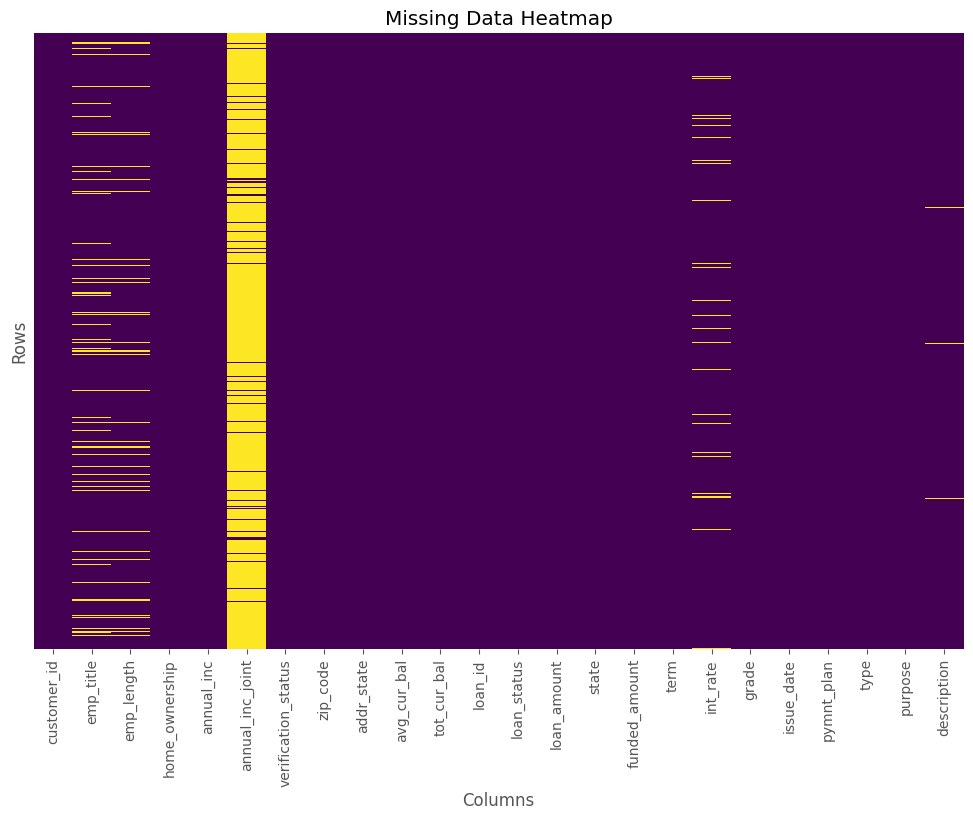

In [62]:
plot_missing_data_heatmap(df)


#### Let's start by investigating the missing data in the annual_inc_joint column


In [63]:
df['annual_inc_joint'].isna().sum(), df['annual_inc_joint'].isna().mean()*100

(25110, 92.89678135405104)

- The number of missing values in the emp_title column is 25110.
- The percentage of missing values in the emp_title column is 92.3%.


In [64]:
# calculate the count of null values of annual_inc_joint in each loan type
df.groupby('type')['annual_inc_joint'].apply(lambda x: x.isnull().sum()) 

type
Direct Pay       19
Individual    25091
Joint             0
Name: annual_inc_joint, dtype: int64

There are no missing values in the annual_inc_joint with the loan type being joint


In [65]:
individual_count = df[df['type'] == 'Individual']['type'].count()
direct_pay_count = df[df['type'] == 'Direct Pay']['type'].count()

individual_count+direct_pay_count == df[df['annual_inc_joint'].isnull()]['type'].count()


True

In [66]:
df['annual_inc_joint'].describe()

count    1.920000e+03
mean     1.306625e+05
std      8.254032e+04
min      2.300000e+04
25%      8.500000e+04
50%      1.150000e+05
75%      1.546250e+05
max      1.750000e+06
Name: annual_inc_joint, dtype: float64

Let's talk about the loan types in the dataset. We have 3 types of loans which are:

#### 1. Individual Loan

**Definition:**  
An individual loan is taken out by a single borrower, who is solely responsible for repaying the loan.

---

#### 2. Joint Loan

**Definition:**  
A joint loan is applied for and signed by two or more borrowers, such as spouses or business partners. All individuals on the loan are responsible for repaying it.

---

#### 3. Direct Pay Loan

**Definition:**  
In a direct pay loan, the lender pays the funds directly to the institution or organization on behalf of the borrower, rather than disbursing the funds to the borrower.

---

#### We have observed that the annual_inc_joint column is missing for all individual and direct_pay loans. This is because these types of loans do not have a joint applicant.


### **Annual Inc Joint Column**: This data is not missing, it does not exist for individual and direct_pay loans as they have no joint applicant.

- We can fill the missing values in the annual_inc_joint column with 0 for individual and direct_pay loans.
- As 0 will act as special character indicating the loan_type is individual or direct_pay loan which does not have a joint applicant.


#### Let's investigate the missing data in the empl_title column


In [67]:
df['emp_title'].isna().sum(), df['emp_title'].isna().mean()*100

(2376, 8.790233074361819)

- The number of missing values in the emp_title column is 2376.
- The percentage of missing values in the emp_title column is 8.8%.


In [68]:
df[df['emp_title'].isna()].head(10)

customer_id emp_title emp_length  \
7    YidceGU1bFxuXHgwMkZceGYwXHhlNlx4YTlceGYwXHhiZk...       NaN        NaN   
44   YiJceDE2XHhhNFx4YjJeXHgwMlx4ZDFVXHg5Nlx4MWNceD...       NaN        NaN   
52   YidceDE5XHhmNFx4MDFceGMxcFx4YWRJXHg4Zlx4MGNceG...       NaN        NaN   
59   YidceDFiUC9ceDg5UWVLXHhjMlx4MThceDkwXVx4ZjVMXH...       NaN        NaN   
89   YiJocVJLJ1FceDk2I1x4YzY0dVx4Y2NceGQ4XHhiMUdceG...       NaN        NaN   
109  YidCLj9ceGRlXHhjNFx4ZDZceDg2XHhhMVx4OTlceGRlXH...       NaN        NaN   
129  YidceGZiP0NceGIyXHhjN0BCXHhkNVx4YTNceGViXHgwNi...       NaN        NaN   
134  YidceDA4XHhlN1x4MDZccnBceDk2XHhlN1x4ODlceDFiXH...       NaN   < 1 year   
156  YidceDlhXHg5ZG1cclx4YWNceGY4XHhjNlx4MTBceGFmXH...       NaN   < 1 year   
174  YidoK1o0XHhkMFx4ZjRceDA1dGdceGVje1x4ODBceGI2XH...       NaN        NaN   

    home_ownership  annual_inc  annual_inc_joint verification_status zip_code  \
7         Mortgage    190000.0               NaN            Verified    857xx   
44        Mortgage     50000.0               NaN        Not Verified    219xx   
52             Own    110000.0               NaN     Source Verified    381xx   
59        Mortgage     90000.0               NaN     Source Verified    604xx   
89            Rent     80000.0               NaN        Not Verified    115xx   
109            Own     30000.0               NaN            Verified    140xx   
129       Mortgage     41000.0               NaN        Not Verified    713xx   
134       Mortgage     50000.0               NaN        Not Verified    309xx   
156       Mortgage      3600.0          151192.0        Not Verified    846xx   
174           Rent     32800.0               NaN     Source Verified    469xx   

    addr_state  avg_cur_bal  tot_cur_bal  loan_id      loan_status  \
7           AZ      69660.0     766256.0   238193       Fully Paid   
44          MD      11246.0     168697.0   113688  In Grace Period   
52          TN       4277.0      85537.0   242527          Current   
59          IL      17276.0     259140.0   185940          Current   
89          NY       1893.0      39757.0   268587          Current   
109         NY       4844.0      48442.0   137000          Current   
129         LA      16900.0     135202.0   128776          Current   
134         GA       1958.0      17626.0   144304          Current   
156         UT      13183.0     131828.0    10473          Current   
174         IN       2590.0      20719.0    54179          Current   

     loan_amount state  funded_amount        term  int_rate  grade  \
7        28675.0    AZ        28675.0   36 months    0.1049      8   
44       11500.0    MD        11500.0   36 months    0.0846      1   
52       30000.0    TN        30000.0   36 months    0.1557     12   
59       19500.0    IL        19500.0   60 months    0.1180      8   
89       40000.0    NY        40000.0   60 months    0.1171      7   
109      13800.0    NY        13800.0   36 months    0.1349     12   
129      12000.0    LA        12000.0   60 months    0.2872     27   
134      14875.0    GA        14875.0   36 months    0.2565     17   
156       3000.0    UT         3000.0   36 months    0.1180      8   
174       7000.0    IN         7000.0   36 months    0.1199     11   

            issue_date  pymnt_plan        type             purpose  \
7     16 November 2016       False  Individual  debt_consolidation   
44      18 August 2018       False  Individual  debt_consolidation   
52         19 May 2019       False  Individual         credit_card   
59    18 December 2018       False  Individual         credit_card   
89        19 July 2019       False  Individual  debt_consolidation   
109     16 August 2016       False  Individual  debt_consolidation   
129      18 March 2018       False  Individual  debt_consolidation   
134  19 September 2019       False  Individual  debt_consolidation   
156   18 December 2018       False       Joint  debt_consolidation   
174   16 February 2016       False  Ind

In [69]:
df[df['emp_title'].isna()].tail(10)

customer_id emp_title emp_length  \
26895  YidceGEzXHgxNVx4Y2VzXHhkNlx4YWRceGRidlx4ZWZceD...       NaN        NaN   
26914  YidFXHhkM3lceGI0XHhkYlx4OTdlMFx4MGZceGFlJlx4Zj...       NaN   < 1 year   
26924  YidceDBidFx4ODFceGQ3XHJceGY2MSFceDg2XHhjYy9ceG...       NaN        NaN   
26932  YidceGMwXHhmYlx4YTVMXHhhOH5ceDg5eEdceGEyaFx4ZG...       NaN        NaN   
26940  Yid0XHgxMHZQXHhjMVx4ZWRceGI5XHhhY1x4MThceGQyXH...       NaN        NaN   
26946  YidceGMyXHhjNSxceGZhKHAoXHhkY1x4OTE8Ylx4YzZceD...       NaN        NaN   
26973  YidceGMzd1x4OTZceDEwXHhlN1xuXHgxOFx4ZWZceGNmfC...       NaN        NaN   
26993  YidceDE5XHgxNVx4MTlcXFx4MGVceGQzek5ceGFmXHhlYV...       NaN   < 1 year   
27015  YidceGY3XHg5M1x4ODVGXHhiMTtceGU2XHg4Zlx4ZTVkXH...       NaN        NaN   
27017  YidvXHhiNVx4YTVceDgyXHhkYlx4ZjEwXHhmMFx4YzVceG...       NaN        NaN   

      home_ownership  annual_inc  annual_inc_joint verification_status  \
26895       Mortgage     63000.0               NaN        Not Verified   
26914           Rent     35000.0               NaN     Source Verified   
26924           Rent     35500.0               NaN        Not Verified   
26932       Mortgage     90000.0               NaN     Source Verified   
26940           Rent      9000.0               NaN            Verified   
26946            Own     21500.0           57500.0     Source Verified   
26973           Rent     54000.0               NaN     Source Verified   
26993       Mortgage     50000.0               NaN     Source Verified   
27015            Own     30000.0               NaN     Source Verified   
27017            Own     35000.0          175000.0            Verified   

      zip_code addr_state  avg_cur_bal  tot_cur_bal  loan_id loan_status  \
26895    430xx         OH      15341.0     168746.0    25138     Current   
26914    606xx         IL       5748.0      17245.0     3580     Current   
26924    392xx         MS       1672.0      16722.0   107738     Current   
26932    750xx         TX       7389.0      51723.0   196112     Current   
26940    701xx         TX       2053.0       6159.0     8244  Fully Paid   
26946    163xx         PA       3458.0      24204.0   163998     Current   
26973    109xx         NY       3800.0      26597.0   152322     Current   
26993    757xx         TX      15165.0     197141.0   182048     Current   
27015    954xx         CA        867.0       4336.0    42952     Current   
27017    980xx         WA      26806.0     107225.0   252674     Current   

       loan_amount state  funded_amount        term  int_rate  grade  \
26895       5000.0    OH         5000.0   36 months    0.0532      4   
26914       2000.0    IL         2000.0   36 months    0.1102      7   
26924      10625.0    MS        10625.0   60 months    0.2305     16   
26932      20000.0    TX        20000.0   60 months    0.0667      1   
26940       2700.0    TX         2700.0   36 months    0.1561     11   
26946      16000.0    PA        16000.0   36 months    0.1042      7   
26973      15000.0    NY        15000.0   36 months    0.1359     15   
26993      18250.0    TX        18250.0   36 months    0.0819      1   
27015       6000.0    CA         6000.0   36 months    0.1144      8   
27017      35000.0    WA        35000.0   36 months    0.0735      3   

              issue_date  pymnt_plan        type             purpose  \
26895      16 April 2016       False  Individual         credit_card   
26914        19 May 2019       False  Individual  debt_consolidation   
26924    19 October 2019       False  Individual  debt_consolidation   
26932    18 October 2018       False  Individual  debt_consolidation   
26940    13 October 2013       False  Individual  debt_consolidation   
26946  17 September 2017       False       Joint               other   
26973       17 July 2017       False  Individual  debt_consolidation   
26993   18 November 2018       False  Individual    home_improvement   
27015      17 April 2017       False  Individual         cre

In [70]:
df['emp_title'].isna().groupby(df['emp_length']).mean()*100

emp_length
1 year        0.563698
10+ years     0.437612
2 years       0.631313
3 years       0.847458
4 years       0.482509
5 years       0.413712
6 years       0.429185
7 years       0.664137
8 years       0.873786
9 years       0.000000
< 1 year     16.247505
Name: emp_title, dtype: float64

#### It seems that there are high percentage of missing values in the emp_title column with applicants that are < 1 year in employment. But let's investigate further

In [71]:
df[df['emp_title'].isna()].groupby('emp_length')['emp_length'].count()

emp_length
1 year        10
10+ years     39
2 years       15
3 years       18
4 years        8
5 years        7
6 years        5
7 years        7
8 years        9
< 1 year     407
Name: emp_length, dtype: int64

In [72]:
mode_emp_title_by_length = df.groupby('emp_length')['emp_title'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
mode_emp_title_by_length

emp_length
1 year       Registered Nurse
10+ years             Teacher
2 years               Teacher
3 years               Teacher
4 years               Teacher
5 years               Manager
6 years               Manager
7 years               Manager
8 years               Teacher
9 years               Teacher
< 1 year              Manager
Name: emp_title, dtype: object

In [73]:
df.emp_title.isna().groupby(df['home_ownership']).mean()*100

home_ownership
Any         21.621622
Mortgage     8.068020
Own         15.606012
Rent         7.635257
Name: emp_title, dtype: float64

In [74]:
test_copy = df.copy()
test_copy['emp_title'] = test_copy['emp_title'].fillna(test_copy['emp_length'].map(mode_emp_title_by_length))
test_copy['emp_title'].isna().sum()

1851

We need to observe the missing values in empl_length over other attributes to observe if there is probability of missingness


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23968\1548575724.py:78: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_column, y=target_column + '_missing', data=df_missing, ci=None)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23968\1548575724.py:78: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_column, y=target_column + '_missing', data=df_missing, ci=None)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23968\1548575724.py:78: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_column, y=target_column + '_missing', data=df_missing, ci=None)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23968\1548575724.py:78: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_column, y=target_column + '_missing', data=df_missing, ci=None)
C:\Users\LENOVO\

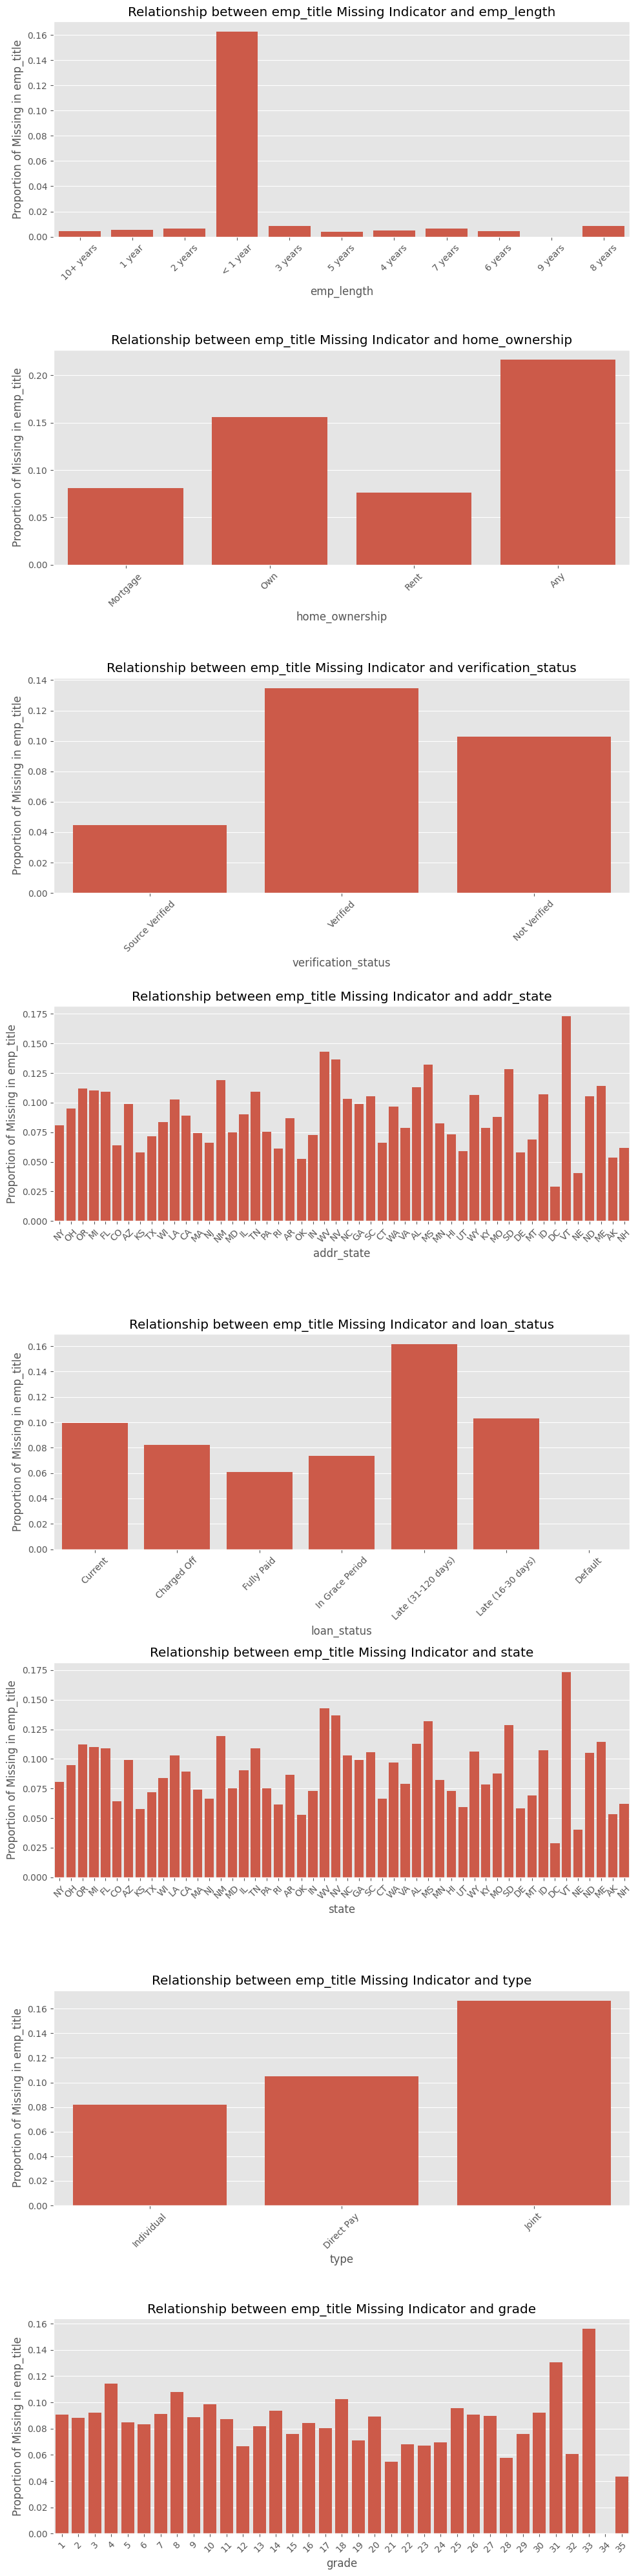

In [75]:
plot_missing_vs_categoricals(df, 'emp_title', ['emp_length', 'home_ownership', 'verification_status', 'addr_state', 'loan_status', 'state', 'type', 'grade'])

### **Emp Title Column**: the missing data in the emp_title column is missing at random because it appears to be associated with the emp_length column. These results indicate that applicants with shorter employment lengths, such as "< 1 year," are less likely to provide their job titles, suggesting that the missingness is related to the job title itself rather than external factors. This aligns with MAR (Missing not at random), as the probability of emp_title being missing is related to the emp_length column.

- We can fill the missing values in the emp_title by he data by emp_length and use the most common job title (i.e the mode) within each employment length category to fill in missing values. By leveraging this approach, we aim to reflect observed patterns while addressing missingness effectively.


#### Let's investigate the missing data in the emp_length column


In [76]:
df['emp_length'].isna().sum(), df['emp_length'].isna().mean()*100

(1857, 6.870144284128746)

- The number of missing values in the int_rate column is 1857.
- The percentage of missing values in the int_rate column is 6.87%.


In [77]:
df[df['emp_length'].isna()].head(10)

customer_id emp_title emp_length  \
7    YidceGU1bFxuXHgwMkZceGYwXHhlNlx4YTlceGYwXHhiZk...       NaN        NaN   
44   YiJceDE2XHhhNFx4YjJeXHgwMlx4ZDFVXHg5Nlx4MWNceD...       NaN        NaN   
52   YidceDE5XHhmNFx4MDFceGMxcFx4YWRJXHg4Zlx4MGNceG...       NaN        NaN   
59   YidceDFiUC9ceDg5UWVLXHhjMlx4MThceDkwXVx4ZjVMXH...       NaN        NaN   
89   YiJocVJLJ1FceDk2I1x4YzY0dVx4Y2NceGQ4XHhiMUdceG...       NaN        NaN   
109  YidCLj9ceGRlXHhjNFx4ZDZceDg2XHhhMVx4OTlceGRlXH...       NaN        NaN   
129  YidceGZiP0NceGIyXHhjN0BCXHhkNVx4YTNceGViXHgwNi...       NaN        NaN   
174  YidoK1o0XHhkMFx4ZjRceDA1dGdceGVje1x4ODBceGI2XH...       NaN        NaN   
179  Yid8Nlx4ZTZceGIzXHhiYlx4ZjFceGNhXHgwMGkjXHhkNl...       NaN        NaN   
181  Yid+XHhlMzBceGU5XHg4Zlx4ZGRceDk0XHhlYlx4YjlceG...       NaN        NaN   

    home_ownership  annual_inc  annual_inc_joint verification_status zip_code  \
7         Mortgage    190000.0               NaN            Verified    857xx   
44        Mortgage     50000.0               NaN        Not Verified    219xx   
52             Own    110000.0               NaN     Source Verified    381xx   
59        Mortgage     90000.0               NaN     Source Verified    604xx   
89            Rent     80000.0               NaN        Not Verified    115xx   
109            Own     30000.0               NaN            Verified    140xx   
129       Mortgage     41000.0               NaN        Not Verified    713xx   
174           Rent     32800.0               NaN     Source Verified    469xx   
179       Mortgage     93000.0               NaN        Not Verified    773xx   
181       Mortgage     25000.0           77000.0            Verified    469xx   

    addr_state  avg_cur_bal  tot_cur_bal  loan_id      loan_status  \
7           AZ      69660.0     766256.0   238193       Fully Paid   
44          MD      11246.0     168697.0   113688  In Grace Period   
52          TN       4277.0      85537.0   242527          Current   
59          IL      17276.0     259140.0   185940          Current   
89          NY       1893.0      39757.0   268587          Current   
109         NY       4844.0      48442.0   137000          Current   
129         LA      16900.0     135202.0   128776          Current   
174         IN       2590.0      20719.0    54179          Current   
179         TX      13921.0     250584.0    82235          Current   
181         IN      13291.0     119615.0   165313          Current   

     loan_amount state  funded_amount        term  int_rate  grade  \
7        28675.0    AZ        28675.0   36 months    0.1049      8   
44       11500.0    MD        11500.0   36 months    0.0846      1   
52       30000.0    TN        30000.0   36 months    0.1557     12   
59       19500.0    IL        19500.0   60 months    0.1180      8   
89       40000.0    NY        40000.0   60 months    0.1171      7   
109      13800.0    NY        13800.0   36 months    0.1349     12   
129      12000.0    LA        12000.0   60 months    0.2872     27   
174       7000.0    IN         7000.0   36 months    0.1199     11   
179      10000.0    TX        10000.0   36 months    0.1262     11   
181      16000.0    IN        16000.0   36 months    0.1447     13   

           issue_date  pymnt_plan        type             purpose  \
7    16 November 2016       False  Individual  debt_consolidation   
44     18 August 2018       False  Individual  debt_consolidation   
52        19 May 2019       False  Individual         credit_card   
59   18 December 2018       False  Individual         credit_card   
89       19 July 2019       False  Individual  debt_consolidation   
109    16 August 2016       False  Individual  debt_consolidation   
129     18 March 2018       False  Individual  debt_consolidation   
174  16 February 2016       False  Individual               other   
179  17 December 2017       False  Individual  debt_consolidation   
181  18 December 2018       False       Joint    

In [78]:
df[df['emp_length'].isna()].tail(10)

customer_id emp_title emp_length  \
26865  YidceDg2IXouVlx4OTkzXHhjN1x4ZGFAWFcgXHhkYTVIXH...       NaN        NaN   
26871  YidceGFhXHhmNUVceGZhRy1ceGE0XHg4ZEZceDgxXHhlZF...       NaN        NaN   
26895  YidceGEzXHgxNVx4Y2VzXHhkNlx4YWRceGRidlx4ZWZceD...       NaN        NaN   
26924  YidceDBidFx4ODFceGQ3XHJceGY2MSFceDg2XHhjYy9ceG...       NaN        NaN   
26932  YidceGMwXHhmYlx4YTVMXHhhOH5ceDg5eEdceGEyaFx4ZG...       NaN        NaN   
26940  Yid0XHgxMHZQXHhjMVx4ZWRceGI5XHhhY1x4MThceGQyXH...       NaN        NaN   
26946  YidceGMyXHhjNSxceGZhKHAoXHhkY1x4OTE8Ylx4YzZceD...       NaN        NaN   
26973  YidceGMzd1x4OTZceDEwXHhlN1xuXHgxOFx4ZWZceGNmfC...       NaN        NaN   
27015  YidceGY3XHg5M1x4ODVGXHhiMTtceGU2XHg4Zlx4ZTVkXH...       NaN        NaN   
27017  YidvXHhiNVx4YTVceDgyXHhkYlx4ZjEwXHhmMFx4YzVceG...       NaN        NaN   

      home_ownership  annual_inc  annual_inc_joint verification_status  \
26865           Rent     25000.0               NaN        Not Verified   
26871           Rent     30000.0           48000.0            Verified   
26895       Mortgage     63000.0               NaN        Not Verified   
26924           Rent     35500.0               NaN        Not Verified   
26932       Mortgage     90000.0               NaN     Source Verified   
26940           Rent      9000.0               NaN            Verified   
26946            Own     21500.0           57500.0     Source Verified   
26973           Rent     54000.0               NaN     Source Verified   
27015            Own     30000.0               NaN     Source Verified   
27017            Own     35000.0          175000.0            Verified   

      zip_code addr_state  avg_cur_bal  tot_cur_bal  loan_id loan_status  \
26865    993xx         WA        502.0       5520.0    17323     Current   
26871    658xx         MO       3150.0      44102.0   154369     Current   
26895    430xx         OH      15341.0     168746.0    25138     Current   
26924    392xx         MS       1672.0      16722.0   107738     Current   
26932    750xx         TX       7389.0      51723.0   196112     Current   
26940    701xx         TX       2053.0       6159.0     8244  Fully Paid   
26946    163xx         PA       3458.0      24204.0   163998     Current   
26973    109xx         NY       3800.0      26597.0   152322     Current   
27015    954xx         CA        867.0       4336.0    42952     Current   
27017    980xx         WA      26806.0     107225.0   252674     Current   

       loan_amount state  funded_amount        term  int_rate  grade  \
26865       4000.0    WA         4000.0   36 months    0.0797      2   
26871      15000.0    MO        15000.0   36 months    0.2437     22   
26895       5000.0    OH         5000.0   36 months    0.0532      4   
26924      10625.0    MS        10625.0   60 months    0.2305     16   
26932      20000.0    TX        20000.0   60 months    0.0667      1   
26940       2700.0    TX         2700.0   36 months    0.1561     11   
26946      16000.0    PA        16000.0   36 months    0.1042      7   
26973      15000.0    NY        15000.0   36 months    0.1359     15   
27015       6000.0    CA         6000.0   36 months    0.1144      8   
27017      35000.0    WA        35000.0   36 months    0.0735      3   

              issue_date  pymnt_plan        type             purpose  \
26865    18 January 2018       False  Individual             medical   
26871   18 November 2018       False       Joint  debt_consolidation   
26895      16 April 2016       False  Individual         credit_card   
26924    19 October 2019       False  Individual  debt_consolidation   
26932    18 October 2018       False  Individual  debt_consolidation   
26940    13 October 2013       False  Individual  debt_consolidation   
26946  17 September 2017       False       Joint               other   
26973       17 July 2017       False  Individual  debt_consolidation   
27015      17 April 2017       False  Individual         cre

In [79]:
df.emp_length.value_counts()

10+ years    8912
< 1 year     2505
2 years      2376
3 years      2124
1 year       1774
5 years      1692
4 years      1658
6 years      1165
7 years      1054
8 years      1030
9 years       883
Name: emp_length, dtype: int64

In [80]:
df['annual_inc'].groupby(df['emp_length']).mean()

emp_length
1 year       73694.994158
10+ years    89370.922653
2 years      80511.626426
3 years      74438.121841
4 years      80532.267753
5 years      82897.044519
6 years      79418.848053
7 years      78887.614207
8 years      81828.102200
9 years      79342.066665
< 1 year     77328.866553
Name: annual_inc, dtype: float64

In [81]:
df.emp_length.isna().groupby(df['zip_code']).mean().sort_values(ascending=False)*100

zip_code
059xx    100.000000
879xx    100.000000
246xx     50.000000
651xx     50.000000
157xx     50.000000
626xx     42.857143
864xx     41.666667
258xx     40.000000
355xx     37.500000
344xx     35.000000
469xx     33.333333
564xx     33.333333
574xx     33.333333
425xx     33.333333
877xx     33.333333
608xx     33.333333
397xx     33.333333
485xx     33.333333
991xx     33.333333
825xx     33.333333
318xx     33.333333
637xx     33.333333
122xx     33.333333
127xx     28.571429
776xx     28.571429
056xx     28.571429
582xx     28.571429
548xx     27.272727
617xx     27.272727
863xx     26.315789
237xx     25.000000
588xx     25.000000
162xx     25.000000
596xx     25.000000
616xx     25.000000
052xx     25.000000
051xx     25.000000
434xx     25.000000
263xx     25.000000
289xx     25.000000
406xx     25.000000
990xx     25.000000
248xx     25.000000
332xx     25.000000
287xx     23.529412
960xx     23.529412
766xx     23.076923
497xx     23.076923
243xx     23.076923
959xx     2

#### It seems that there is no pattern in the missing values of emp_length over the zip_code. Let's investigate further

In [82]:
# for all attributes except customer_id, loan_id, emp_title and description
# columns = df.columns[~df.columns.isin(['customer_id', 'loan_id', 'emp_title', 'description'])]
# plot_missing_vs_categoricals(df, 'emp_length', columns)

We need to observe the missing values in empl_length over other attributes to observe if there is probability of missingness


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23968\1548575724.py:78: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_column, y=target_column + '_missing', data=df_missing, ci=None)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23968\1548575724.py:78: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_column, y=target_column + '_missing', data=df_missing, ci=None)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23968\1548575724.py:78: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_column, y=target_column + '_missing', data=df_missing, ci=None)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23968\1548575724.py:78: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_column, y=target_column + '_missing', data=df_missing, ci=None)
C:\Users\LENOVO\

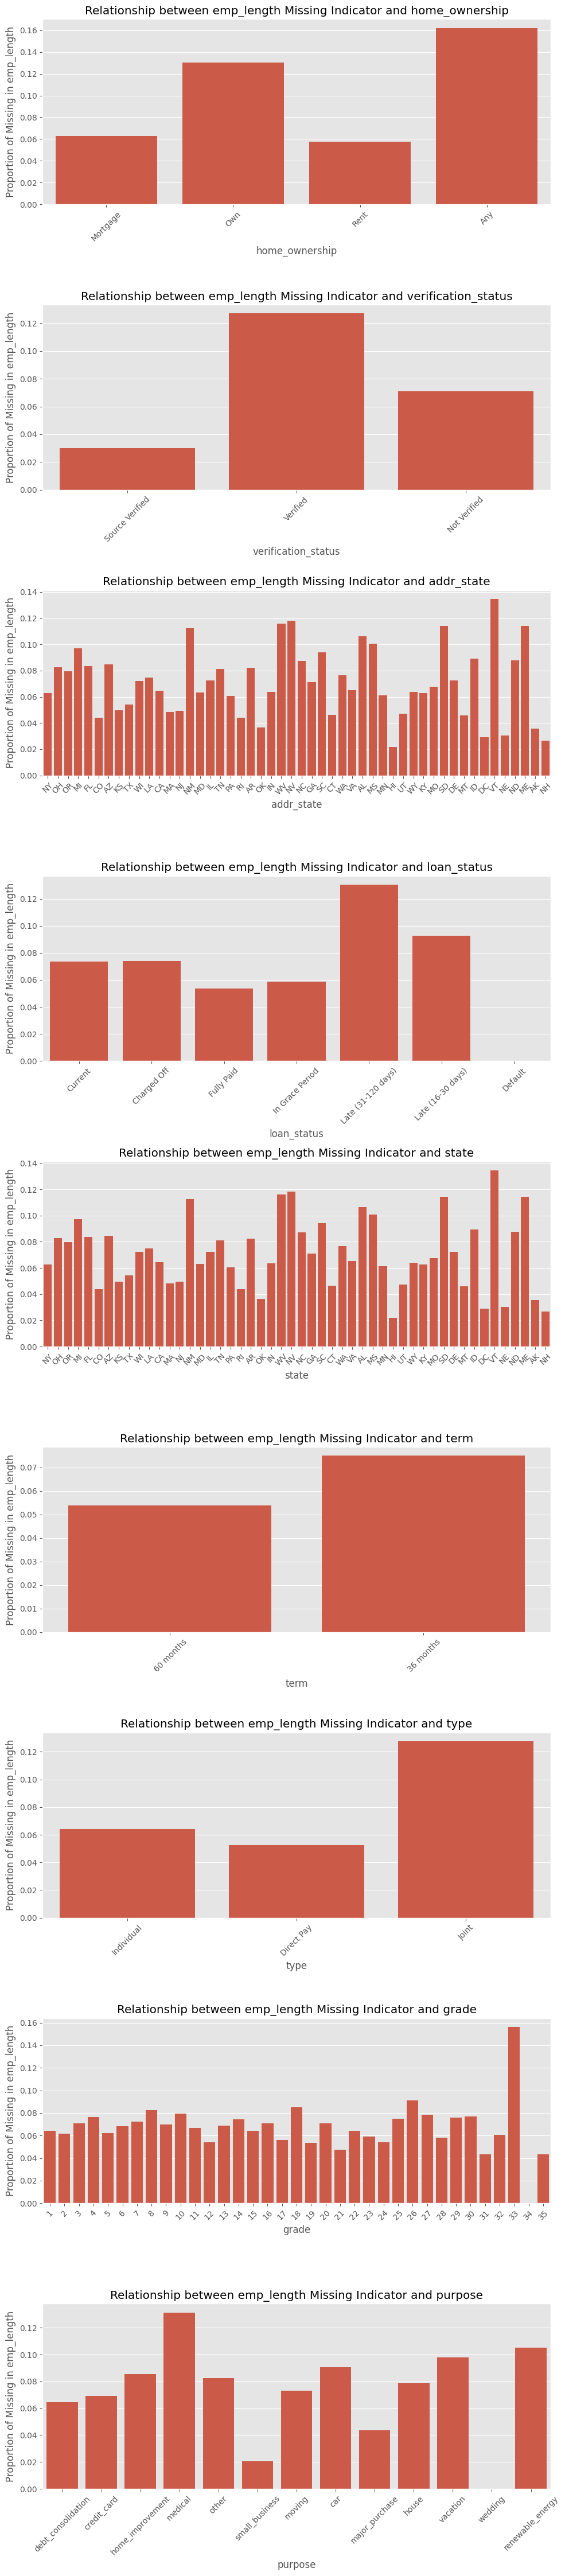

In [83]:
plot_missing_vs_categoricals(df, 'emp_length', ['home_ownership', 'verification_status', 'addr_state', 'loan_status', 'state', 'term', 'type', 'grade', 'purpose'])

### **Emp Length Column**: The data in the emp_length column appears to be missing completely at random (MCAR), as there is no clear relationship between the missing values in emp_length and other variables, observed or missing, in the dataset. The missingness may be due to some customers opting not to provide this optional information during their loan applications. Additionally, the percentage of missing values is relatively low 6.87%, indicating that this isn't a widespread issue in the data.

- We can fill the missing values in the emp_length by grouping the data by the annual_inc and fill the missing values with the most common emp_length value for each income level. As the annual income is a good indicator of the employment length.


#### Let's investigate the missing data in the int_rate column


In [84]:
df['int_rate'].isna().sum(), df['int_rate'].isna().mean()*100

(1211, 4.480207177210507)

- The number of missing values in the int_rate column is 1211.
- The percentage of missing values in the int_rate column is 4.48%.


In [85]:
df[df['int_rate'].isna()].head(10)

customer_id  \
13   YidceGUyXHhjOTtceDhlXHgxZTVceGE5XHhjNVx4ZTg2OF...   
49   YidceGJmcStVaFx4YjJeXHhmNVx4OThceGE5XHg5MVx4Yj...   
113  YidceGYxXHg5Nlx4MDVFKFhTXHhhOVx4MGM9eFpzJVx4MD...   
147  YidceGFjXHhkNlx4ZTlceDEwXHgwZlx4ZGFceGMxXHhjM1...   
191  YidceDg3PVx4MTFceGQwSFx4OWFceGZhXHhmMlx4OGVMXH...   
195  YichXHhhMVx4ZDcsXHhkYlx4MGZceGY3RVxcXHRceGU5ND...   
207  YidceGE1XHg5Mllcclx4YTlceDE0XHhlYVx4ZTVjXHhhZF...   
310  YidceGU5aVx4YTFceDgzXHg5OVx4ZGExUEx2XHhjNlx4Yj...   
348  YidceGYxXHJkZ1x4ZWNceDE5QzcrXHhhM1x4MTZceGI3XH...   
410  YiJceGZjJ3deXHhmNVx4YTI9XHhkN1x4YTVceGYzXHgxMj...   

                              emp_title emp_length home_ownership  annual_inc  \
13             Court Room Administrator  10+ years       Mortgage     65000.0   
49                            Counselor   < 1 year       Mortgage     82000.0   
113                   Director Of Sales     1 year           Rent    120000.0   
147                   Medical Assistant    4 years           Rent     42000.0   
191                                 NaN        NaN           Rent     36000.0   
195                    Practice Manager    3 years       Mortgage     83000.0   
207                 Pharmacy Technician  10+ years           Rent     63000.0   
310                                 NaN        NaN            Own     73596.0   
348  Aircraft Mechanical Parts Repairer    5 years       Mortgage     65000.0   
410                Deputy Town Engineer    6 years           Rent    160000.0   

     annual_inc_joint verification_status zip_code addr_state  avg_cur_bal  \
13                NaN        Not Verified    782xx         TX       4977.0   
49                NaN        Not Verified    785xx         TX      12076.0   
113               NaN     Source Verified    750xx         TX       2802.0   
147               NaN     Source Verified    104xx         NY       1759.0   
191               NaN        Not Verified    782xx         TX      12125.0   
195               NaN            Verified    115xx         NY      31368.0   
207               NaN     Source Verified    951xx         CA       3324.0   
310               NaN        Not Verified    917xx         CA       8838.0   
348               NaN     Source Verified    784xx         TX      12971.0   
410               NaN     Source Verified    941xx         CA      55938.0   

     tot_cur_bal  loan_id         loan_status  loan_amount state  \
13       49767.0    91408             Current      10000.0    TX   
49      241518.0   109793          Fully Paid      11000.0    TX   
113      56053.0   257498  Late (31-120 days)      35000.0    TX   
147       8797.0     1201          Fully Paid       1000.0    NY   
191     181881.0   153660             Current      15000.0    TX   
195     345045.0   221227          Fully Paid      24500.0    NY   
207       6647.0   130604          Fully Paid      12600.0    CA   
310      88381.0    96316             Current      10000.0    CA   
348     155647.0   173760         Charged Off      17000.0    TX   
410     615316.0   255642          Fully Paid      35000.0    CA   

     funded_amount        term  int_rate  grade        issue_date  pymnt_plan  \
13         10000.0   36 months       NaN      7     17 April 2017       False   
49         11000.0   36 months       NaN     10   15 January 2015       False   
113        35000.0   36 months       NaN     16  18 November 2018       False   
147         1000.0   36 months       NaN     22    18 August 2018       False   
191        15000.0   36 months       NaN     15     19 March 2019       False   
195        24500.0   60 months       NaN     25       18 May 2018       False   
207        12600.0   36 months       NaN     10     16 April 2016       False   
310        10000.0   36 months       NaN     15   18 October 2018       False   
348        17000.0   60 months       NaN     13  13 November 2013       False   
410        35000.0   36 months       NaN     13  15 November 2015       False   

           t

In [86]:
df[df['int_rate'].isna()].sample(10)

customer_id  \
8058   YidceGMxXHhlMDNOXHg5MVx4YWFceGI0XHgwNlx4OTBceG...   
10191  YidceGExZVx4ZTMzXHhkYV5ceGRiOVx4MWZceDA0XHg3Zn...   
15711  Yic+WVx4ZTlceDA2XHg4YVRVXHhmY1x4MTVceDE0XHgxN1...   
10806  YidceGVkTlx4Y2ZceGFkX1x4OWJceGZkXHhmZGJceDk0XH...   
15755  YidlXHhmYVx4YTZLXHgwNlx4MTFceGRlXHhlZlx4Y2EzUz...   
11243  YidceDA2XHg5Mlx4OTFceGNmXHhiZXp5XFxcXCNceDA3XH...   
10825  YidceDlkXHg4Nlx4YTRceDllLlx4MDNceGJlXHhiN2o+XH...   
6125   YidceDBmXHhlMlx4ZWNceGYxXHhmMn1pZ1x4MTdceDgzXH...   
3052   YidceDhhXHgxMlx4ZjRceDAxcFx4YTJhXHhiN1x4Y2ZceD...   
21693  YiJYXHg5ZFd1S0pceGM2XHg3Zlx4YzVceDFjXHg4OVx4Y2...   

                      emp_title emp_length home_ownership  annual_inc  \
8058   Sr. Communications Tech.  10+ years            Own     99388.0   
10191        Executive Producer    4 years           Rent    145000.0   
15711                       NaN        NaN            Own     26000.0   
10806                   Teacher  10+ years           Rent     65000.0   
15755               Rig Manager    5 years       Mortgage    150000.0   
11243                 President  10+ years       Mortgage    175000.0   
10825             Sales Manager  10+ years           Rent    170000.0   
6125                      Owner  10+ years            Own    125000.0   
3052           Business Analyst  10+ years           Rent     85000.0   
21693     Treatment Coordinator    3 years           Rent     34560.0   

       annual_inc_joint verification_status zip_code addr_state  avg_cur_bal  \
8058                NaN     Source Verified    940xx         CA       4236.0   
10191               NaN     Source Verified    911xx         CA       6354.0   
15711               NaN            Verified    906xx         CA       1657.0   
10806               NaN     Source Verified    770xx         TX       3975.0   
15755               NaN        Not Verified    933xx         CA      32388.0   
11243               NaN            Verified    781xx         TX      29953.0   
10825               NaN     Source Verified    914xx         CA       7991.0   
6125                NaN        Not Verified    770xx         TX       4478.0   
3052                NaN            Verified    112xx         NY       2701.0   
21693               NaN     Source Verified    932xx         CA       5116.0   

       tot_cur_bal  loan_id  loan_status  loan_amount state  funded_amount  \
8058       38124.0   149023   Fully Paid      15000.0    CA        15000.0   
10191      63540.0   191762      Current      20000.0    CA        20000.0   
15711      16571.0    77891  Charged Off       9350.0    CA         9350.0   
10806      71541.0    57086   Fully Paid       7200.0    TX         7200.0   
15755     323881.0   140541  Charged Off      14000.0    CA        14000.0   
11243     359431.0    97094      Current      10000.0    TX        10000.0   
10825      63931.0   217523   Fully Paid      24000.0    CA        24000.0   
6125       58218.0   224708      Current      25000.0    TX        25000.0   
3052       54013.0   192060   Fully Paid      20000.0    NY        20000.0   
21693      35813.0    88717      Current      10000.0    CA        10000.0   

             term  int_rate  grade        issue_date  pymnt_plan        type  \
8058    36 months       NaN      7      17 July 2017       False  Individual   
10191   36 months       NaN      7    16 August 2016       False  Individual   
15711   36 months       NaN     23     17 April 2017       False  Individual   
10806   36 months       NaN     14  15 November 2015       False  Individual   
15755   60 months       NaN     12      14 July 2014       False  Individual   
11243   36 months       NaN     13   18 January 2018       False  Individual   
10825   60 months       NaN      8     16 March 2016       False  Individual   
6125    36 months       NaN     12  16 November 2016       False  Individual   
3052    36 months       NaN     10     15 April 2015       False  Individual   
21693   36 months       NaN      6      

In [87]:
df.int_rate.isna().groupby(df['grade']).mean()*100

grade
1      3.524229
2      4.803843
3      3.886010
4      4.576271
5      3.152364
6      4.328733
7      4.672897
8      4.473039
9      5.106101
10     4.616344
11     4.136573
12     4.533333
13     4.482531
14     4.825737
15     4.947230
16     5.394737
17     5.484694
18     4.993910
19     3.669725
20     3.926702
21     4.379562
22     4.800000
23     5.511811
24     3.875969
25     5.416667
26     3.896104
27     3.370787
28     1.449275
29     1.265823
30     4.615385
31     8.695652
32     3.030303
33     0.000000
34    16.666667
35     4.347826
Name: int_rate, dtype: float64

In [88]:
df.int_rate.isna().groupby(df['loan_status']).mean()*100

loan_status
Charged Off           5.313199
Current               4.478751
Default               0.000000
Fully Paid            4.287582
In Grace Period       5.882353
Late (16-30 days)     4.123711
Late (31-120 days)    4.037267
Name: int_rate, dtype: float64

In [89]:
df.int_rate.isna().groupby(df['term']).mean()*100

term
 36 months    4.482452
 60 months    4.474782
Name: int_rate, dtype: float64

Analyzing the missing probability of the int_rate column over other attributes to observe if there is probability of missingness


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23968\1548575724.py:47: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  missing_correlation = df_missing_indicator.corr()[target_column + '_missing'].sort_values(ascending=False)


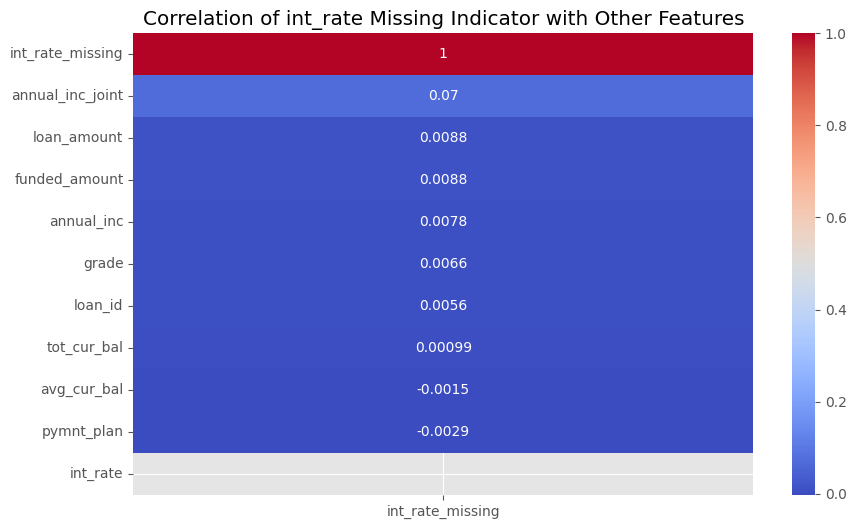

int_rate_missing    1.000000
annual_inc_joint    0.069783
loan_amount         0.008849
funded_amount       0.008849
annual_inc          0.007829
grade               0.006579
loan_id             0.005607
tot_cur_bal         0.000994
avg_cur_bal        -0.001485
pymnt_plan         -0.002946
int_rate                 NaN
Name: int_rate_missing, dtype: float64

In [90]:
analyze_missing_correlation(df, 'int_rate')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23968\1548575724.py:78: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_column, y=target_column + '_missing', data=df_missing, ci=None)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23968\1548575724.py:78: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_column, y=target_column + '_missing', data=df_missing, ci=None)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23968\1548575724.py:78: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_column, y=target_column + '_missing', data=df_missing, ci=None)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23968\1548575724.py:78: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_column, y=target_column + '_missing', data=df_missing, ci=None)
C:\Users\LENOVO\

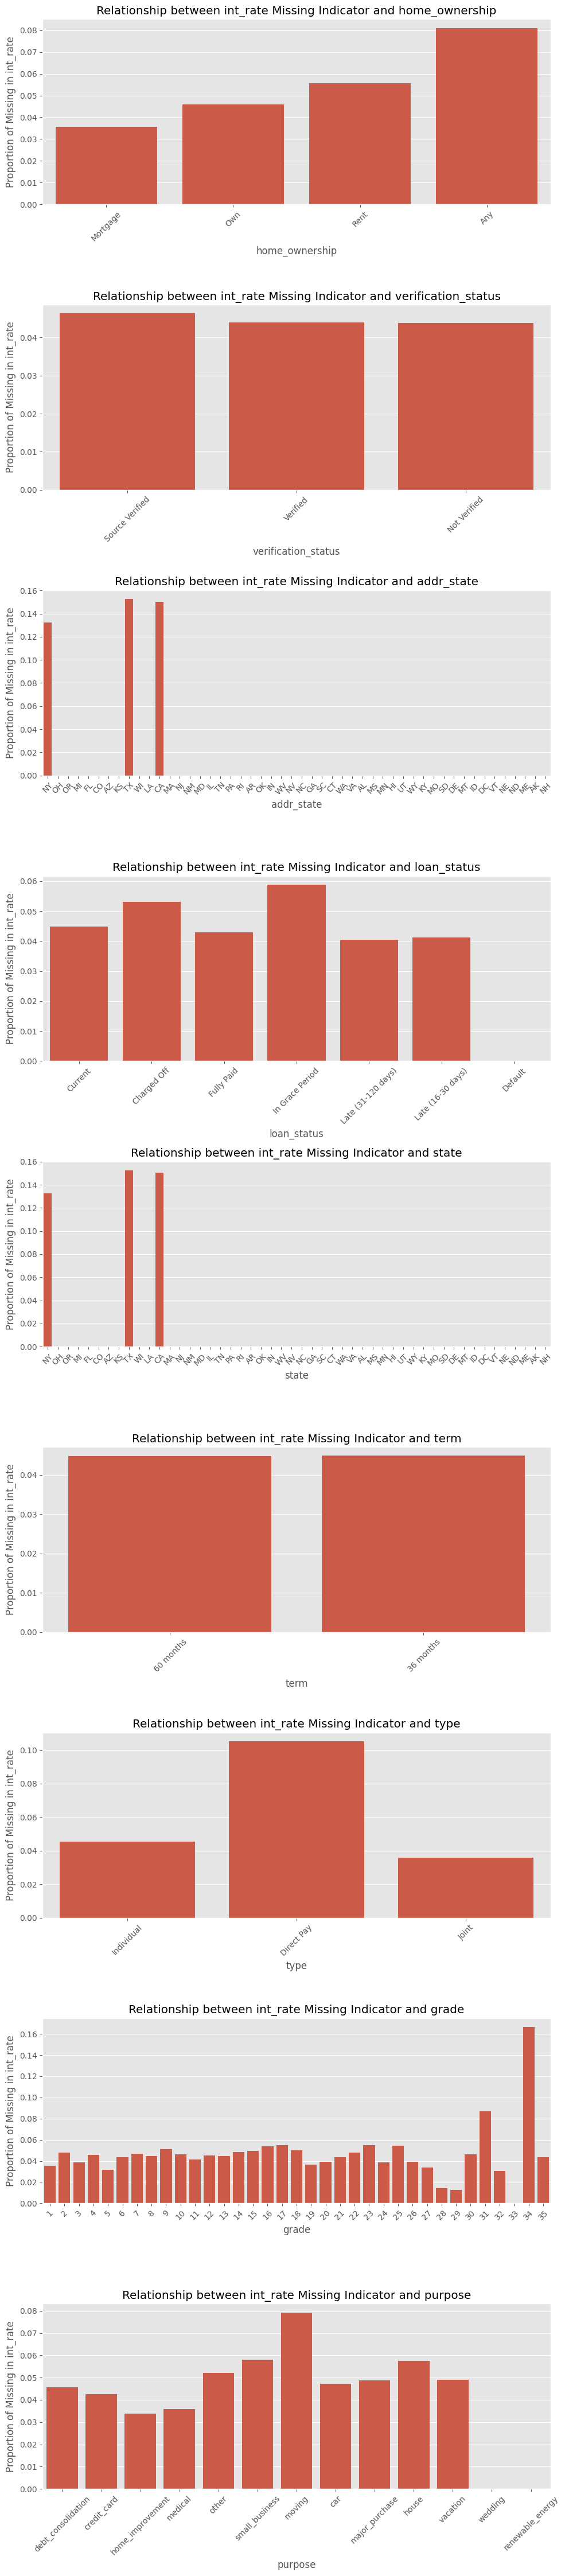

In [91]:
plot_missing_vs_categoricals(df, 'int_rate', ['home_ownership', 'verification_status', 'addr_state', 'loan_status', 'state', 'term', 'type', 'grade', 'purpose'])

#### It is observed that loans with missing interest rates are the loans where the borrower resides in CA (Canada), TX (Texas) and NY (New York). This indicates that the missingness in the int_rate column is not random and is related to the state of the borrower.

### **Int rate Column**: This data is missing at random (MAR), as the interest rate is missing for loans in specific states. The missingness is related to the state of the borrower, indicating that the probability of the interest rate being missing is related to the state column.

#### Let's investigate the missing data in the description column


In [92]:
df['description'].isna().sum(), df['description'].isna().mean()*100

(218, 0.8065112837587864)

- The number of missing values in the int_rate column is 218.
- The percentage of missing values in the int_rate column is 0.8%.


In [93]:
df[df['description'].isna()].head(10)

customer_id  \
39    YidceDE0RDZceDE4XHg5OVx4ODhceDlmXHhhZlx4MTlmZV...   
207   YidceGE1XHg5Mllcclx4YTlceDE0XHhlYVx4ZTVjXHhhZF...   
220   YidceGEwbDVceGQxXHhmMVx4YzdceDgzXHhlNlx4ZDNceG...   
270   YidVXHg4MFx4ZmFmP1x4MDRceGQzbj1AaVx4Y2ZceGVmXH...   
675   YiJKMlx4OTRceGI3W1x4YThceDg2bVx4MGUnOUVceGFiL1...   
733   YidSaVx4ZDlmeX1ceGZjXHhiYTNuXHg4YVx4OGZcbltceG...   
829   YidceGY0XHhmZlx4MTJceDAwRlx4YzlceDlkYiJceDA3XH...   
891   YidRXHhkYWFceDE3XHhlOVx4YTJRIXRceGQwXHhhNkRceG...   
964   YidceGE2XHhiNllrXHhlY1hceDljXHhlNlx4MGVceGIxXH...   
1212  YicwY1x4YzNceGJmXHhmNVx4ODNceDk2fFx4ZjVceDE1XH...   

                  emp_title emp_length home_ownership  annual_inc  \
39                Dispacher    6 years           Rent     38000.0   
207     Pharmacy Technician  10+ years           Rent     63000.0   
220           Staff Officer  10+ years       Mortgage     98289.0   
270         Hvac Instructor    5 years       Mortgage     50760.0   
675                   Nurse  10+ years           Rent     60000.0   
733                     NaN        NaN           Rent     51180.0   
829                Detailer    2 years           Rent     27000.0   
891              It Manager  10+ years           Rent     70000.0   
964   Automotive Technician    2 years       Mortgage     85000.0   
1212              Marketing    3 years           Rent     78000.0   

      annual_inc_joint verification_status zip_code addr_state  avg_cur_bal  \
39                 NaN     Source Verified    114xx         NY       2099.0   
207                NaN     Source Verified    951xx         CA       3324.0   
220                NaN        Not Verified    207xx         MD      34195.0   
270                NaN     Source Verified    281xx         NC      11524.0   
675                NaN            Verified    970xx         OR       6507.0   
733                NaN            Verified    532xx         WI       8096.0   
829                NaN        Not Verified    846xx         UT       1810.0   
891                NaN        Not Verified    902xx         CA        934.0   
964                NaN        Not Verified    480xx         MI       8129.0   
1212               NaN     Source Verified    211xx         MD       2333.0   

      tot_cur_bal  loan_id         loan_status  loan_amount state  \
39        12592.0    75887             Current       9000.0    NY   
207        6647.0   130604          Fully Paid      12600.0    CA   
220      444540.0   231695             Current      26000.0    MD   
270      126759.0   152129             Current      15000.0    NC   
675       39039.0   124056          Fully Paid      12000.0    OR   
733       64766.0   187523  Late (31-120 days)      20000.0    WI   
829       10860.0    14695          Fully Paid       3500.0    UT   
891       15878.0    88006             Current      10000.0    CA   
964      211366.0   196637             Current      20000.0    MI   
1212      32659.0   121283             Current      12000.0    MD   

      funded_amount        term  int_rate  grade        issue_date  \
39           9000.0   36 months    0.1149      8    16 August 2016   
207         12600.0   36 months       NaN     10     16 April 2016   
220         26000.0   60 months    0.1559     13    16 August 2016   
270         15000.0   36 months    0.1344     12   16 January 2016   
675         12000.0   36 months    0.2118     22     16 March 2016   
733         20000.0   36 months    0.1279     12    16 August 2016   
829          3500.0   36 months    0.1629     17     16 March 2016   
891         10000.0   36 months    0.0916      8  16 February 2016   
964         20000.0   60 months    0.0975      7     16 March 2016   
1212        12000.0   36 months    0.1199     15  16 February 2016   

      pymnt_plan        type             purpose description  
39         False  Individual  debt_consolidation         NaN  
207        False  Individual         credit_card         NaN  
220        False  Individual  debt_consolida

In [94]:
df[df['description'].isna()].tail(10)

customer_id  \
25626  YidceGU5XHhjMFx4ZjQ3STpdNFx4ZjVceDE5b1x4ZjM/e1...   
25846  YidceGY4XHgwMlx4YmJceDBjXHgxZEVceGY1XHgwNykwdV...   
25881  YiJuXHgwN1xuXHhlMSdceGEzXHg4NFx4ZjMuXHhkM1x4OT...   
26303  YidceDA2XHgwY2gzXHhjMVx4MDVzXHhkNSpIIFx4MDFceD...   
26399  YidceGY0XHhiM1x4MTVceDgyXHhhMVx4YjlceDg2XHhiNT...   
26424  YidlOmEqRWtXVFx4ZGRxXHgxN1x4YmZceGJkXHgxM1x4OD...   
26558  Yic6XHg5ZVx4MTVceDllXHgwNHZceDhmXHhkYVE+dVx4YW...   
26700  YiJceDAyXHhmYVx4ZGVceGRhXHIzXHhhNidceGNjXHhhNl...   
26883  YidceGQ1XHg5MiVceGQ4XHg4ZWVceGZiXHgxZlx4YjZ2XH...   
26974  YidceGIxXHg4ZC1ceDEzXHhkYlx4YjZceDlkUF9fXHhkMV...   

                   emp_title emp_length home_ownership  annual_inc  \
25626                    NaN        NaN           Rent     21000.0   
25846        Sales Associate  10+ years       Mortgage     60000.0   
25881         Shipping Clerk   < 1 year           Rent     50000.0   
26303                Foreman  10+ years       Mortgage    110000.0   
26399                  Owner  10+ years       Mortgage     64000.0   
26424  Charter Sales Manager    6 years            Own     82000.0   
26558   Systems Developer Ii     1 year           Rent     48000.0   
26700     Front Desk Manager    5 years            Own     41000.0   
26883        Counter Manager     1 year           Rent     35000.0   
26974   Executive Stewarding  10+ years           Rent     72000.0   

       annual_inc_joint verification_status zip_code addr_state  avg_cur_bal  \
25626               NaN            Verified    452xx         OH       2628.0   
25846               NaN        Not Verified    463xx         IN       7970.0   
25881               NaN        Not Verified    390xx         MS       4576.0   
26303          151000.0            Verified    015xx         MA      24528.0   
26399               NaN            Verified    028xx         RI      13871.0   
26424               NaN     Source Verified    333xx         FL       1326.0   
26558               NaN     Source Verified    056xx         VT       6103.0   
26700               NaN        Not Verified    212xx         MD       5150.0   
26883               NaN     Source Verified    430xx         OH       1381.0   
26974               NaN            Verified    922xx         CA       6558.0   

       tot_cur_bal  loan_id loan_status  loan_amount state  funded_amount  \
25626      13141.0    26628     Current       5000.0    OH         5000.0   
25846     151423.0   152707  Fully Paid      15000.0    IN        15000.0   
25881     105243.0    27988     Current       5000.0    MS         5000.0   
26303     318870.0   235886     Current      28000.0    MA        28000.0   
26399     138714.0   146553     Current      15000.0    RI        15000.0   
26424      41107.0   241241     Current      30000.0    FL        30000.0   
26558     103746.0   182692  Fully Paid      18500.0    VT        18500.0   
26700      97853.0   134918     Current      13025.0    MD        13025.0   
26883       6907.0     7500     Current       2500.0    OH         2500.0   
26974      52461.0   126180     Current      12000.0    CA        12000.0   

             term  int_rate  grade        issue_date  pymnt_plan        type  \
25626   36 months    0.0789      2      16 June 2016       False  Individual   
25846   36 months    0.1446     13     16 March 2016       False  Individual   
25881   36 months    0.0975      6  16 February 2016       False  Individual   
26303   36 months    0.1399     13    16 August 2016       False       Joint   
26399   36 months    0.0699      1      16 July 2016       False  Individual   
26424   36 months    0.0975      7       16 May 2016       False  Individual   
26558   60 months    0.2544     28       16 May 2016       False  Individual   
26700   36 months    0.2197     22  16 February 2016       False  Individual   
26883   36 months    0.1349     12      16 June 2016       False  Individual   
26974   60 months    0.1399     15   16 January 2016       False  Individual   

   

In [95]:
df.description.isna().groupby(df['purpose']).mean()*100

purpose
car                   0.724638
credit_card           0.902279
debt_consolidation    0.865143
home_improvement      0.574053
house                 0.523560
major_purchase        0.872600
medical               0.298507
moving                1.219512
other                 0.371287
renewable_energy      0.000000
small_business        0.000000
vacation              0.543478
wedding               0.000000
Name: description, dtype: float64

In [96]:
df.description.isna().groupby(df['home_ownership']).mean()*100

home_ownership
Any         0.000000
Mortgage    0.704173
Own         0.831468
Rent        0.931825
Name: description, dtype: float64

We need to observe the missing values in description over other attributes to observe if there is probability of missingness


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23968\1548575724.py:78: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_column, y=target_column + '_missing', data=df_missing, ci=None)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23968\1548575724.py:78: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_column, y=target_column + '_missing', data=df_missing, ci=None)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23968\1548575724.py:78: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_column, y=target_column + '_missing', data=df_missing, ci=None)


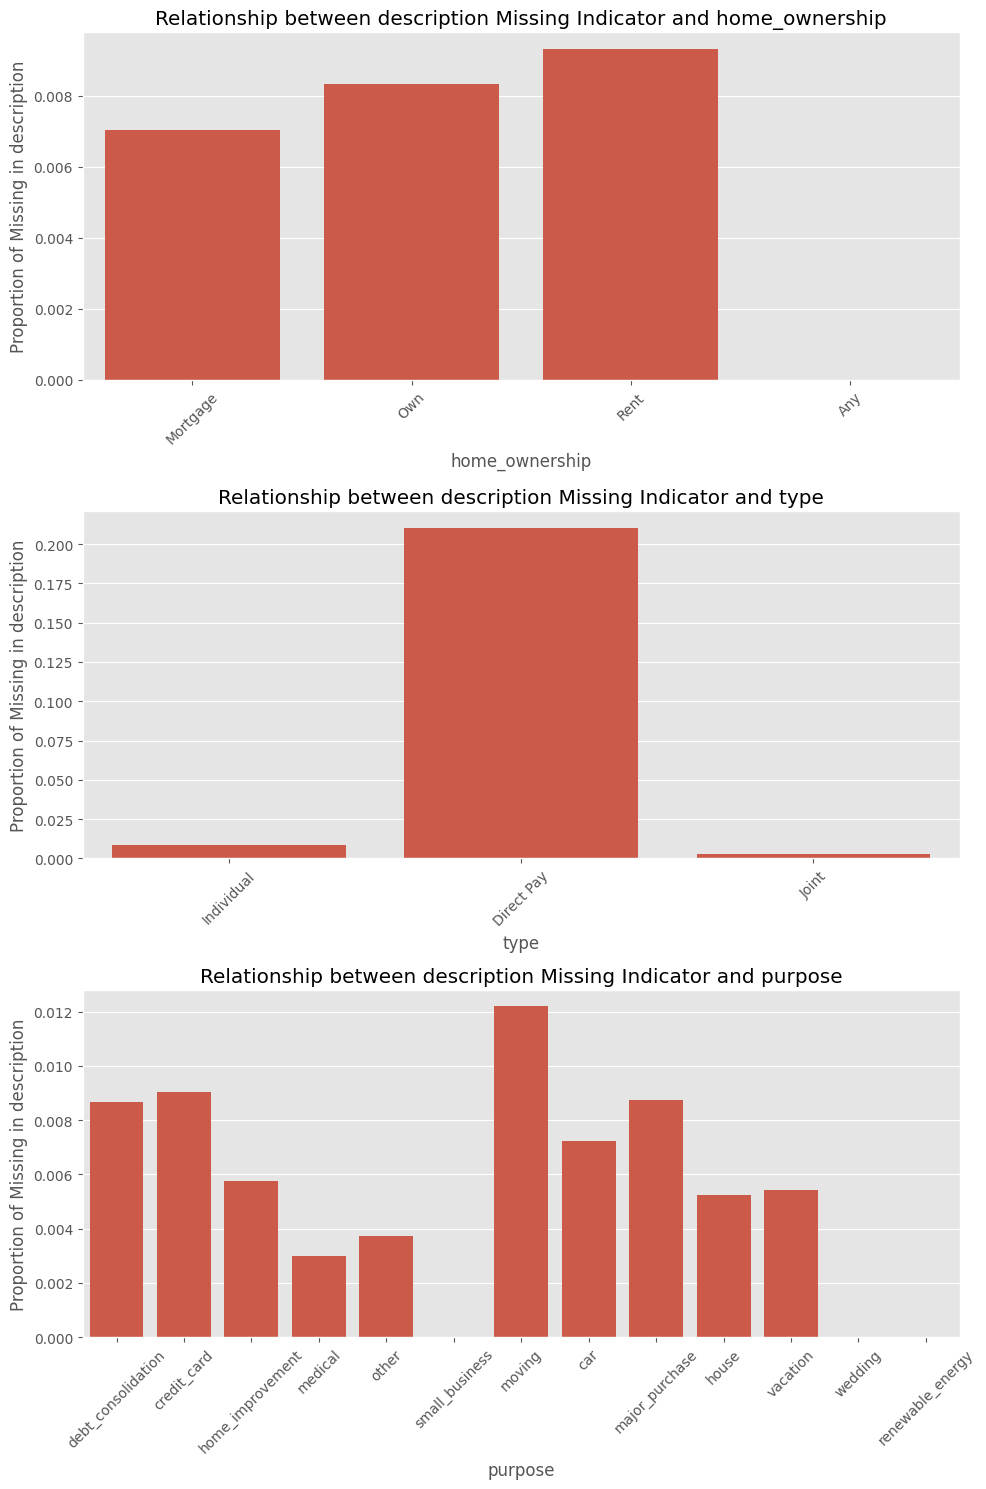

In [97]:
plot_missing_vs_categoricals(df, 'description', ['home_ownership','type', 'purpose'])

### **Description Column**: This data is missing completely at random as there are no relationship between the data missing and any other values, observed or missing, within the dataset. Also the description may was left as optional field so many customers may not have filled it. The percentage of the missed values are very low (0.8%)

- We can fill the missing values in the description by grouping the data by the purpose of the loan and filling the missing values with the most common description for that purpose.


## Handling Missing data


### Functions to impute the missing values


In [98]:
def impute_with_value(df: pd.DataFrame, column: str, value):
    """
    Impute missing values in a specified column with a given value.

    Parameters:
    df (pd.DataFrame): The dataframe containing the column to impute.
    column (str): The name of the column in which to impute missing values.
    value: The value to use for imputation.

    Returns:
    pd.DataFrame: The dataframe with missing values in the specified column imputed.
    """
    df[column].fillna(value, inplace=True)

    # update the lookup table
    lookup_table.loc[len(lookup_table)] = [column, 'Missing', value]
    
    return df

def impute_with_group_mode(df: pd.DataFrame, target_column: str, group_by_column: str):
    """
    Impute missing values in the target column based on the mode of the target column
    within groups defined by another column. If there are no modes found in the group,
    it will use the overall mode of the target column.

    Parameters:
    df (pd.DataFrame): The dataframe containing the columns to impute.
    target_column (str): The name of the column with missing values to impute.
    group_by_column (str): The column to group by and determine the mode for imputation.

    Returns:
    pd.DataFrame: The dataframe with missing values in the target column imputed.
    """

    mode_imputer = lambda x: x.mode()[0] if not x.mode().empty else None
    mode_map = df.groupby(group_by_column)[target_column].apply(mode_imputer).to_dict()

    df[target_column] = df.apply(
        lambda row: mode_map.get(row[group_by_column], None) if pd.isna(row[target_column]) else row[target_column],
        axis=1
    )
    overall_mode = df[target_column].mode()[0] if not df[target_column].mode().empty else None
    df[target_column].fillna(overall_mode, inplace=True)

    return df

def impute_with_group_mean(df: pd.DataFrame, target_column: str, group_by_column: str):
    """
    Impute missing values in the target column based on the mean of the target column
    within groups defined by another column.

    Parameters:
    df (pd.DataFrame): The dataframe containing the columns to impute.
    target_column (str): The name of the column with missing values to impute.
    group_by_column (str): The column to group by to calculate the mean for imputation.

    Returns:
    pd.DataFrame: The dataframe with missing values in the target column imputed.
    """
    # Calculate the mean for the target column grouped by the group_by_column
    mean_map = df.groupby(group_by_column)[target_column].mean().to_dict()

    # Fill missing values in the target column with the mean from the corresponding group
    df[target_column] = df.apply(
        lambda row: mean_map.get(row[group_by_column]) if pd.isna(row[target_column]) else row[target_column],
        axis=1
    )

    return df


### Making a copy of the old df and use it while imputing missing values


In [99]:
df_clean = df.copy()

- Impute the missing values of the annual inc joint by zeros


In [100]:
df_clean = impute_with_value(df_clean, 'annual_inc_joint', 0)

In [101]:
lookup_table

Column Original  Imputed
0  annual_inc_joint  Missing        0

In [102]:
df_clean.annual_inc_joint.isna().sum()

0

#### Plot the distribution of the annual_inc_joint column before and after imputing the missing values


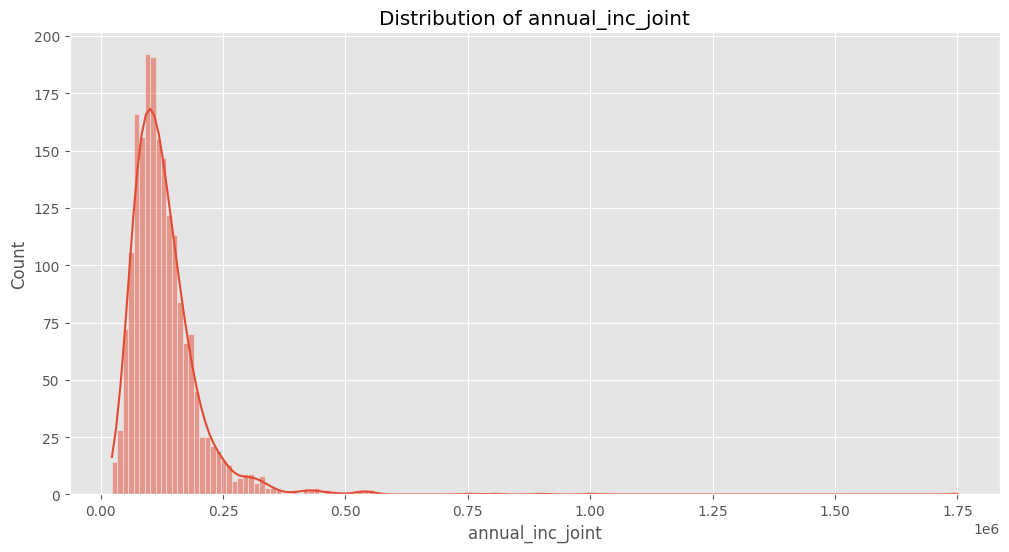

In [103]:
plot_histogram(df, column_name='annual_inc_joint', kde=True, figsize=(12, 6))

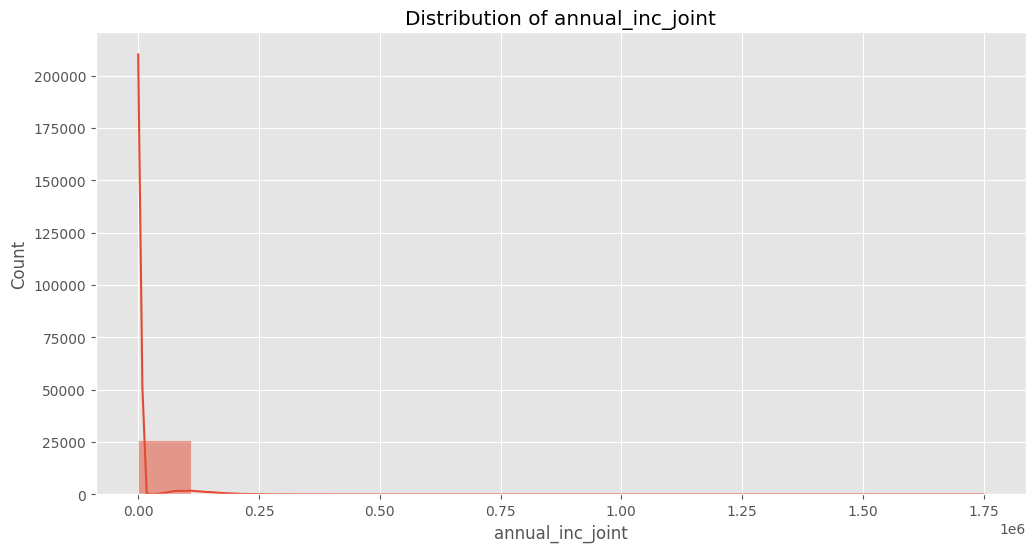

In [104]:
plot_histogram(df_clean, column_name='annual_inc_joint', kde=True, figsize=(12, 6))

The distribution differed completely as there was large number of missing values in the annual_inc_joint (about 93% is missing)


- let's impute the missing values in the emp_length , I will impute based on the annual inc joint. As the annual income is a good indicator of the employment length.


In [105]:
df_clean = impute_with_group_mode(df_clean, "emp_length", "emp_length")

In [106]:
df_clean.emp_length.isna().sum()

0

#### Plot the distribution of the emp_length column before and after imputing the missing values


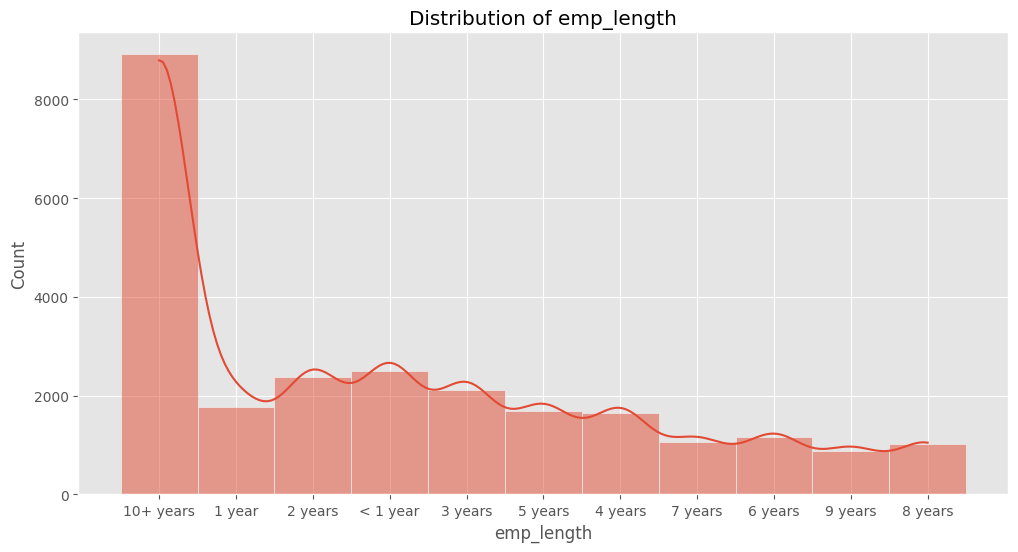

In [107]:
plot_histogram(df, column_name='emp_length', kde=True, figsize=(12, 6))

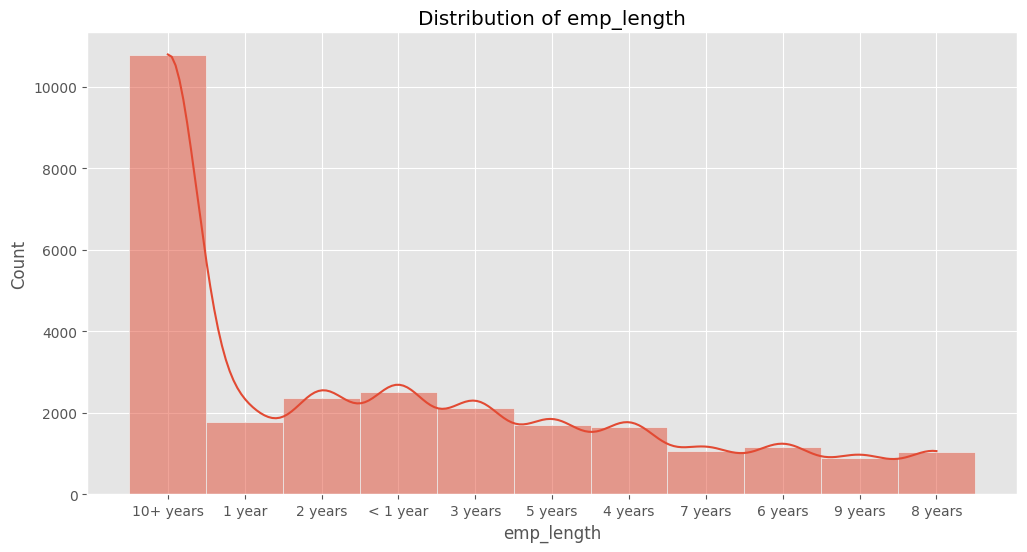

In [108]:
plot_histogram(df_clean, column_name='emp_length', kde=True, figsize=(12, 6))

### The distribution after the imputing didn't differ much that indicates the following:

- Minimal Bias: The imputation did not introduce significant bias into the dataset, which is crucial for maintaining the validity of subsequent analyses
- Representativeness: The imputed values reflect the existing data patterns, thereby enhancing the representativeness of the dataset without distorting the original distribution.

This concludes that the imputation was successful.


- let's impute the missing values in the emp_title , I will impute based on the emp_length. I will group the emp_title by the emp_length and impute it with the mode


In [109]:
df_clean = impute_with_group_mode(df_clean, 'emp_title', 'emp_length')

In [110]:
df_clean.emp_title.isna().sum()

0

In [111]:
df_clean.emp_title.unique().shape

(10868,)

In [112]:
summarize_column_values(df, ['emp_title'])

[{'Column': 'emp_title',
  'Total Values': 27030,
  'Unique Values': 10869,
  'Value Counts': {nan: 2376,
   'Teacher': 552,
   'Manager': 541,
   'Owner': 373,
   'Registered Nurse': 300,
   'Supervisor': 282,
   'Driver': 263,
   'Sales': 221,
   'Rn': 215,
   'Office Manager': 196,
   'Truck Driver': 177,
   'General Manager': 175,
   'Project Manager': 158,
   'Director': 130,
   'Sales Manager': 129,
   'President': 122,
   'Operations Manager': 103,
   'Mechanic': 97,
   'Technician': 93,
   'Engineer': 92,
   'Police Officer': 92,
   'Nurse': 92,
   'Administrative Assistant': 90,
   'Accountant': 86,
   'Store Manager': 81,
   'Customer Service': 80,
   'Attorney': 79,
   'Vice President': 75,
   'Assistant Manager': 75,
   'Account Manager': 73,
   'Executive Assistant': 72,
   'Electrician': 67,
   'Server': 64,
   'Machine Operator': 62,
   'Program Manager': 60,
   'Software Engineer': 54,
   'Paralegal': 54,
   'Foreman': 50,
   'Operator': 50,
   'Controller': 49,
   'Bra

In [113]:
summarize_column_values(df_clean, ['emp_title'])

[{'Column': 'emp_title',
  'Total Values': 27030,
  'Unique Values': 10868,
  'Value Counts': {'Teacher': 2492,
   'Manager': 967,
   'Owner': 373,
   'Registered Nurse': 310,
   'Supervisor': 282,
   'Driver': 263,
   'Sales': 221,
   'Rn': 215,
   'Office Manager': 196,
   'Truck Driver': 177,
   'General Manager': 175,
   'Project Manager': 158,
   'Director': 130,
   'Sales Manager': 129,
   'President': 122,
   'Operations Manager': 103,
   'Mechanic': 97,
   'Technician': 93,
   'Police Officer': 92,
   'Nurse': 92,
   'Engineer': 92,
   'Administrative Assistant': 90,
   'Accountant': 86,
   'Store Manager': 81,
   'Customer Service': 80,
   'Attorney': 79,
   'Vice President': 75,
   'Assistant Manager': 75,
   'Account Manager': 73,
   'Executive Assistant': 72,
   'Electrician': 67,
   'Server': 64,
   'Machine Operator': 62,
   'Program Manager': 60,
   'Paralegal': 54,
   'Software Engineer': 54,
   'Operator': 50,
   'Foreman': 50,
   'Controller': 49,
   'Branch Manager':

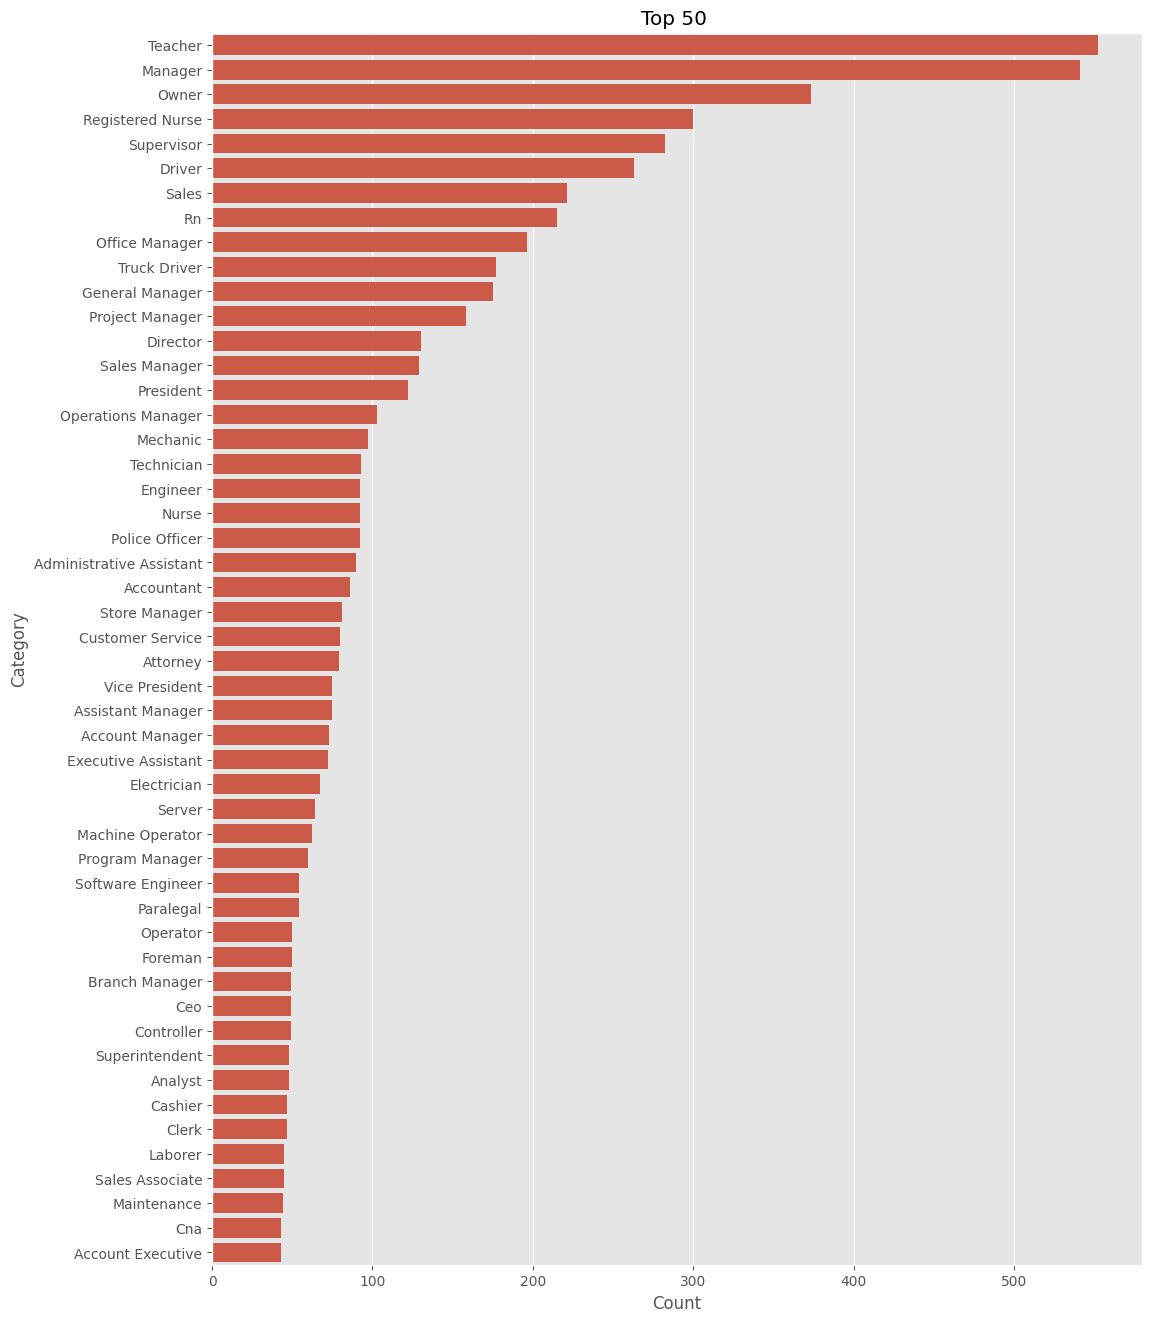

In [114]:
plot_top_n_barplot(df['emp_title'].value_counts(), 50, "", (12, 16))

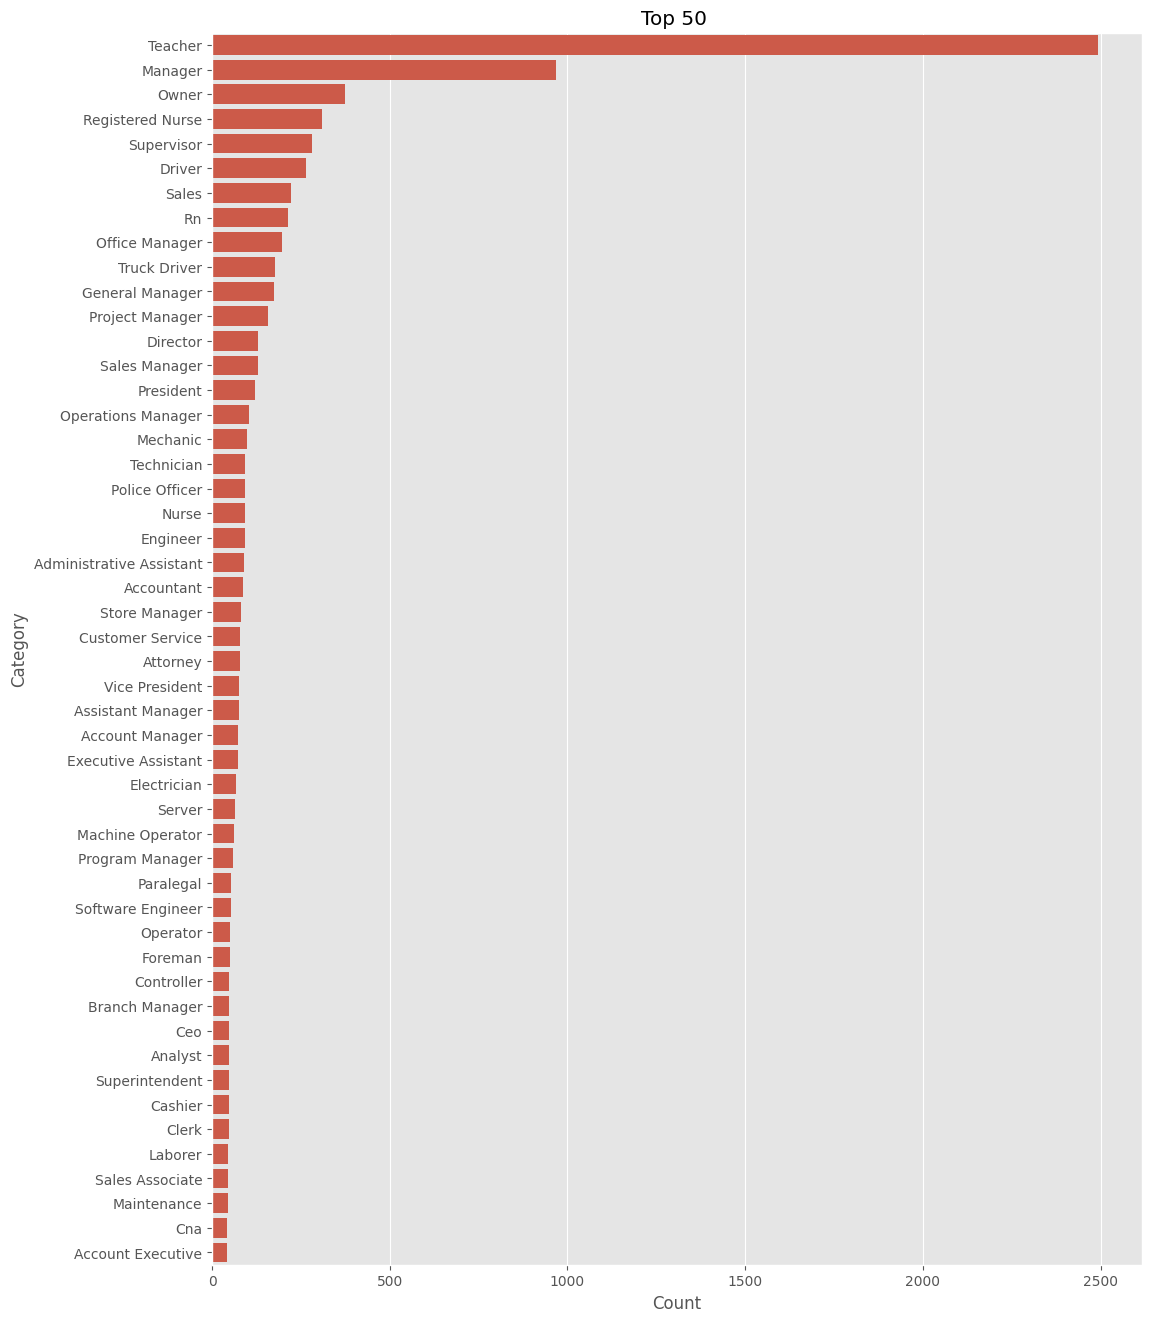

In [115]:
plot_top_n_barplot(df_clean['emp_title'].value_counts(), 50, "", (12, 16))

### It seems that the emp_title is biased towards teachers and managers


- let's impute the missing values in the int_rate , I will impute based on the state as it was observed that the missingness in the int_rate column is related to the state of the borrower where the borrower resides in CA (Canada), TX (Texas) and NY (New York). I will group the int_rate by the state and impute it with the mean


In [116]:
df_clean = impute_with_group_mean(df_clean, 'int_rate', 'state')

In [117]:
df_clean.int_rate.isna().sum()

0

In [118]:
df.int_rate.isna().sum()

1211

#### Plot the distribution of the int_rate column before and after imputing the missing values


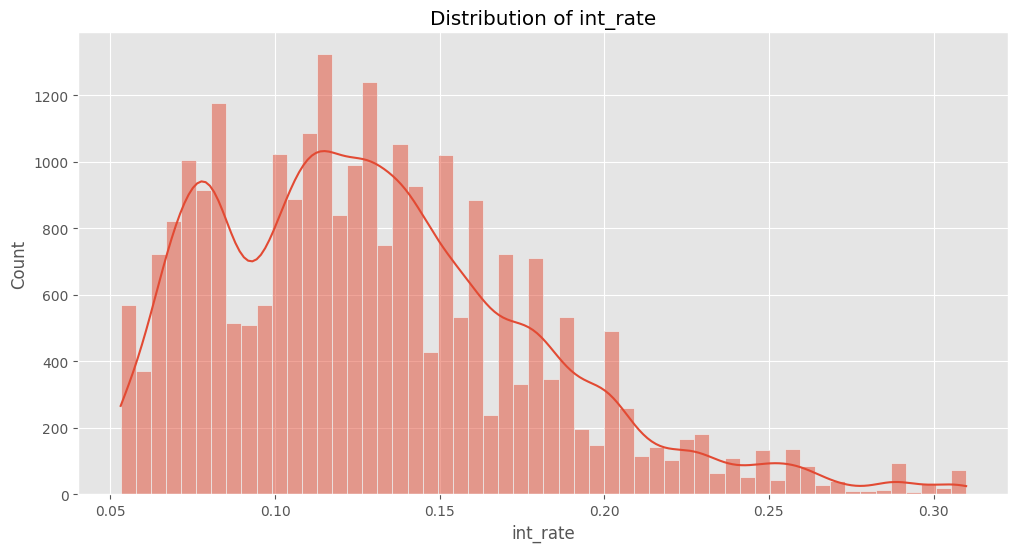

In [119]:
plot_histogram(df, 'int_rate', True, (12, 6))

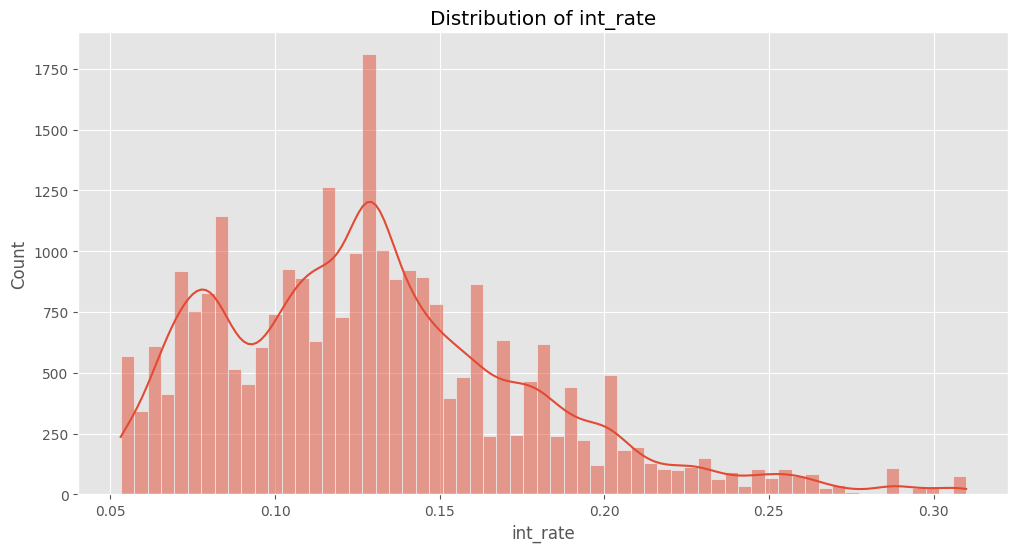

In [120]:
plot_histogram(df_clean, 'int_rate', True, (12, 6))

### The distribution after the imputing didn't differ much that indicates the following:

- Minimal Bias: The imputation did not introduce significant bias into the dataset, which is crucial for maintaining the validity of subsequent analyses
- Representativeness: The imputed values reflect the existing data patterns, thereby enhancing the representativeness of the dataset without distorting the original distribution.

This concludes that the imputation was successful.


- let's impute the missing values in the description , I will impute based on the purpose. I will group the description by the purpose and impute it with the mode


In [121]:
df_clean = impute_with_group_mode(df_clean, 'description', 'purpose')

In [122]:
df_clean.description.isna().sum()

0

In [123]:
df.description.isna().sum()

218

In [124]:
summarize_column_values(df, ['description'])

[{'Column': 'description',
  'Total Values': 27030,
  'Unique Values': 664,
  'Value Counts': {'Debt Consolidation': 14436,
   'Credit Card Refinancing': 6140,
   'Home Improvement': 1676,
   'Other': 1567,
   'Major Purchase': 550,
   'Medical Expenses': 323,
   'Car Financing': 265,
   'Business': 230,
   nan: 218,
   'Home Buying': 183,
   'Vacation': 181,
   'Moving And Relocation': 151,
   'Consolidation': 52,
   'Credit Card Consolidation': 27,
   'Credit Card Payoff': 26,
   'Debt Consolidation Loan': 24,
   'Consolidation Loan': 20,
   'Green Loan': 17,
   'Consolidate': 16,
   'Debt': 16,
   'Loan': 16,
   'Payoff': 16,
   'Credit Card Refinance': 15,
   'Credit Cards': 14,
   'Personal Loan': 14,
   'Personal': 13,
   'Pay Off Credit Cards': 9,
   'Freedom': 9,
   'Credit Consolidation': 8,
   'Credit Card Loan': 8,
   'Refinance': 8,
   'Debt Loan': 6,
   'Debt Payoff': 6,
   'Credit Card Debt': 6,
   'Pay Off': 6,
   'My Loan': 6,
   'Cc Consolidation': 6,
   'Credit Card':

In [125]:
summarize_column_values(df_clean, ['description'])

[{'Column': 'description',
  'Total Values': 27030,
  'Unique Values': 663,
  'Value Counts': {'Debt Consolidation': 14567,
   'Credit Card Refinancing': 6199,
   'Home Improvement': 1686,
   'Other': 1573,
   'Major Purchase': 555,
   'Medical Expenses': 324,
   'Car Financing': 267,
   'Business': 230,
   'Home Buying': 184,
   'Vacation': 182,
   'Moving And Relocation': 153,
   'Consolidation': 52,
   'Credit Card Consolidation': 27,
   'Credit Card Payoff': 26,
   'Debt Consolidation Loan': 24,
   'Consolidation Loan': 20,
   'Green Loan': 17,
   'Consolidate': 16,
   'Debt': 16,
   'Loan': 16,
   'Payoff': 16,
   'Credit Card Refinance': 15,
   'Personal Loan': 14,
   'Credit Cards': 14,
   'Personal': 13,
   'Freedom': 9,
   'Pay Off Credit Cards': 9,
   'Credit Card Loan': 8,
   'Refinance': 8,
   'Credit Consolidation': 8,
   'Debt Payoff': 6,
   'Debt Loan': 6,
   'My Loan': 6,
   'Credit Card Debt': 6,
   'Pay Off': 6,
   'Cc Consolidation': 6,
   'Credit Card': 5,
   'Debt 

#### Plot the distribution of the description column before and after imputing the missing values


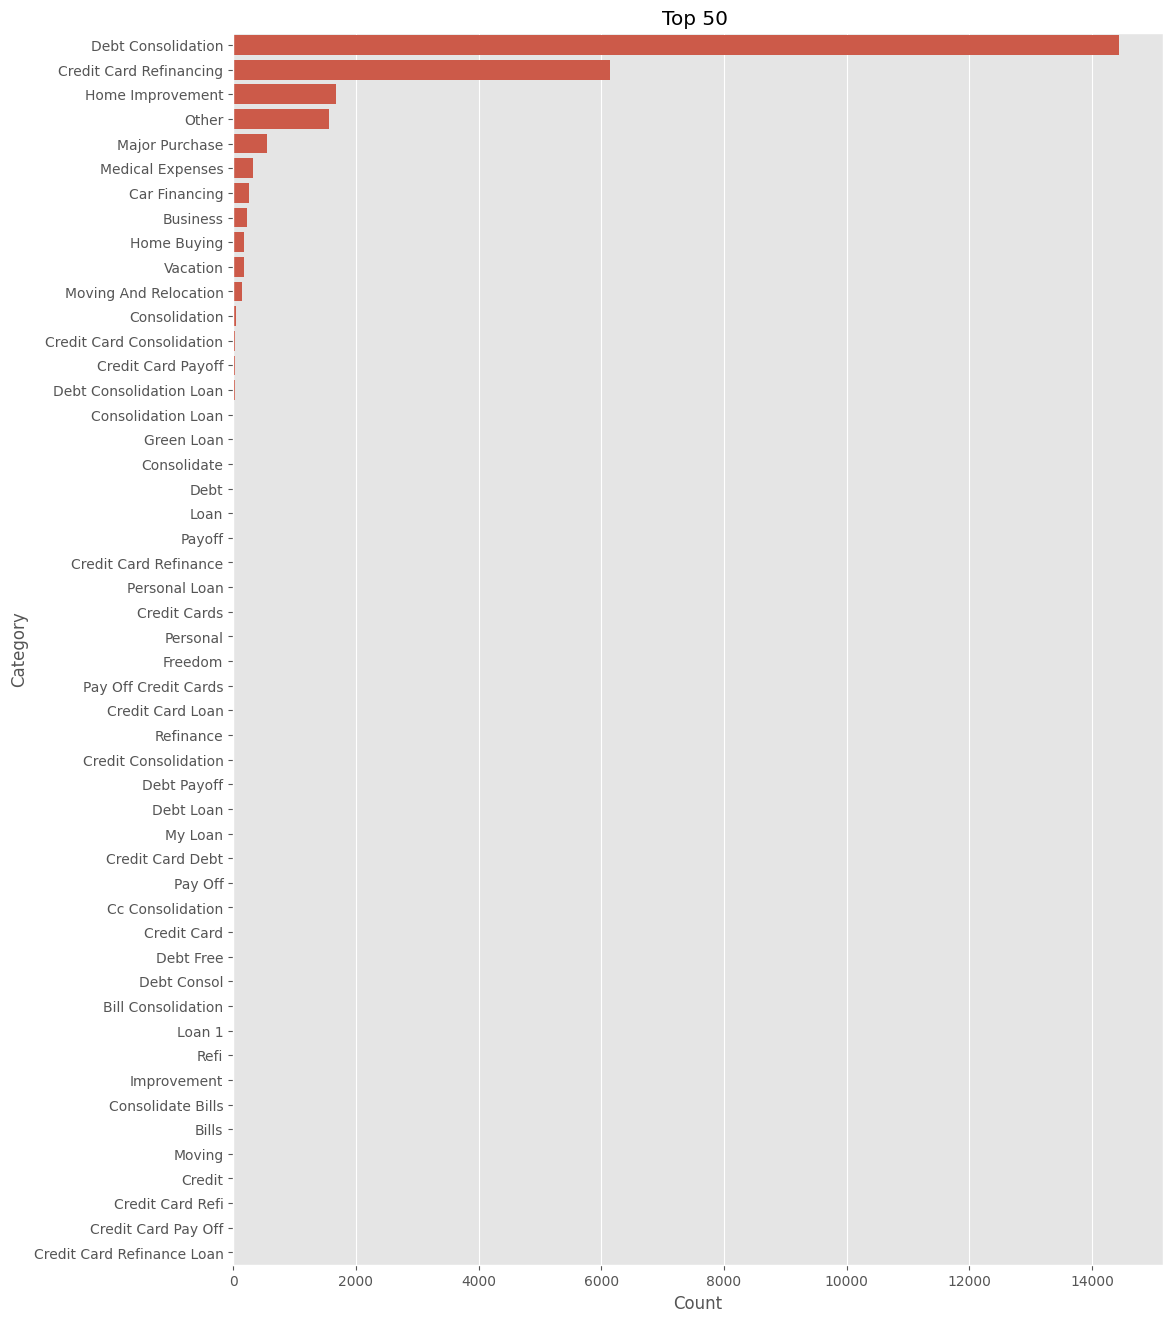

In [126]:
plot_top_n_barplot(df['description'].value_counts(), 50, "", (12, 16))

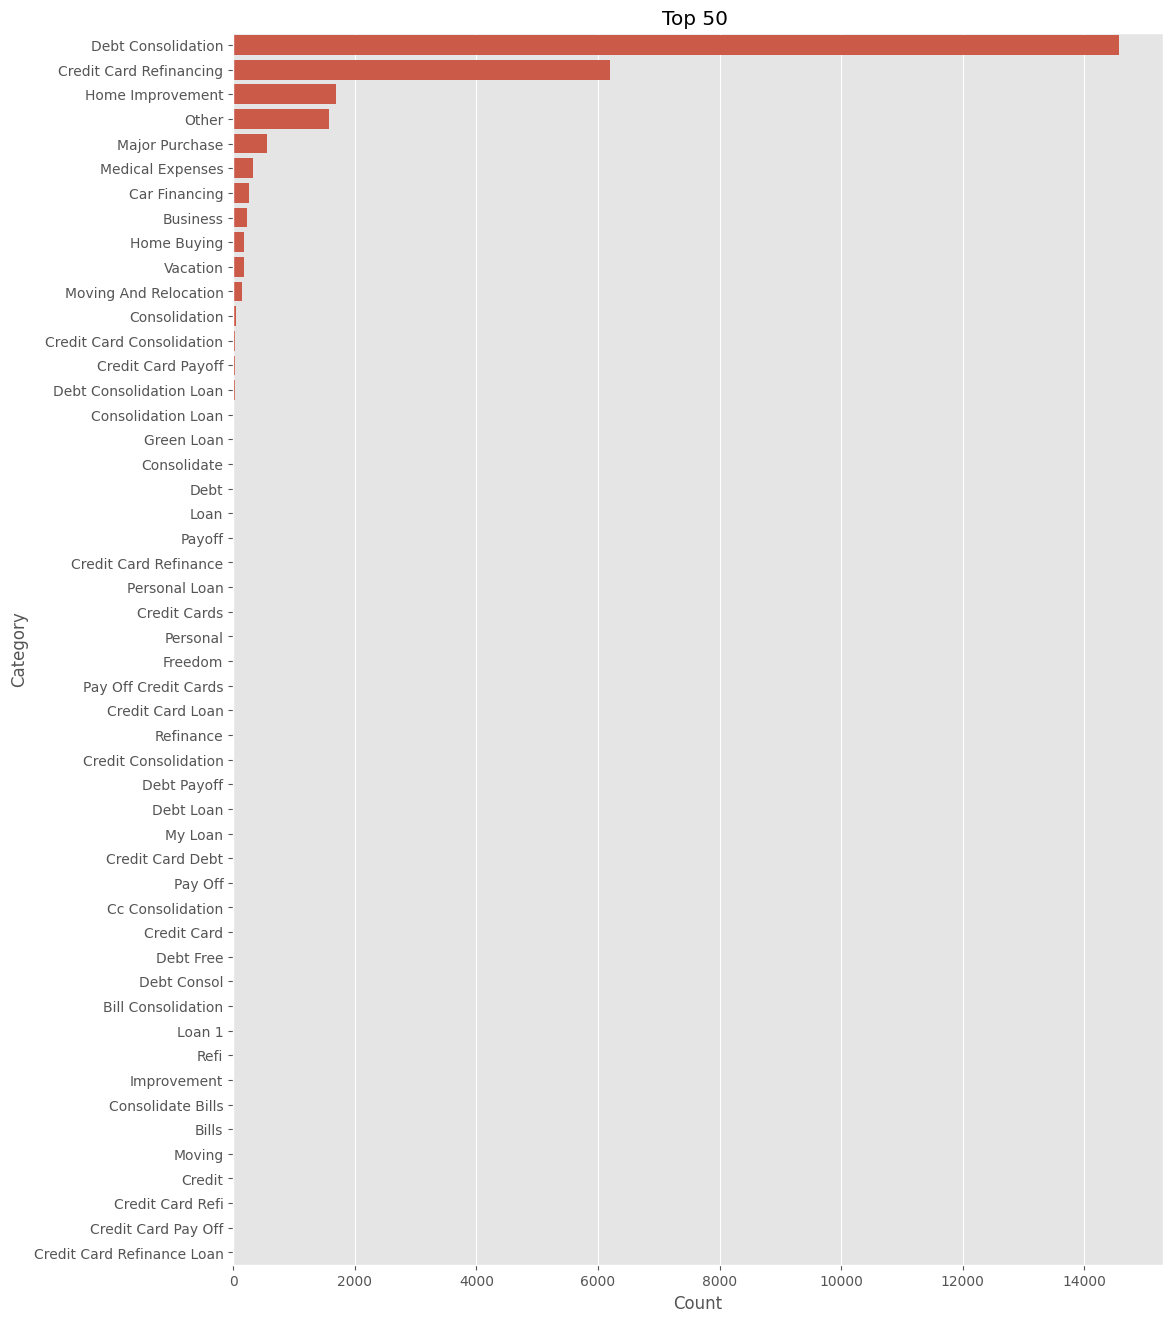

In [127]:
plot_top_n_barplot(df_clean['description'].value_counts(), 50, "", (12, 16))

### The distribution after the imputing didn't differ much that indicates the following:

- Minimal Bias: The imputation did not introduce significant bias into the dataset, which is crucial for maintaining the validity of subsequent analyses
- Representativeness: The imputed values reflect the existing data patterns, thereby enhancing the representativeness of the dataset without distorting the original distribution.

In addition to the order was also maintained with the same distributions and the imputation didn't introduce any bias

This concludes that the imputation was successful.


## Findings and conclusions


## Observing and Handling outliers


#### Defined functions for observing and handling outliers


In [221]:
def plot_distribution(df: pd.DataFrame, column: str):
    """
    Plot the distribution of a column in the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the column to plot.
    column (str): The column to plot the distribution for.
    """

    # Create a figure with subplots
    _, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

    # Plot Boxplot
    sns.boxplot(x=df[column], ax=axes[0])
    axes[0].set_title('Box Plot')

    # Plot KDE (Kernel Density Estimate)
    sns.kdeplot(df[column], ax=axes[1])
    axes[1].set_title('KDE Distribution')

    # Plot Histogram
    sns.histplot(df[column], kde=False, ax=axes[2])
    axes[2].set_title('Histogram')

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()

def apply_zscore_scaling(df: pd.DataFrame, column: str):
    """
    Apply Z-score scaling to the specified columns in the DataFrame to detect outliers and plot.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the columns to scale.
    column: The column to apply Z-score scaling.

    Returns:
    z_mask1, z_mask2: The boolean masks for the outliers.
    """
    # Calculate the Z-score for the column
    df[column + '_zscore'] = np.abs((df[column] - df[column].mean()) / df[column].std())
    z_mask1 = df[column + '_zscore'] > 3
    z_mask2 = df[column + '_zscore'] < -3

    # Get the percentage of the outliers
    z_outliers = (z_mask1 | z_mask2).sum()
    z_outliers_percent = z_outliers / len(df) * 100
    print(f'Z-score outliers for {column}: {z_outliers} ({z_outliers_percent:.2f}%)')

    # Plot the histogram of the Z-score
    plot_histogram(df, column + '_zscore', kde=True, figsize=(12, 6))
    
    return z_mask1, z_mask2

def apply_iqr_scaling(df: pd.DataFrame, column: str):
    """
    Apply IQR scaling to the specified columns in the DataFrame to detect outliers and plot.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the columns to scale.
    column: The column to apply IQR scaling.

    Returns:
    iqr_mask1, iqr_mask2: The boolean masks for the outliers.
    """
    # Calculate the IQR for the column
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    iqr_mask1 = df[column] > (q3 + 1.5 * iqr)
    iqr_mask2 = df[column] < (q1 - 1.5 * iqr)

    # Get the percentage of the outliers
    iqr_outliers = (iqr_mask1 | iqr_mask2).sum()
    iqr_outliers_percent = iqr_outliers / len(df) * 100
    print(f'IQR outliers for {column}: {iqr_outliers} ({iqr_outliers_percent:.2f}%)')

    # Plot the histogram of the IQR
    plot_boxplot_single_column(df, column, figsize=(12, 6))
    
    return iqr_mask1, iqr_mask2

def apply_log_transformation(df, column_name):
    """
    Applies log or log1p transformation to a specified column depending on whether
    the column contains zero or negative values. It plots histograms for the original
    and log-transformed (or log1p-transformed) data.
    
    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        column_name (str): The column to log-transform and visualize.
        
    Returns:
        None: Displays the plots.
    """
    
    if (df[column_name] <= 0).any():
        print(f"Column '{column_name}' contains non-positive values. Applying log1p transformation (log(1 + x)) to handle zeros.")
        df[f'log1p_{column_name}'] = np.log1p(df[column_name])
        transformed_col = f'log1p_{column_name}'
    else:
        print(f"Applying log transformation to column '{column_name}'")
        df[f'log_{column_name}'] = np.log(df[column_name])
        transformed_col = f'log_{column_name}'
    
    # Plot the original and transformed data
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    
    # Original data histogram
    sns.histplot(df[column_name], ax=ax[0], kde=True)
    ax[0].set_title(f'Original Data: {column_name}')
    
    # Log or log1p-transformed data histogram
    sns.histplot(df[transformed_col], ax=ax[1], kde=True)
    ax[1].set_title(f'Transformed Data: {transformed_col}')
    
    plt.tight_layout()
    plt.show()



def apply_sqrt_transformation(df, column_name):
    """
    Applies square root transformation to a specified column and plots histograms for the original
    and square root-transformed data.
    
    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        column_name (str): The column to apply the square root transformation and visualize.
        
    Returns:
        None: Displays the plots.
    """
    # Ensure that the column contains non-negative values (sqrt requires non-negative values)
    if (df[column_name] < 0).any():
        print(f"Column '{column_name}' contains negative values, which are not suitable for square root transformation.")
        return
    
    # Create a new column for the square root-transformed data
    df[f'sqrt_{column_name}'] = np.sqrt(df[column_name])
    
    # Plot the original and square root-transformed data
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    
    sns.histplot(df[column_name], ax=ax[0], kde=True)
    ax[0].set_title(f'Original Data: {column_name}')
    
    sns.histplot(df[f'sqrt_{column_name}'], ax=ax[1], kde=True)
    ax[1].set_title(f'Square Root Transformed Data: sqrt_{column_name}')

    plt.tight_layout()
    plt.show()


def apply_reciprocal_transformation(df, column_name):
    """
    Applies reciprocal transformation to a specified column and plots histograms for the original
    and reciprocal-transformed data.
    
    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        column_name (str): The column to apply the reciprocal transformation and visualize.
        
    Returns:
        None: Displays the plots.
    """
    # Ensure the column does not contain zero (reciprocal of zero is undefined)
    if (df[column_name] == 0).any():
        print(f"Column '{column_name}' contains zero values, which are not suitable for reciprocal transformation.")
        return
    
    # Create a new column for the reciprocal-transformed data
    df[f'reciprocal_{column_name}'] = 1 / df[column_name]
    
    # Plot the original and reciprocal-transformed data
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    
    sns.histplot(df[column_name], ax=ax[0], kde=True)
    ax[0].set_title(f'Original Data: {column_name}')
    
    sns.histplot(df[f'reciprocal_{column_name}'], ax=ax[1], kde=True)
    ax[1].set_title(f'Reciprocal Transformed Data: reciprocal_{column_name}')

    plt.tight_layout()
    plt.show()


def apply_capping_iqr(df, column_name):
    """
    Caps the outliers in a specified column by setting values below the lower percentile to the lower threshold
    and values above the upper percentile to the upper threshold.
    
    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        column_name (str): The column to apply capping on.
        
    Returns:
        None: Displays the plots.
    """

    Q1, Q3, IQR = df[column_name].quantile(0.25), df[column_name].quantile(0.75), df[column_name].quantile(0.75) - df[column_name].quantile(0.25)
    lower_threshold, upper_threshold = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    
    # Cap the values at the specified thresholds
    df[f'capped_{column_name}'] = df[column_name].clip(lower=lower_threshold, upper=upper_threshold)
    
    # Plot the original and capped data
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    sns.histplot(df[column_name], ax=ax[0], kde=True)
    ax[0].set_title(f'Original Data: {column_name}')
    
    sns.histplot(df[f'capped_{column_name}'], ax=ax[1], kde=True)
    ax[1].set_title(f'Capped Data: capped_{column_name}')

    plt.tight_layout()
    plt.show()

def apply_capping_threshold(df, column_name, lower_threshold, upper_threshold):
    """
    Caps the outliers in a specified column by setting values below the lower threshold to the lower threshold
    and values above the upper threshold to the upper threshold.
    
    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        column_name (str): The column to apply capping on.
        lower_threshold (float): The lower threshold for capping.
        upper_threshold (float): The upper threshold for capping.
        
    Returns:
        None: Displays the plots.
    """
    # Cap the values at the specified thresholds
    df[f'capped_{column_name}'] = df[column_name].clip(lower=lower_threshold, upper=upper_threshold)
    
    # Plot the original and capped data
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    sns.histplot(df[column_name], ax=ax[0], kde=True)
    ax[0].set_title(f'Original Data: {column_name}')
    
    sns.histplot(df[f'capped_{column_name}'], ax=ax[1], kde=True)
    ax[1].set_title(f'Capped Data: capped_{column_name}')

    plt.tight_layout()
    plt.show()
    

# Example Usage:
# plot_capping(df_clean, 'loan_amount')



In [129]:
df_clean.describe()

annual_inc  annual_inc_joint    avg_cur_bal   tot_cur_bal  \
count  2.703000e+04      2.703000e+04   27030.000000  2.703000e+04   
mean   8.038403e+04      9.281245e+03   13642.988272  1.447128e+05   
std    1.059586e+05      4.012870e+04   16946.032082  1.663899e+05   
min    2.000000e+03      0.000000e+00       0.000000  0.000000e+00   
25%    4.784000e+04      0.000000e+00    3075.000000  2.938375e+04   
50%    6.631050e+04      0.000000e+00    7399.000000  8.040300e+04   
75%    9.500000e+04      0.000000e+00   18838.500000  2.157390e+05   
max    7.691779e+06      1.750000e+06  555925.000000  4.447397e+06   

             loan_id   loan_amount  funded_amount      int_rate         grade  
count   27030.000000  27030.000000   27030.000000  27030.000000  27030.000000  
mean   134907.454569  15375.772290   15375.772290      0.130156     10.848946  
std     77931.494675   9437.017325    9437.017325      0.047716      6.304635  
min        11.000000   1000.000000    1000.000000      0.053100      1.000000  
25%     66868.750000   8000.000000    8000.000000      0.094400      6.000000  
50%    134591.500000  13000.000000   13000.000000      0.127300     10.000000  
75%    202027.000000  20000.000000   20000.000000      0.156100     15.000000  
max    270296.000000  40000.000000   40000.000000      0.309900     35.000000

#### Observing Outliers in annual_inc


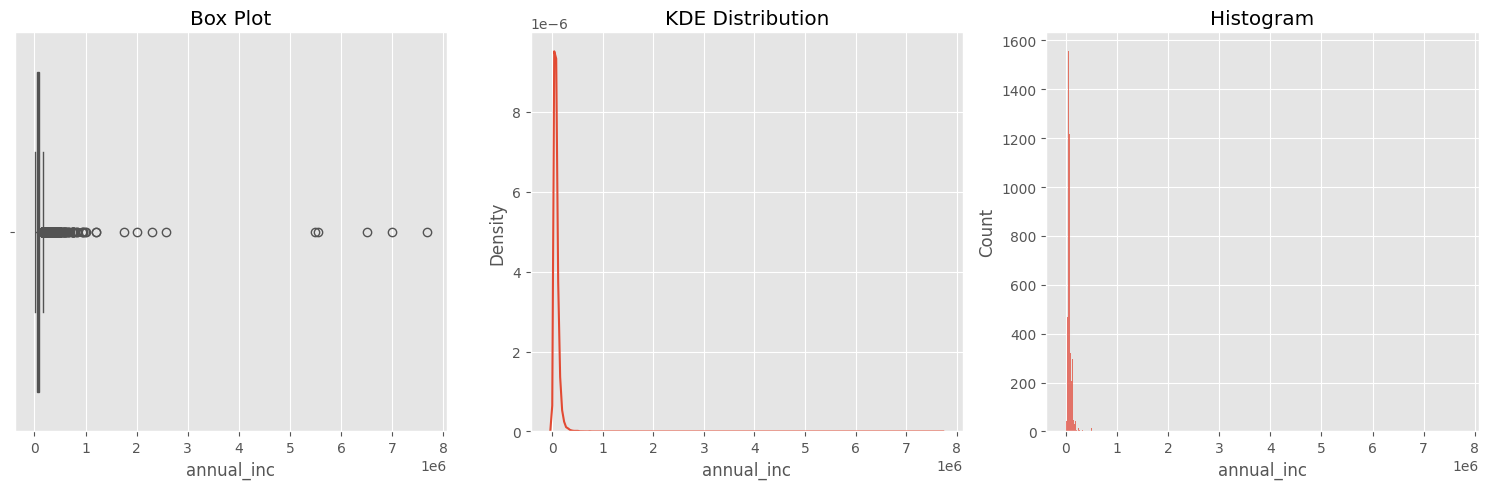

In [130]:
plot_distribution(df_clean, 'annual_inc')

- Apply the z-score to detect outliers


Z-score outliers for annual_inc: 103 (0.38%)


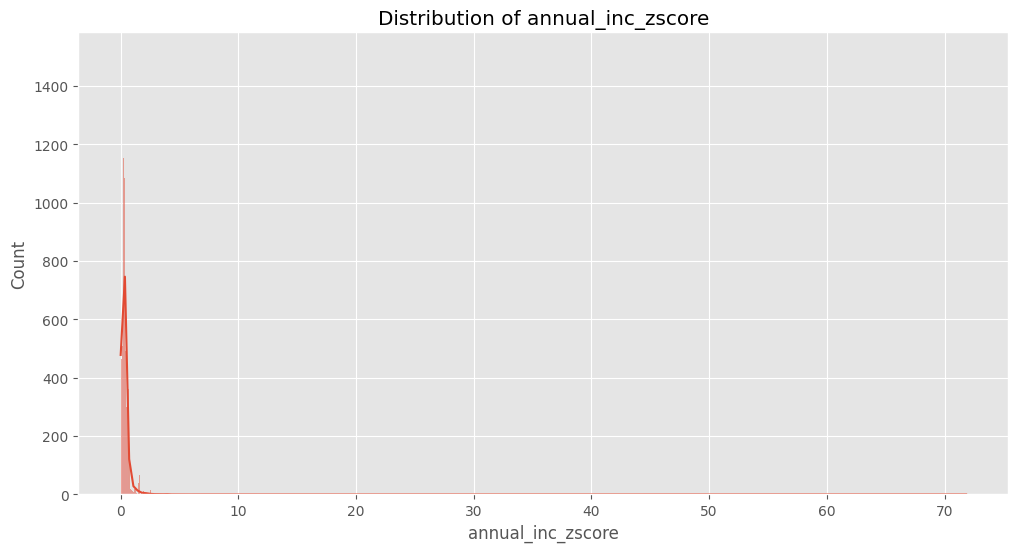

In [131]:
annual_inc_z_mask_1, annual_inc_z_mask_2 = apply_zscore_scaling(df_clean.copy(), 'annual_inc')

In [132]:
df_clean[annual_inc_z_mask_1 | annual_inc_z_mask_2].sample(10)

customer_id  \
11527  YidceDk3XHhhNTZmRFx4MWE3XHhkOFhceGY3XHhkNVx4OW...   
7223   YidceDgzKVZceGViQ1x4MThtXHhmZWlceGI2XHhlMFx4ZW...   
4506   YidceGE4XHhiMVx4OWRceGVhXHhlNlx4MTBUXHhlODZceG...   
11582  YiJgXHhjYVx4ZTVceGNhXHhlM1x4ZjdceGFiI1x4MWJceD...   
22816  YidceDFhYFx4ZTNOXHhmOG5ceGFlYjBceGFhIVx4YjBceD...   
19814  YidtXHgxMlx4ZWJcXFx4MWNKXHhlNFx4OTM/XHhhOFx4OT...   
571    YidceGM2XHhhYlx4ZTZceGFlYVx4YTclXHhiOFx4ODRceG...   
11478  YidceDBjKVx4YTJceDEwXHhkZkJlfVx4YmQuXHhmMyw3XH...   
2462   YidceDg3XHg5ZStceGFhd1x0dlx4ZDhceGQwXHhiZVx4MD...   
12362  YidceDBiLlNLXHhhNlVceGM3Vlx4ZWVceGY1XHhjOTQ1Pl...   

                              emp_title emp_length home_ownership  annual_inc  \
11527                         Collector    5 years           Rent   2575572.0   
7223                     Wealth Advisor  10+ years       Mortgage    600000.0   
4506                          President  10+ years       Mortgage    500000.0   
11582                          Attorney  10+ years       Mortgage    650000.0   
22816                        Purchasing  10+ years           Rent    480000.0   
19814                           Teacher  10+ years       Mortgage    400000.0   
571                   Director Of Sales  10+ years           Rent    750000.0   
11478                 Managing Director    5 years       Mortgage    475000.0   
2462   Global Head, Development Science   < 1 year       Mortgage    400000.0   
12362          Senior Account Executive    3 years           Rent    502000.0   

       annual_inc_joint verification_status zip_code addr_state  avg_cur_bal  \
11527               0.0     Source Verified    328xx         FL       3322.0   
7223                0.0            Verified    662xx         KS      64757.0   
4506                0.0            Verified    956xx         CA      57288.0   
11582               0.0            Verified    020xx         MA     132152.0   
22816               0.0     Source Verified    989xx         WA       2096.0   
19814               0.0        Not Verified    325xx         FL      33043.0   
571            750000.0        Not Verified    077xx         NJ      20249.0   
11478               0.0            Verified    068xx         CT      68553.0   
2462                0.0     Source Verified    085xx         NJ      45183.0   
12362               0.0            Verified    900xx         CA       5161.0   

       tot_cur_bal  loan_id loan_status  loan_amount state  funded_amount  \
11527      13287.0    19860  Fully Paid       4000.0    FL         4000.0   
7223      582812.0   259111     Current      35000.0    KS        35000.0   
4506     1317624.0   265004     Current      40000.0    CA        40000.0   
11582    1850126.0   253212  Fully Paid      35000.0    MA        35000.0   
22816       4191.0   172896     Current      17000.0    WA        17000.0   
19814     958255.0   236213     Current      28000.0    FL        28000.0   
571       364489.0   107846  Fully Paid      10700.0    NJ        10700.0   
11478    1508157.0   238072     Current      28500.0    CT        28500.0   
2462      497015.0   234755     Current      28000.0    NJ        28000.0   
12362      72248.0   252370  Fully Paid      34500.0    CA        34500.0   

             term  int_rate  grade        issue_date  pymnt_plan        type  \
11527   36 months    0.1774     11    19 August 2019       False  Individual   
7223    60 months    0.1333     11  15 February 2015       False  Individual   
4506    36 months    0.0646      3     19 March 2019       False  Individual   
11582   60 months    0.1952     24       14 May 2014       False  Individual   
22816   36 months    0.1308      7    19 August 2019       False  Individual   
19814   60 months    0.0789      5       15 May 2015       False  Individual   
571     60 months    0.1992     19  18 November 2018       False       Joint   
11478   60 months    0.1144      6  16 November 2016       False  Individual   
2462    36 months    0.0532      5   16 Jan

- Apply the iqr to detect outliers


IQR outliers for annual_inc: 1351 (5.00%)


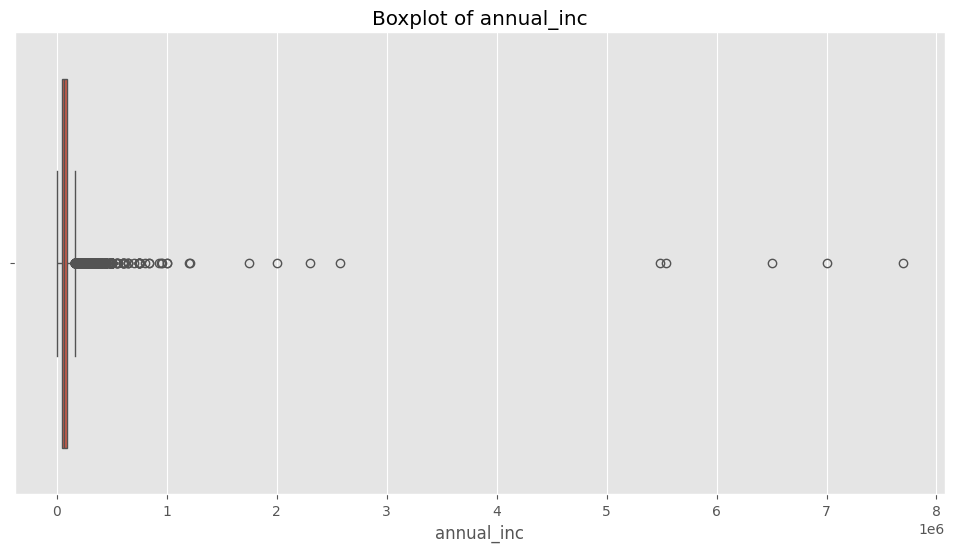

In [133]:
annual_inc_iqr_mask1, annual_inc_iqr_mask2 = apply_iqr_scaling(df_clean.copy(), 'annual_inc')

In [134]:
df_clean[annual_inc_iqr_mask1 | annual_inc_iqr_mask2].sample(10)

customer_id  \
12675  YiciKFx4YzM3Olx4YTZceGY5Nlx4ZWRceGMyXHhlN1x4ZD...   
23158  YiJceGJmXHhjNlx4MTJ2XHgwM1x4ZGVceGEwXHhiYVdJcC...   
20650  YidceDAzVlx4ZjZYXHhhY1x4ZTBceGExXHhhNFx4MTdceG...   
25646  YidceGUyXHhmYyheXHhlNT5ceGRhXHhjZWlceGRkXHgwMl...   
14707  YidceGQ5c1x4YjZHXHgwY2hceGMzXHg4OCMgXHg5NjhkXH...   
4032   YiJceGIyXHhiOFx4ZDBceGRkXHhkNlx4OTZgcCdceDFkXH...   
10312  YidceDAxXHhiOFx4YWZceDE0XHhmOFx4YmVceGFkXHg5NV...   
6406   YidceGJlXHhmYyxydlx4OGJceGI2Xlx4YTdceDg5XHgxMX...   
15844  YidceGNmTFx4YTdceGQ4U1x4ZDhceDlhXHgwY1x4MGUkXH...   
21020  YiJceDgxfVx4ZjB4XHgxZnNcdFx4YjlxXHg4Nlx4YjJceG...   

                      emp_title emp_length home_ownership  annual_inc  \
12675            Superintendent  10+ years       Mortgage    250000.0   
23158   Managing Partner, Sales  10+ years       Mortgage    180000.0   
20650                 Executive    4 years            Own    215000.0   
25646                     Coach    2 years       Mortgage    240000.0   
14707  Director Of Prefab Walls   < 1 year       Mortgage    250000.0   
4032         Senior Agile Coach   < 1 year       Mortgage    170000.0   
10312          Child Attendance    3 years            Any    206100.0   
6406                    Manager   < 1 year       Mortgage    180000.0   
15844        Clinical Physician    2 years       Mortgage    350000.0   
21020               Firefighter  10+ years       Mortgage    200000.0   

       annual_inc_joint verification_status zip_code addr_state  avg_cur_bal  \
12675               0.0            Verified    184xx         PA      23798.0   
23158               0.0            Verified    980xx         WA      20800.0   
20650               0.0            Verified    226xx         VA      34283.0   
25646               0.0     Source Verified    481xx         MI      22699.0   
14707               0.0     Source Verified    956xx         CA      61566.0   
4032                0.0     Source Verified    112xx         NY     108554.0   
10312               0.0        Not Verified    339xx         FL       3866.0   
6406                0.0     Source Verified    908xx         CA      18530.0   
15844               0.0            Verified    065xx         CT      30367.0   
21020               0.0        Not Verified    103xx         NY      46024.0   

       tot_cur_bal  loan_id        loan_status  loan_amount state  \
12675     642555.0   266605            Current      40000.0    PA   
23158     311995.0   261464         Fully Paid      35000.0    WA   
20650     582814.0   142719            Current      14400.0    VA   
25646     158895.0   160217         Fully Paid      15500.0    MI   
14707     554092.0   266455            Current      40000.0    CA   
4032      542768.0   216354        Charged Off      24000.0    NY   
10312      38659.0    99165            Current      10000.0    FL   
6406      500305.0   168093            Current      16000.0    CA   
15844     485878.0   230452  Late (16-30 days)      25475.0    CT   
21020     414216.0   240297         Fully Paid      30000.0    NY   

       funded_amount        term  int_rate  grade         issue_date  \
12675        40000.0   36 months  0.107200     10    19 January 2019   
23158        35000.0   60 months  0.209900     25     14 August 2014   
20650        14400.0   60 months  0.099900      9       15 July 2015   
25646        15500.0   36 months  0.150200     15    18 October 2018   
14707        40000.0   36 months  0.100800      8     18 August 2018   
4032         24000.0   36 months  0.115500      6  18 September 2018   
10312        10000.0   36 months  0.223500     16   19 February 2019   
6406         16000.0   60 months  0.150200     14   18 December 2018   
15844        25475.0   60 months  0.107500      7      16 March 2016   
21020        30000.0   36 months  0.129764      2  19 September 2019   

       pymnt_plan        type             purpose              description  
12675       False  Individual  debt_consolidation       Debt Consolid

#### Using the IQR method to detect outliers in the annual_inc column is more effective than the z-score method as the data is not normally distributed and skewed.

#### Handle Outliers in the annual_inc column


- Apply the log-transformation to handle the outliers


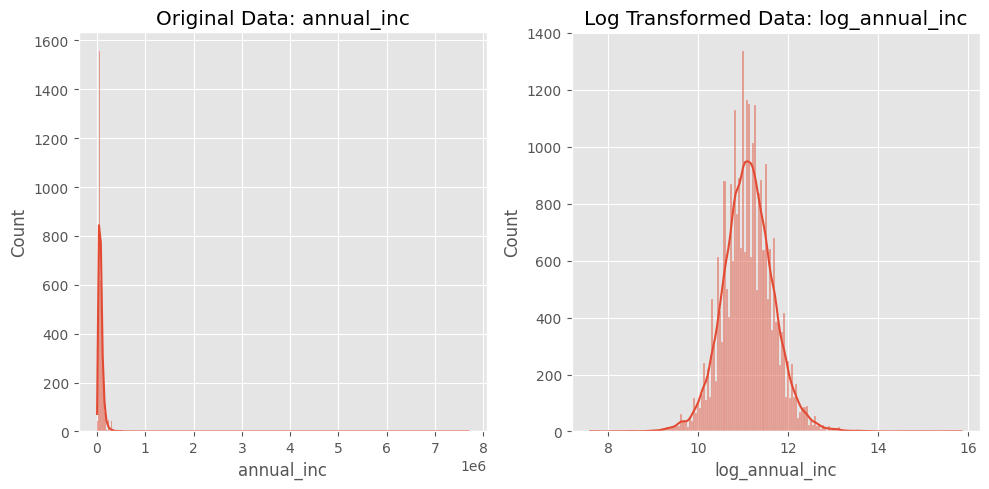

In [135]:
apply_log_transformation(df_clean, 'annual_inc')

We can observe that the log transformation made the data more normally distributed. Let's check if the outliers was handled or not using iqr method


IQR outliers for log_annual_inc: 596 (2.20%)


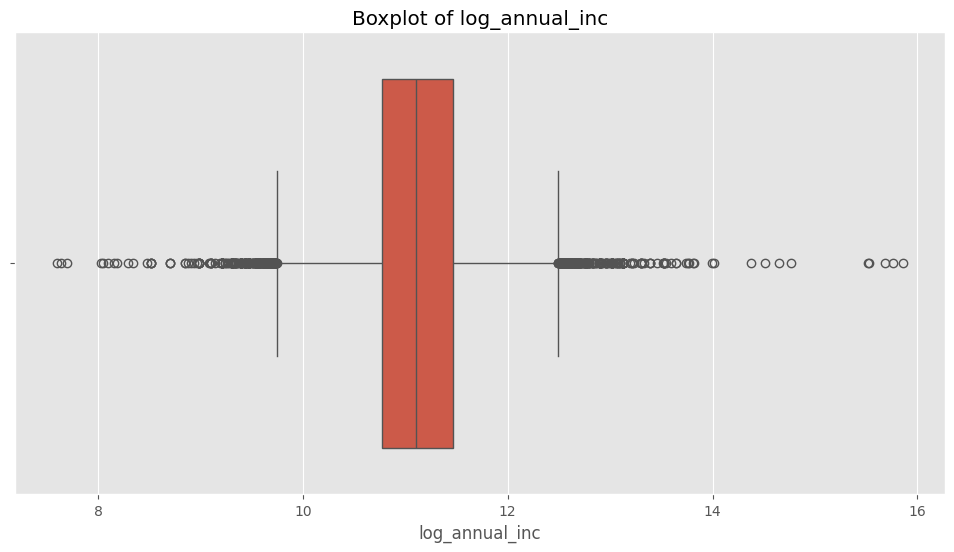

In [137]:
ignore1, ignore2 = apply_iqr_scaling(df_clean.copy(), 'log_annual_inc')

Log transformation didn't handle the outliers as there is still 596 outliers

- Apply the sqrt transformation

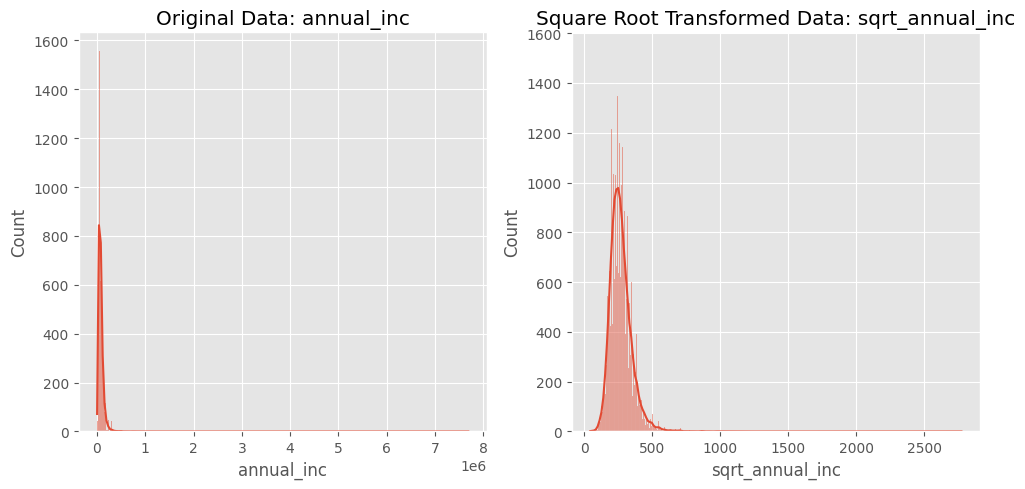

In [142]:
apply_sqrt_transformation(df_clean, 'annual_inc')

IQR outliers for sqrt_annual_inc: 843 (3.12%)


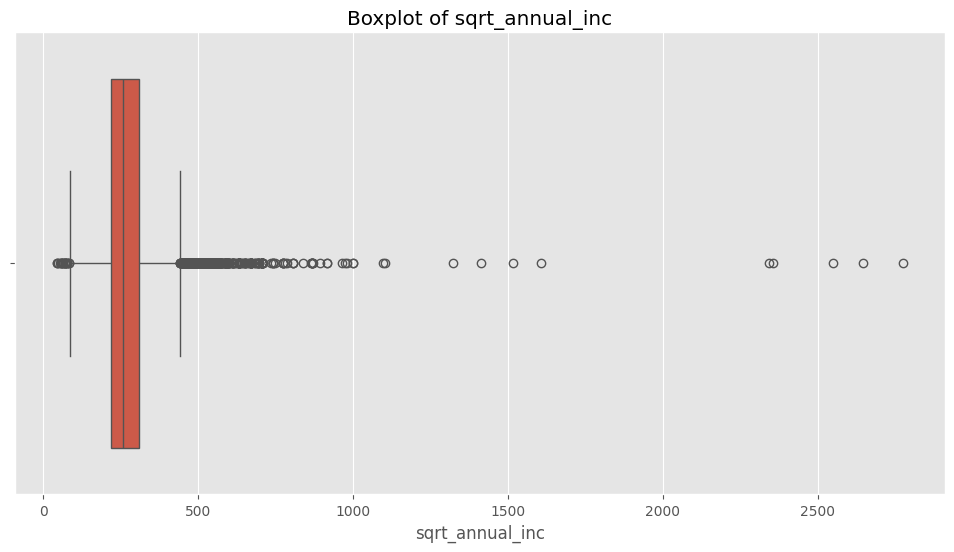

In [143]:
ignore1, ignore2 = apply_iqr_scaling(df_clean.copy(), 'sqrt_annual_inc')

Square root transformation didn't handle the outliers as there are still 843 outliers

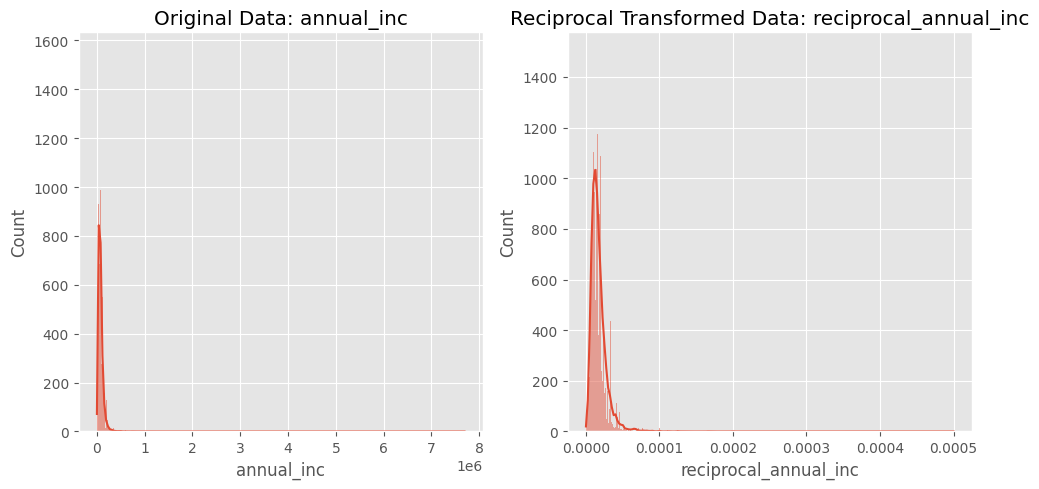

In [151]:
apply_reciprocal_transformation(df_clean, 'annual_inc')

IQR outliers for reciprocal_annual_inc: 1316 (4.87%)


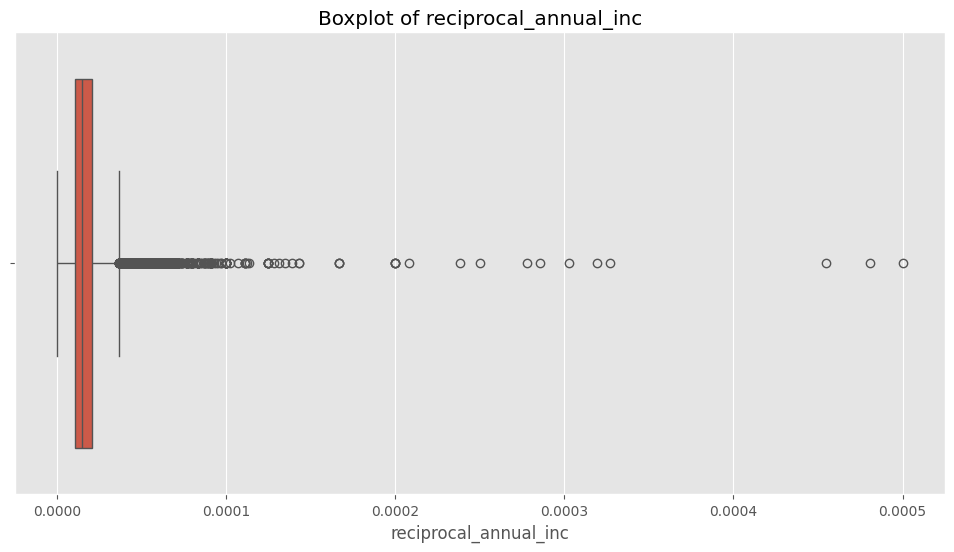

In [152]:
ignore1, ignore2 = apply_iqr_scaling(df_clean.copy(), 'reciprocal_annual_inc')

Reciprocal transformation didn't handle the outliers as there are still 1316 outliers

In [153]:
df_clean.drop(columns=['reciprocal_annual_inc'], inplace=True)

- Apply the cap method to handle the outliers

In [175]:
Q1, Q3, IQR = df_clean['annual_inc'].quantile(0.25), df_clean['annual_inc'].quantile(0.75), df_clean['annual_inc'].quantile(0.75) - df_clean['annual_inc'].quantile(0.25)

lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

Q05, Q95, Q995 = df_clean['annual_inc'].quantile(0.05), df_clean['annual_inc'].quantile(0.95), df_clean['annual_inc'].quantile(0.995)


print(f'Min value in annual_inc: {df_clean["annual_inc"].min()}')
print(f'Max value in annual_inc: {df_clean["annual_inc"].max()}')

lower_bound, Q05, upper_bound, Q95, Q99

Min value in annual_inc: 2000.0
Max value in annual_inc: 7691779.0


(-22900.0, 28000.0, 165740.0, 165083.5999999999, 275000.0)

In [176]:
df_clean[df_clean['annual_inc'] > Q995].head(10)

customer_id  \
238   YidceGVlXHg4NVx4ZmE6XHgxOFx4YmRceGI2XHhiYlx4OW...   
459   YidceGE4XHhmM1x4Y2JceGE5Wlx4Y2JiW1x4OGRceGRlXH...   
571   YidceGM2XHhhYlx4ZTZceGFlYVx4YTclXHhiOFx4ODRceG...   
857   YidceDEzXHhhZVx4N2YlXHgwZUV7XHhlZFFcXFx4ZTBceG...   
1509  YidrXHhkY1x4OTFceDg1elx4YWRpXHgxYkpceGI2XHgxZF...   
1686  YidceGQzdVx4ZGVceGZkXHgxNVx4ZDVceGVjcVx4YmRceD...   
1963  YiJceGRjXHg5YVx4OWZceGU5XHhhY1x4MWFceDlkXHhlZU...   
2280  YidQXHgwMFx4ZTZceDAzXHhmYVx4MDIyXHhjYVx4OGRceG...   
2431  YidUXHhhM1x4OWJvXHhjMFx4ZjhceGY0XHhkN0BQXHgxYV...   
2462  YidceDg3XHg5ZStceGFhd1x0dlx4ZDhceGQwXHhiZVx4MD...   

                             emp_title emp_length home_ownership  annual_inc  \
238                   Anesthesiologist    7 years            Own    350000.0   
459                         Sr. Vp/nsm  10+ years       Mortgage    950000.0   
571                  Director Of Sales  10+ years           Rent    750000.0   
857                  Managing Director  10+ years       Mortgage    600000.0   
1509                                Gm    6 years            Own    500000.0   
1686                          Director  10+ years       Mortgage    500000.0   
1963                 Managing Director    3 years           Rent    500000.0   
2280             Teamhealth Anesthesia    5 years       Mortgage    400000.0   
2431             Senior Vice President    9 years       Mortgage    400000.0   
2462  Global Head, Development Science   < 1 year       Mortgage    400000.0   

      annual_inc_joint verification_status zip_code addr_state  avg_cur_bal  \
238                0.0            Verified    773xx         TX      67215.0   
459          1000000.0            Verified    193xx         PA      58347.0   
571           750000.0        Not Verified    077xx         NJ      20249.0   
857                0.0            Verified    100xx         NY     255867.0   
1509               0.0     Source Verified    339xx         FL      31145.0   
1686               0.0            Verified    334xx         FL      38102.0   
1963               0.0     Source Verified    916xx         CA      10823.0   
2280               0.0            Verified    601xx         IL      33784.0   
2431               0.0            Verified    101xx         NY      51771.0   
2462               0.0     Source Verified    085xx         NJ      45183.0   

      tot_cur_bal  loan_id loan_status  loan_amount state  funded_amount  \
238      470508.0   264446     Current      40000.0    TX        40000.0   
459      991896.0   266045     Current      40000.0    PA        40000.0   
571      364489.0   107846  Fully Paid      10700.0    NJ        10700.0   
857     2302800.0   259640  Fully Paid      35000.0    NY        35000.0   
1509     155723.0   234588     Current      28000.0    FL        28000.0   
1686     876349.0   265126     Current      40000.0    FL        40000.0   
1963      64940.0   165766  Fully Paid      16000.0    CA        16000.0   
2280     371628.0   122711  Fully Paid      12000.0    IL        12000.0   
2431     673022.0   193928     Current      20000.0    NY        20000.0   
2462     497015.0   234755     Current      28000.0    NJ        28000.0   

            term  int_rate  grade        issue_date  pymnt_plan        type  \
238    36 months    0.0735      1   18 January 2018       False  Individual   
459    36 months    0.0819      2      19 June 2019       False       Joint   
571    60 months    0.1992     19  18 November 2018       False       Joint   
857    60 months    0.1499     11   15 January 2015       False  Individual   
1509   36 months    0.2399     25  16 November 2016       False  Individual   
1686   36 months    0.0646      1   19 October 2019       False  Individual   
1963   36 months    0.1699     19   17 January 2017       False  Individual   
2280   36 months    0.1433     12       13 May 2013       False  Individual   
2431   36 months    0.1349     14  16 November 2016       False  Individual   
2462   36 months

- I will cap the annual income using the iqr method

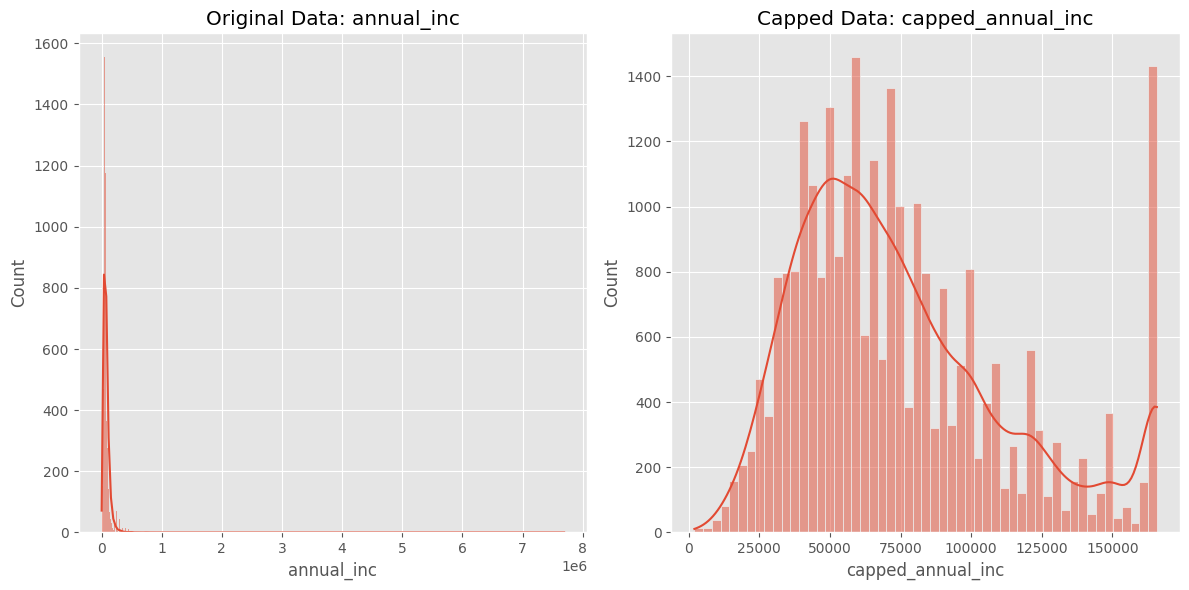

In [183]:
apply_capping_iqr(df_clean, 'annual_inc')

IQR outliers for capped_annual_inc: 0 (0.00%)


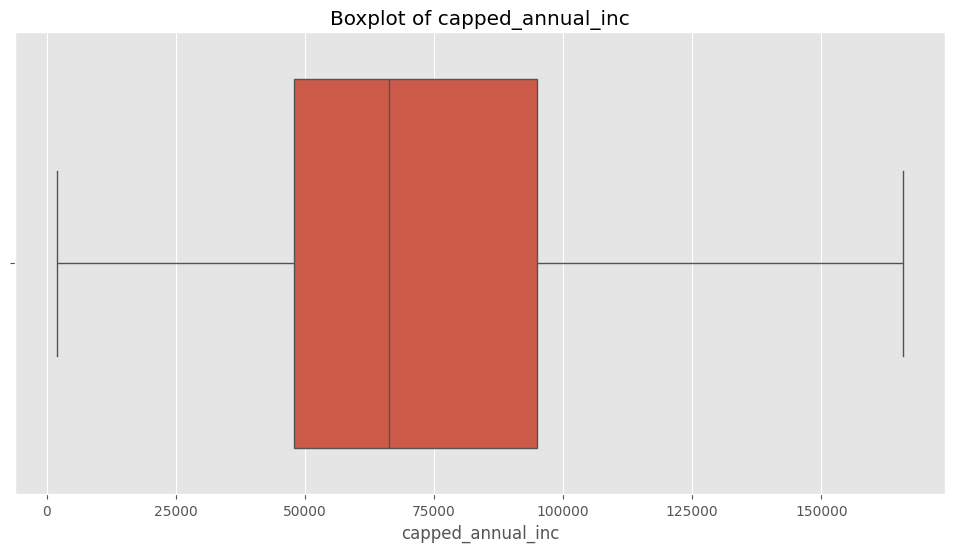

In [184]:
ignore1, ignore2 = apply_iqr_scaling(df_clean.copy(), 'capped_annual_inc')

#### Observing Outliers in annual_inc_joint


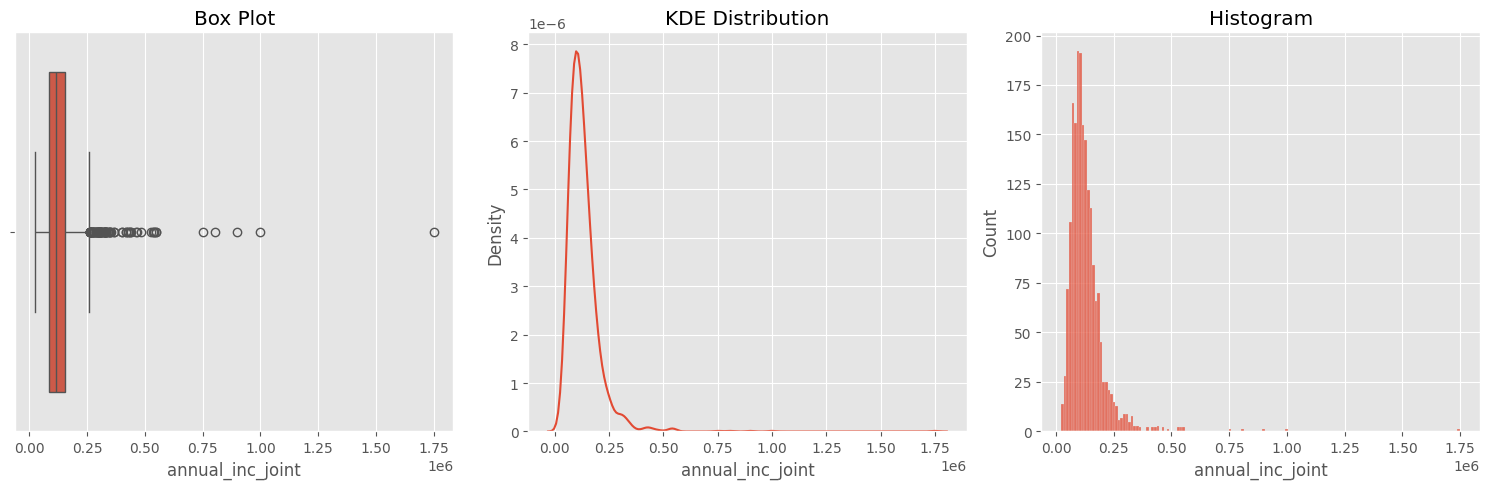

In [270]:
plot_distribution(df_clean[df_clean['annual_inc_joint'] > 0], 'annual_inc_joint')

In [271]:
annual_inc_joint_with_0, annual_inc_joint_without_0 = df_clean['annual_inc_joint'] == 0, df_clean['annual_inc_joint'] > 0 

Z-score outliers for annual_inc_joint: 23 (1.20%)


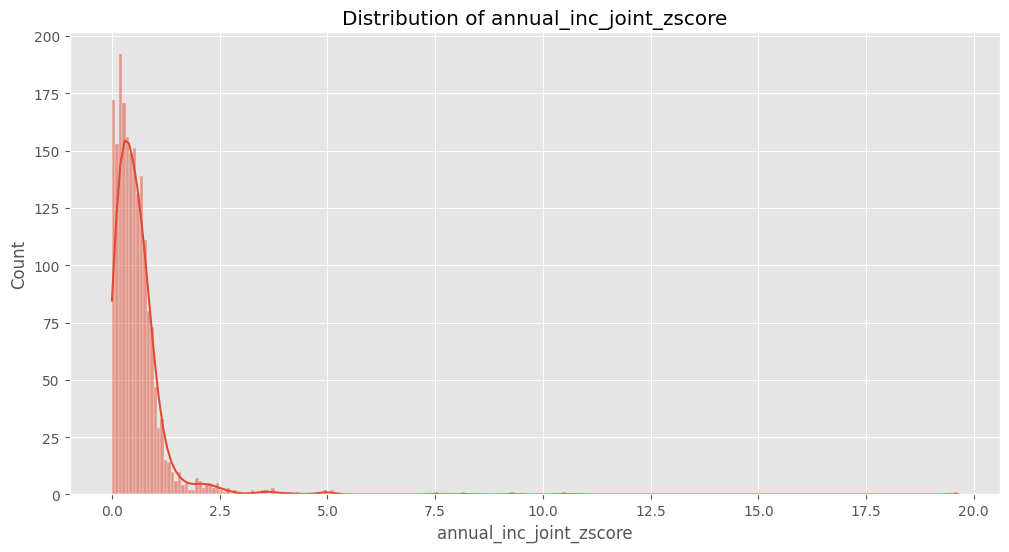

In [272]:
annual_inc_joint_z_mask_1, annual_inc_joint_z_mask_2 = apply_zscore_scaling(df_clean[annual_inc_joint_without_0].copy(), 'annual_inc_joint')

IQR outliers for annual_inc_joint: 87 (4.53%)


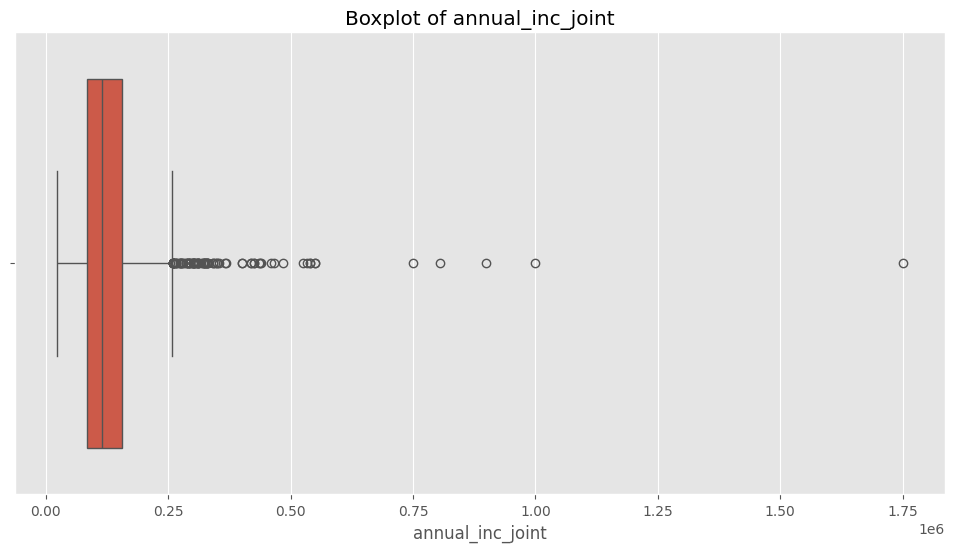

In [273]:
annual_inc_joint_iqr_mask1, annual_inc_joint_iqr_mask2 = apply_iqr_scaling(df_clean[annual_inc_joint_without_0].copy(), 'annual_inc_joint')

#### Using the IQR method to detect outliers in the annual_inc column is more effective than the z-score method as the data is not normally distributed and skewed.

#### Handling outliers in the annual inc joint column

- Apply the log-transformation to handle the outliers

In [274]:
test_df = df_clean.copy()
test_df = test_df[annual_inc_joint_without_0]

Applying log transformation to column 'annual_inc_joint'


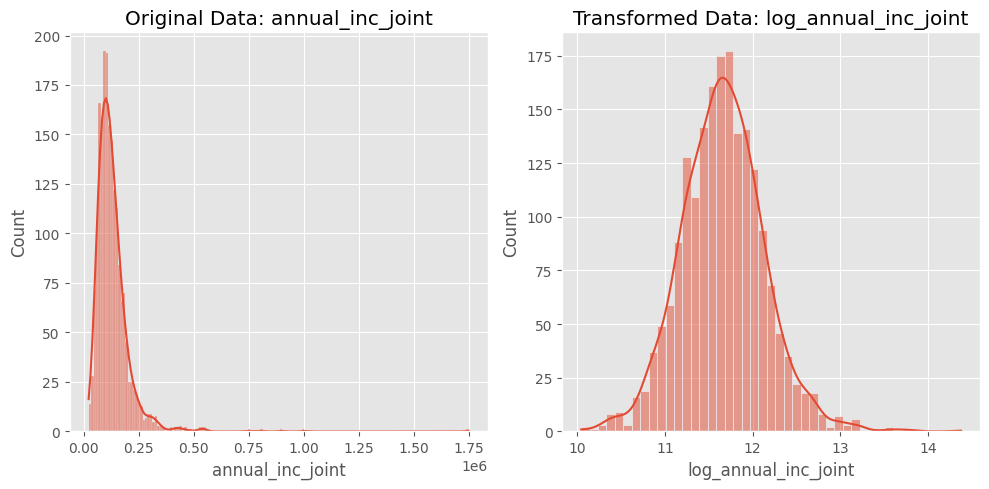

In [275]:
apply_log_transformation(test_df, 'annual_inc_joint')

IQR outliers for log_annual_inc_joint: 37 (1.93%)


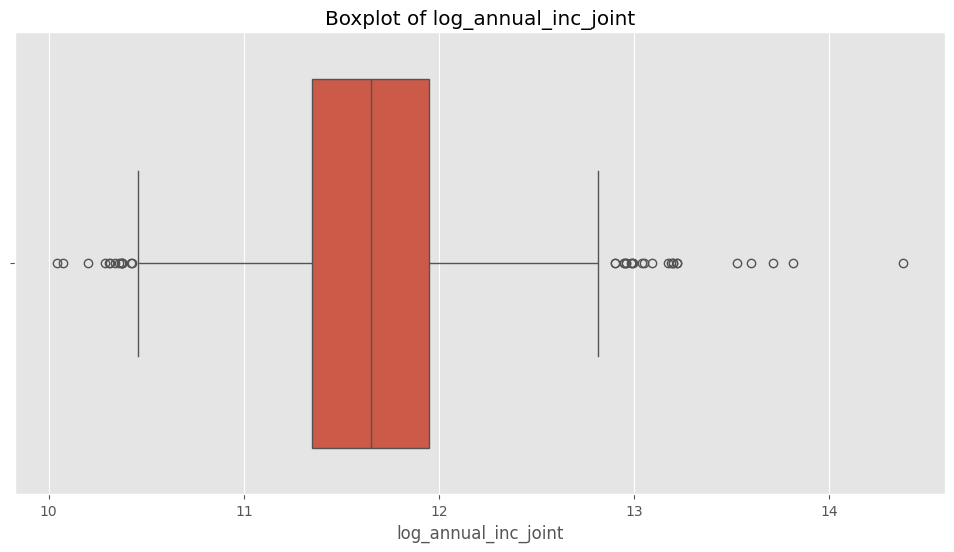

In [276]:
ignore1, ignore2 = apply_iqr_scaling(test_df.copy(), 'log_annual_inc_joint')

- Apply the sqrt transformation

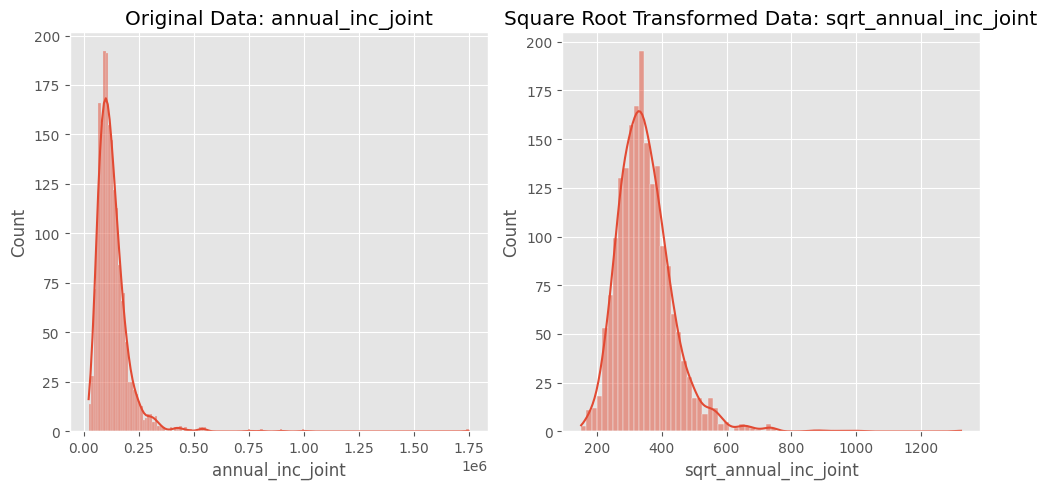

In [277]:
apply_sqrt_transformation(test_df, 'annual_inc_joint')

IQR outliers for sqrt_annual_inc_joint: 58 (3.02%)


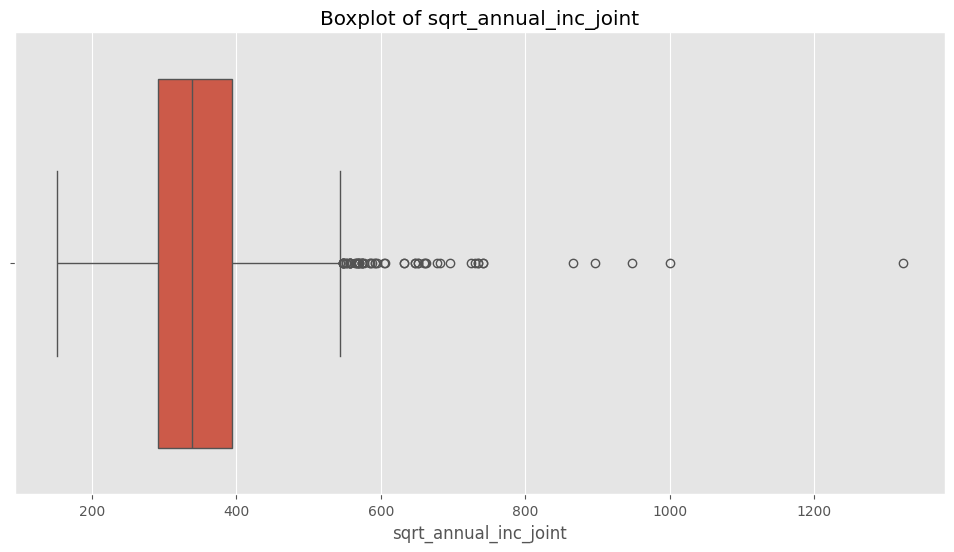

In [278]:
ignore1, ignore2 = apply_iqr_scaling(test_df.copy(), 'sqrt_annual_inc_joint')

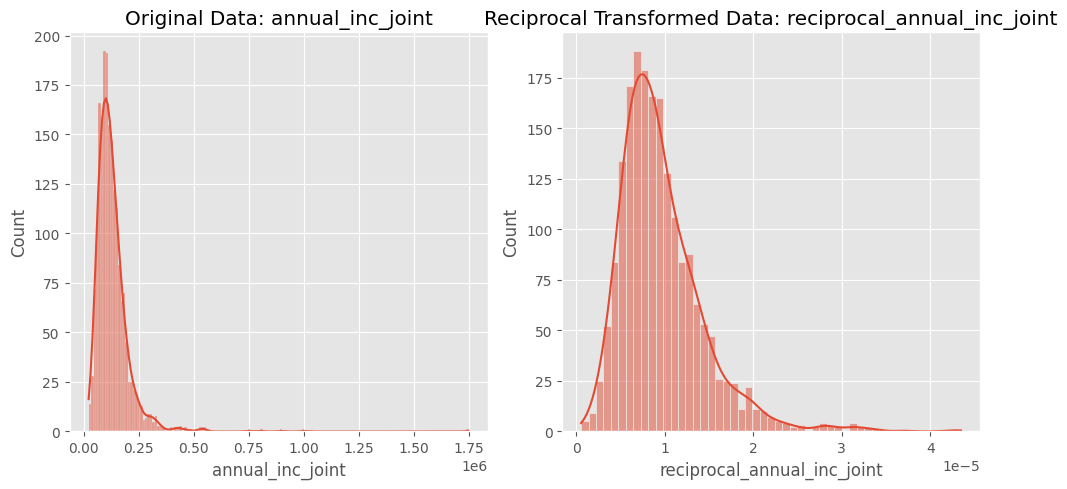

In [279]:
apply_reciprocal_transformation(test_df, 'annual_inc_joint')

IQR outliers for reciprocal_annual_inc_joint: 70 (3.65%)


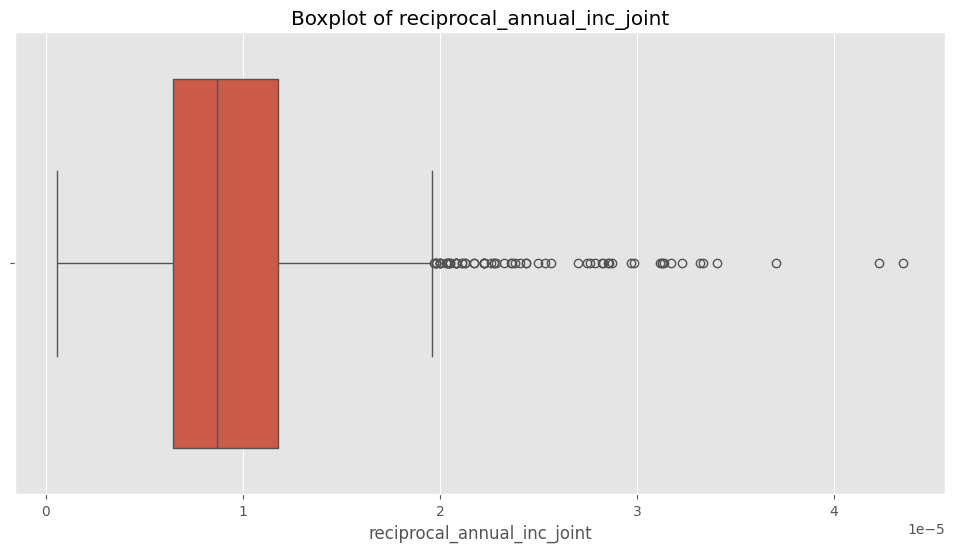

In [280]:
ignore1, ignore2 = apply_iqr_scaling(test_df.copy(), 'reciprocal_annual_inc_joint')

#### Observing Outliers in Average Current Balance


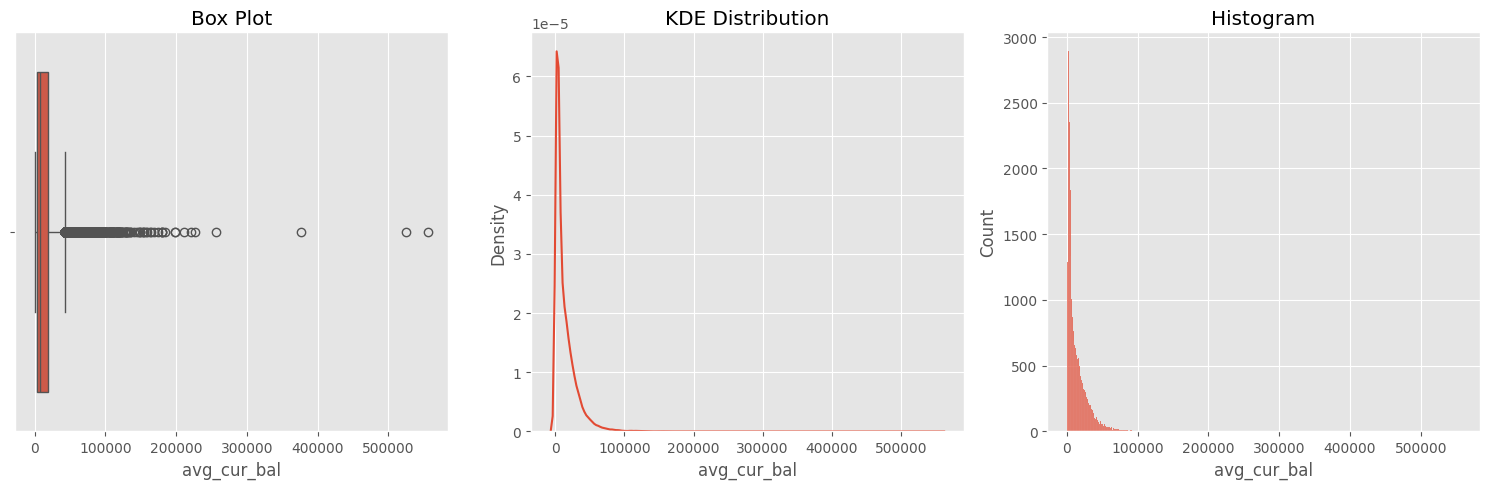

In [222]:
plot_distribution(df_clean, 'avg_cur_bal')

Z-score outliers for avg_cur_bal: 431 (1.59%)


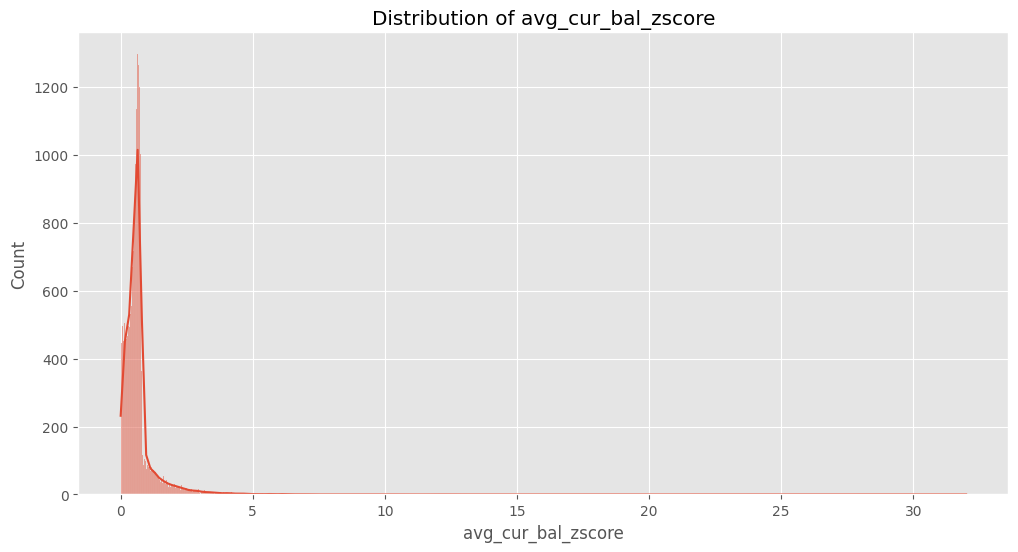

In [223]:
avg_cur_bal_z_mask_1, avg_cur_bal_z_mask_2 = apply_zscore_scaling(df_clean.copy(), 'avg_cur_bal')

IQR outliers for avg_cur_bal: 1461 (5.41%)


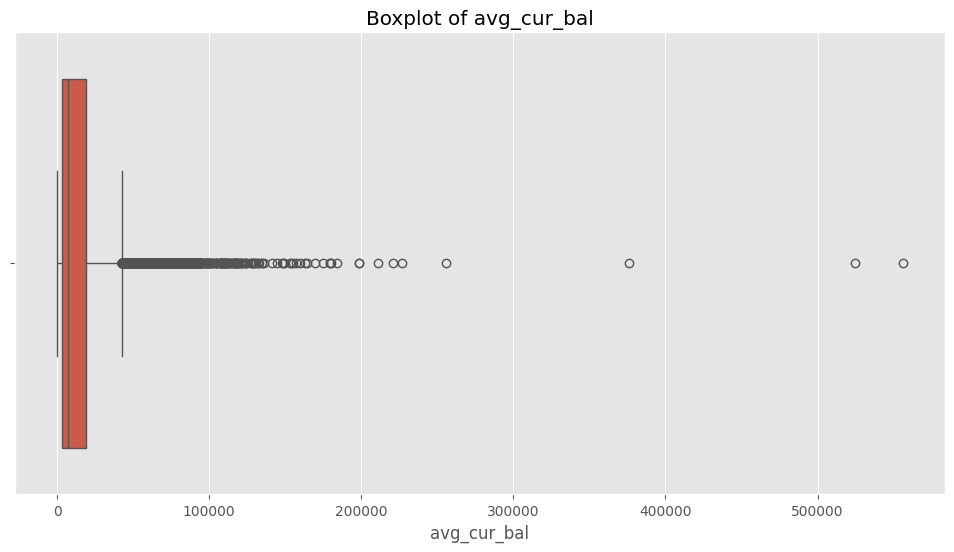

In [224]:
avg_cur_bal_iqr_mask1, avg_cur_bal_iqr_mask2 = apply_iqr_scaling(df_clean.copy(), 'avg_cur_bal')

#### Using the IQR method to detect outliers in the avg_cur_bal column is more effective than the z-score method as the data is not normally distributed and skewed.

#### Handle outliers in the avg_cur_bal column

- Apply log transformation to handle the outliers

Column 'avg_cur_bal' contains non-positive values. Applying log1p transformation (log(1 + x)) to handle zeros.


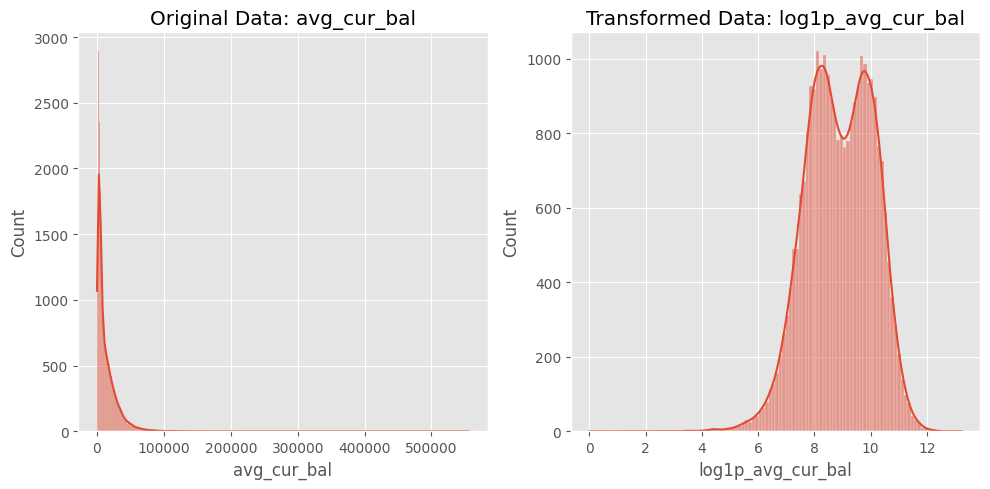

In [225]:
apply_log_transformation(df_clean, 'avg_cur_bal')

IQR outliers for log1p_avg_cur_bal: 90 (0.33%)


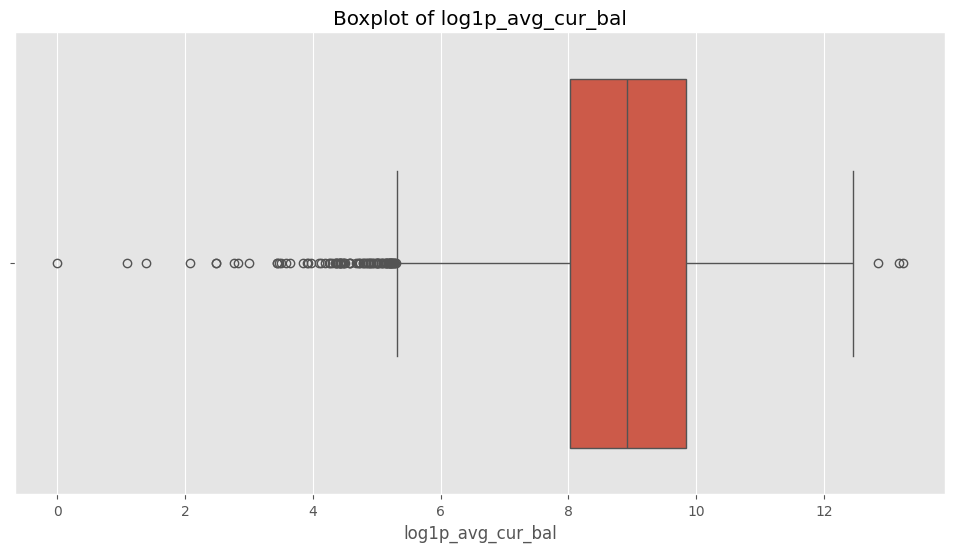

In [227]:
ignore1, ignore2 = apply_iqr_scaling(df_clean.copy(), 'log1p_avg_cur_bal')

#### log transformation have reduced the outliers from 1461 to 90 which is a good sign that the transformation was successful

#### Observing Outliers in Total Current Balance


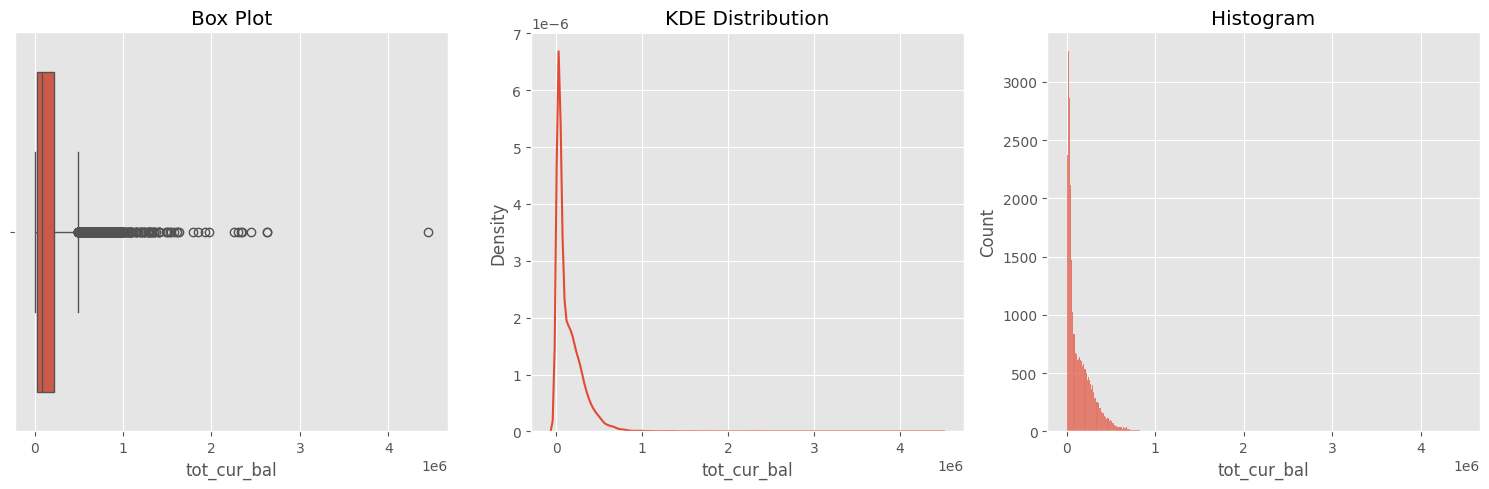

In [236]:
plot_distribution(df_clean, 'tot_cur_bal')

Z-score outliers for tot_cur_bal: 376 (1.39%)


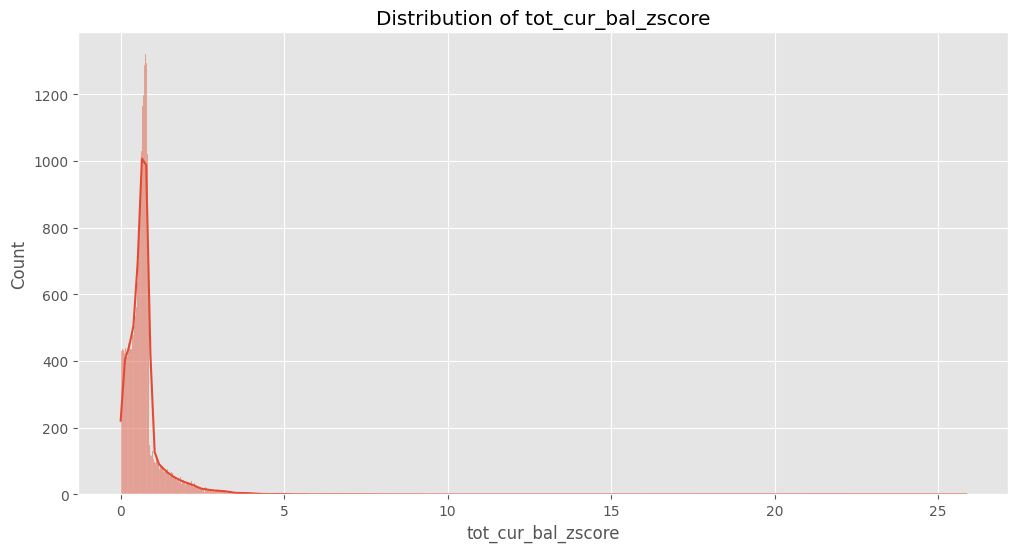

In [237]:
tot_cur_bal_z_mask1, tot_cur_bal_z_mask2 = apply_zscore_scaling(df_clean.copy(), 'tot_cur_bal')

IQR outliers for tot_cur_bal: 991 (3.67%)


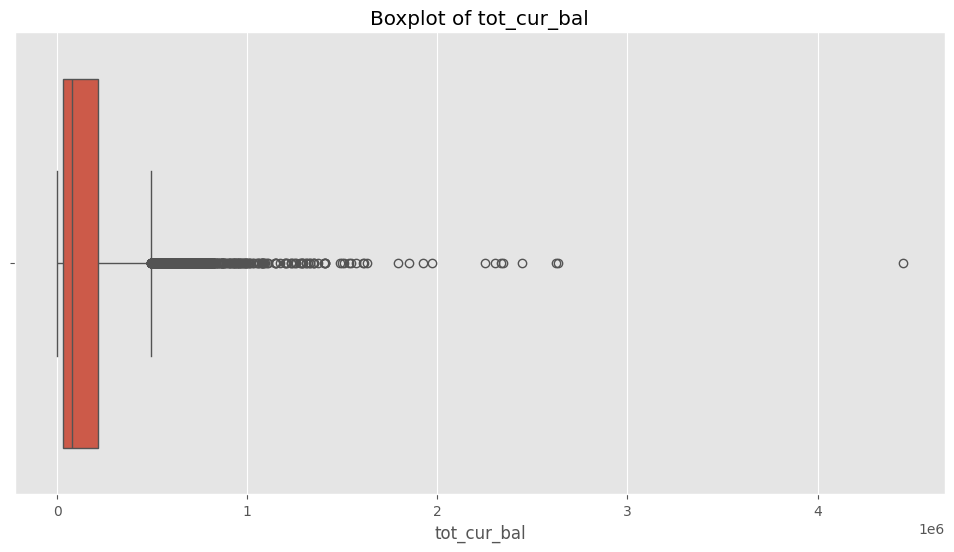

In [238]:
tot_cur_bal_iqr_mask1, tot_cur_bal_iqr_mask2 = apply_iqr_scaling(df_clean.copy(), 'tot_cur_bal')

#### Using the IQR method to detect outliers in the tot_cur_bal column is more effective than the z-score method as the data is not normally distributed and skewed.

#### Handle outliers in the tot_cur_bal column

- Apply log transformation to handle the outliers

Column 'tot_cur_bal' contains non-positive values. Applying log1p transformation (log(1 + x)) to handle zeros.


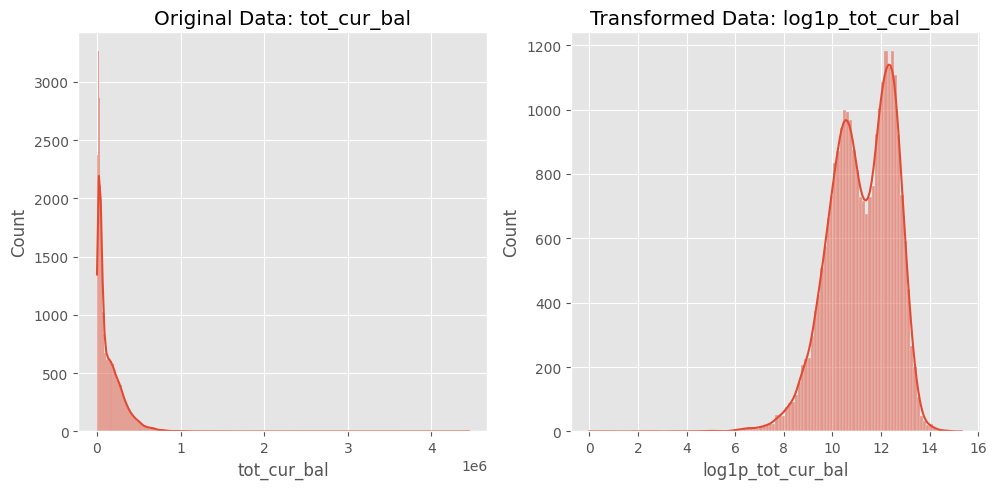

In [239]:
apply_log_transformation(df_clean, 'tot_cur_bal')

IQR outliers for log1p_tot_cur_bal: 132 (0.49%)


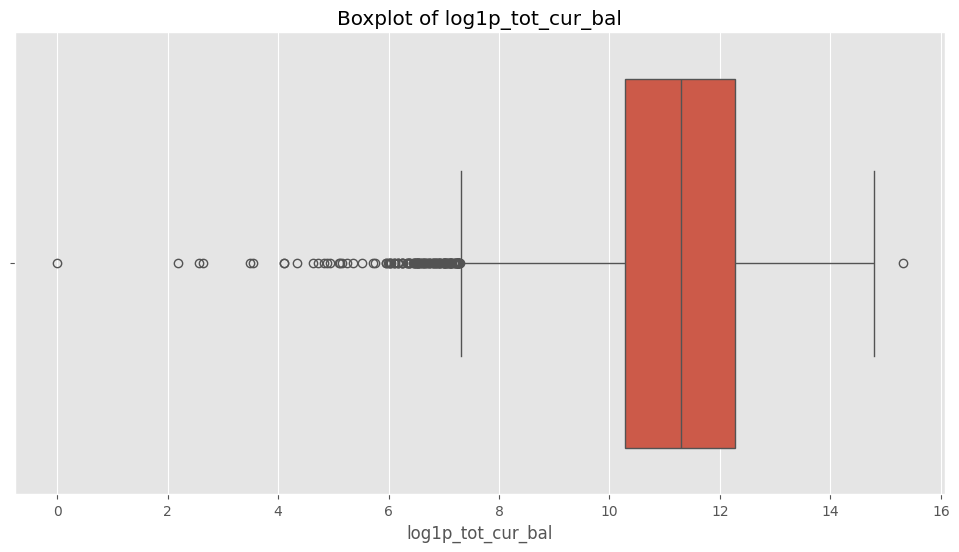

In [241]:
ignore1, ignore2 = apply_iqr_scaling(df_clean.copy(), 'log1p_tot_cur_bal')

#### log transformation have reduced the outliers from 991 to 132 which is a good sign that the transformation was successful

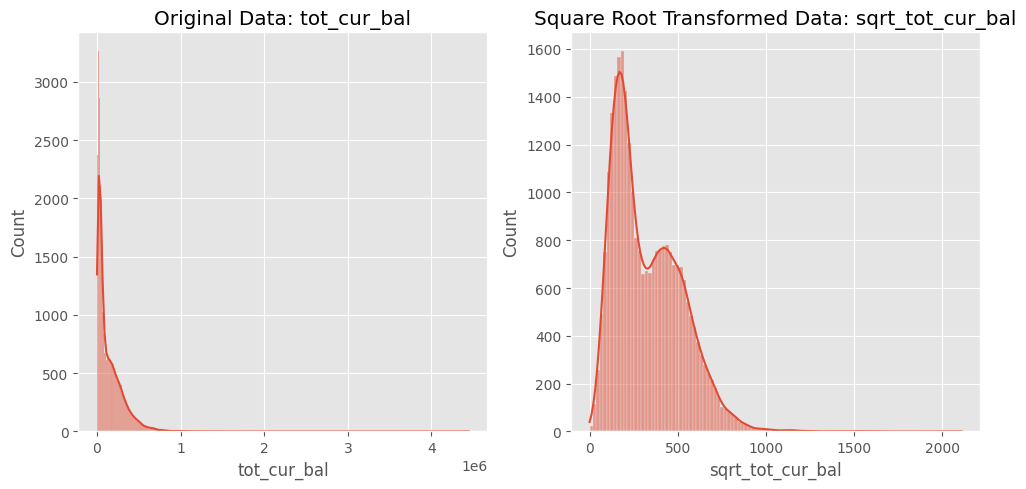

In [268]:
apply_sqrt_transformation(df_clean, 'tot_cur_bal')

#### Observing Outliers in Loan Amount


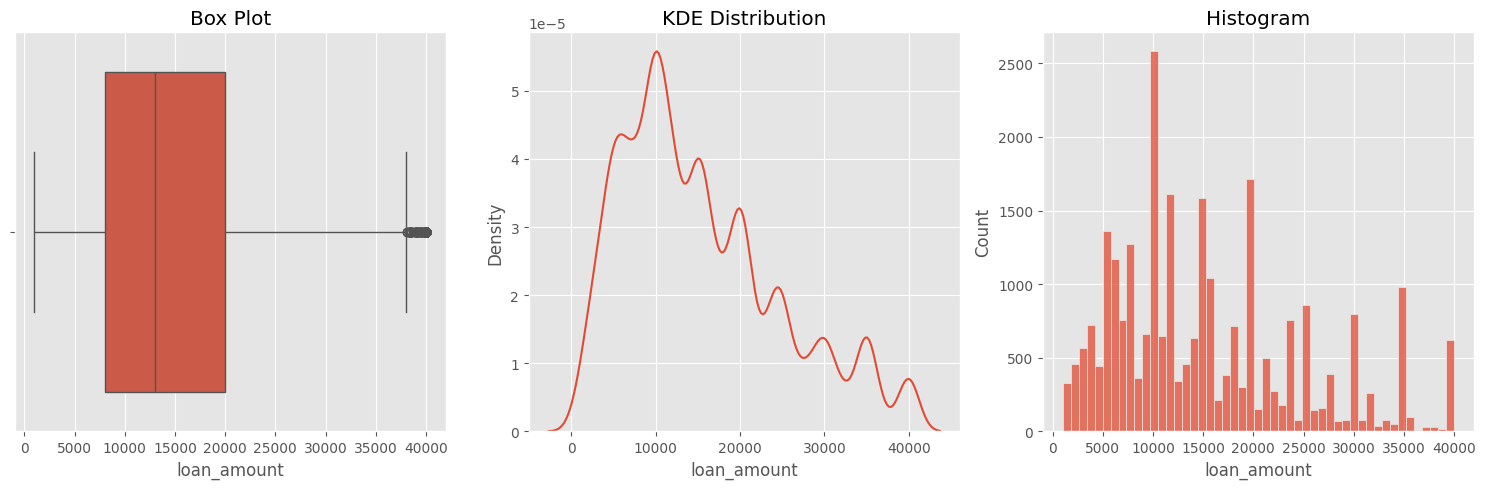

In [242]:
plot_distribution(df_clean, 'loan_amount')

Z-score outliers for loan_amount: 0 (0.00%)


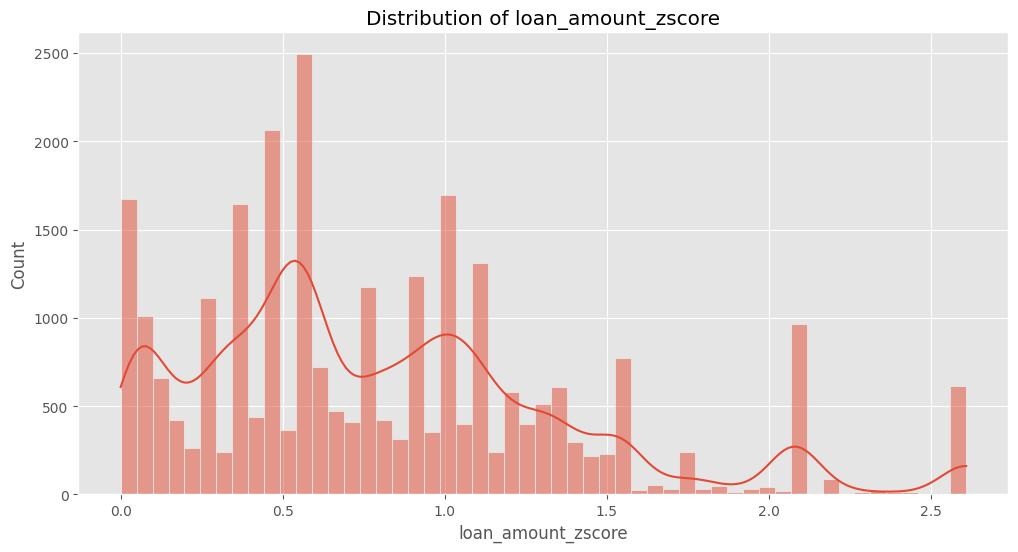

In [243]:
loan_amount_z_mask1, loan_amount_z_mask2 = apply_zscore_scaling(df_clean.copy(), 'loan_amount')

IQR outliers for loan_amount: 646 (2.39%)


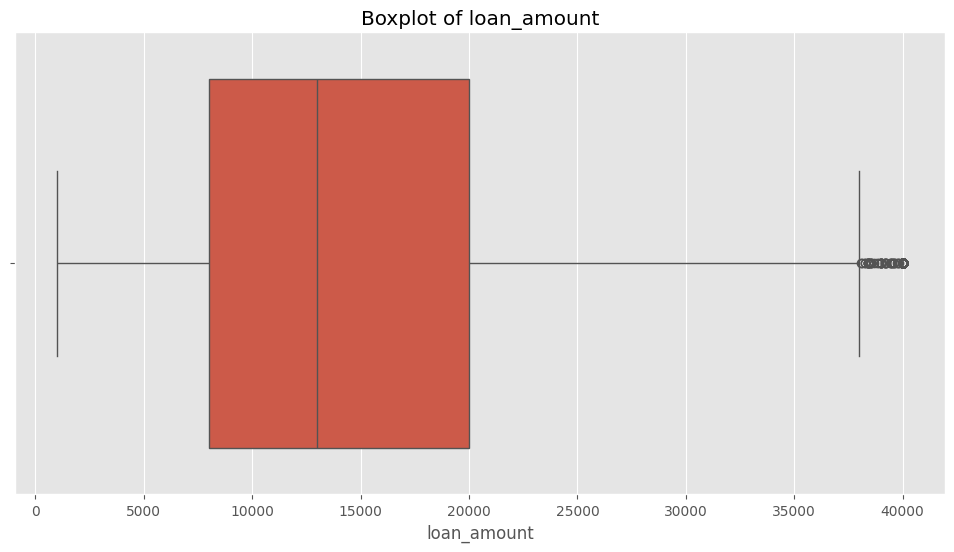

In [244]:
loan_amount_iqr_mask1, loan_amount_iqr_mask2 = apply_iqr_scaling(df_clean.copy(), 'loan_amount')

#### Using the IQR method to detect outliers in the loan_amount column is more effective than the z-score method as the data is not normally distributed and skewed.

#### Handle Outliers in the loan_amount column

- Apply the log transformation and observe the effect

Applying log transformation to column 'loan_amount'


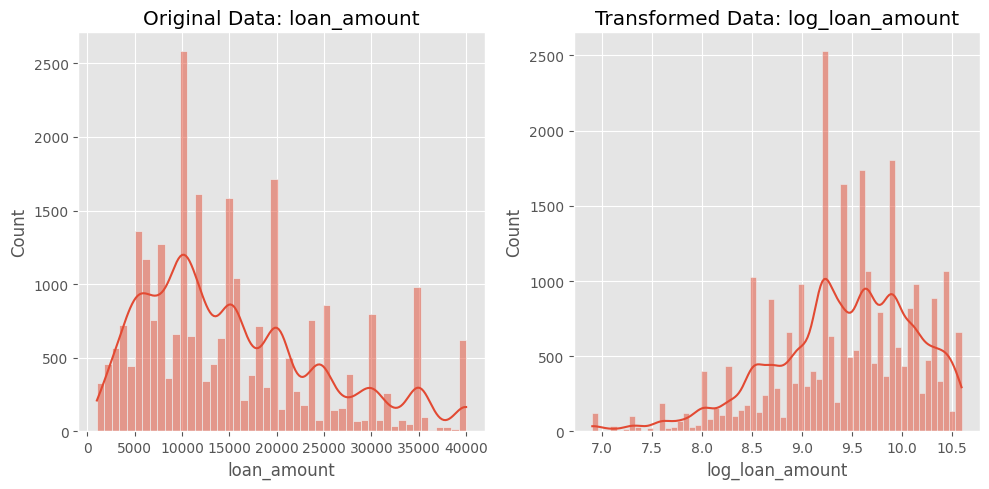

In [245]:
apply_log_transformation(df_clean, 'loan_amount')

IQR outliers for log_loan_amount: 538 (1.99%)


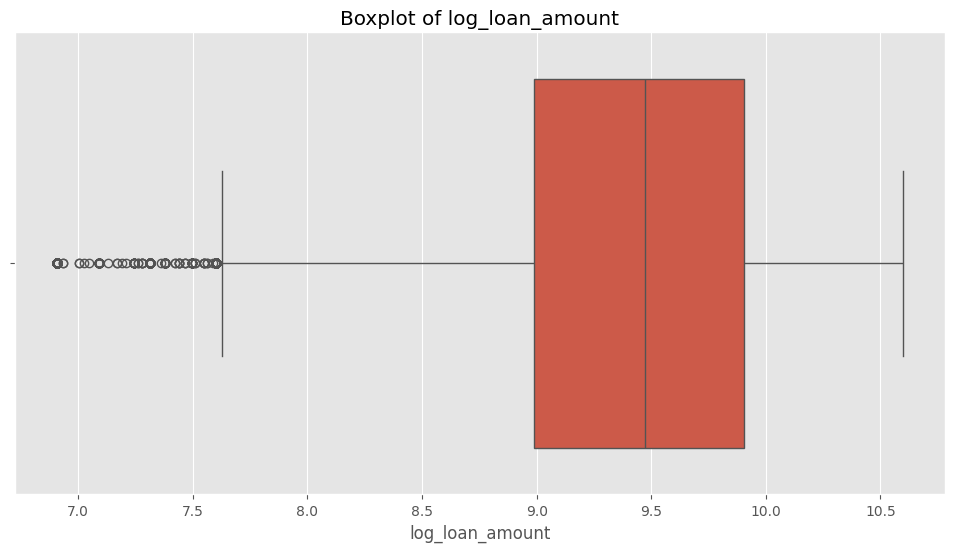

In [246]:
ignore1, ignore2 = apply_iqr_scaling(df_clean.copy(), 'log_loan_amount')

The log transformation didn't handle the outliers effectively

In [247]:
df_clean.drop(columns=['log_loan_amount'], inplace=True)

- Apply the sqrt transformation and observe the effect

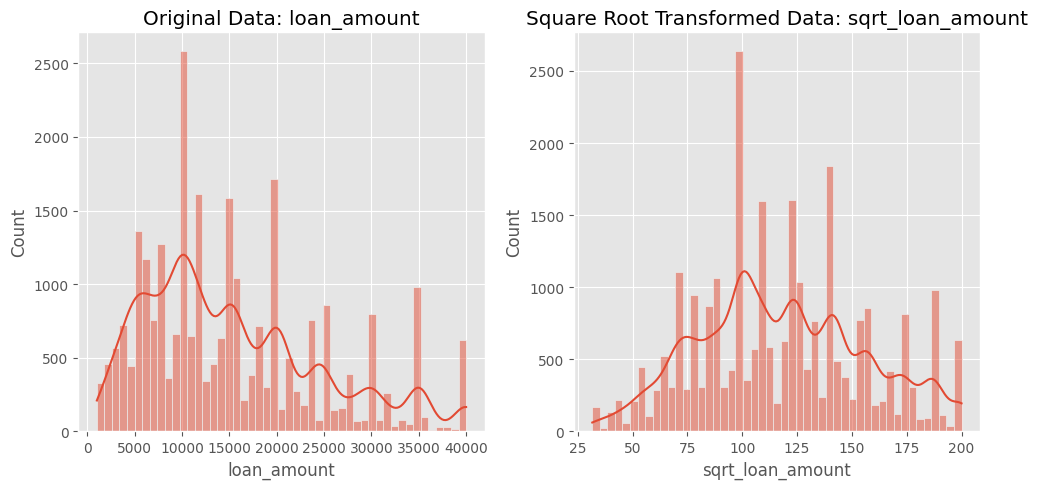

In [249]:
apply_sqrt_transformation(df_clean, 'loan_amount')

IQR outliers for sqrt_loan_amount: 0 (0.00%)


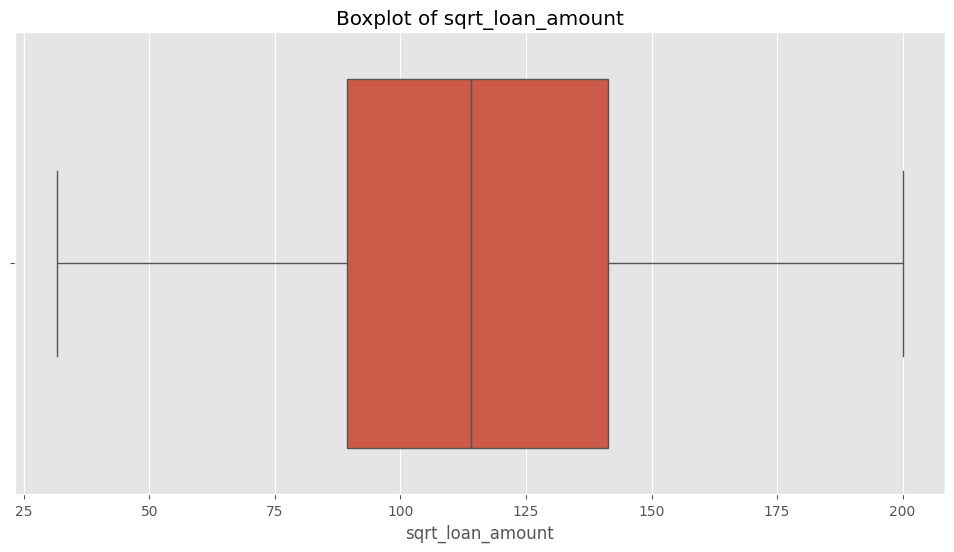

In [250]:
ignore1, ignore2 = apply_iqr_scaling(df_clean.copy(), 'sqrt_loan_amount')

The sqrt transformation have handle the loan amount outliers effectively

#### Observing Outliers in Funded Amount


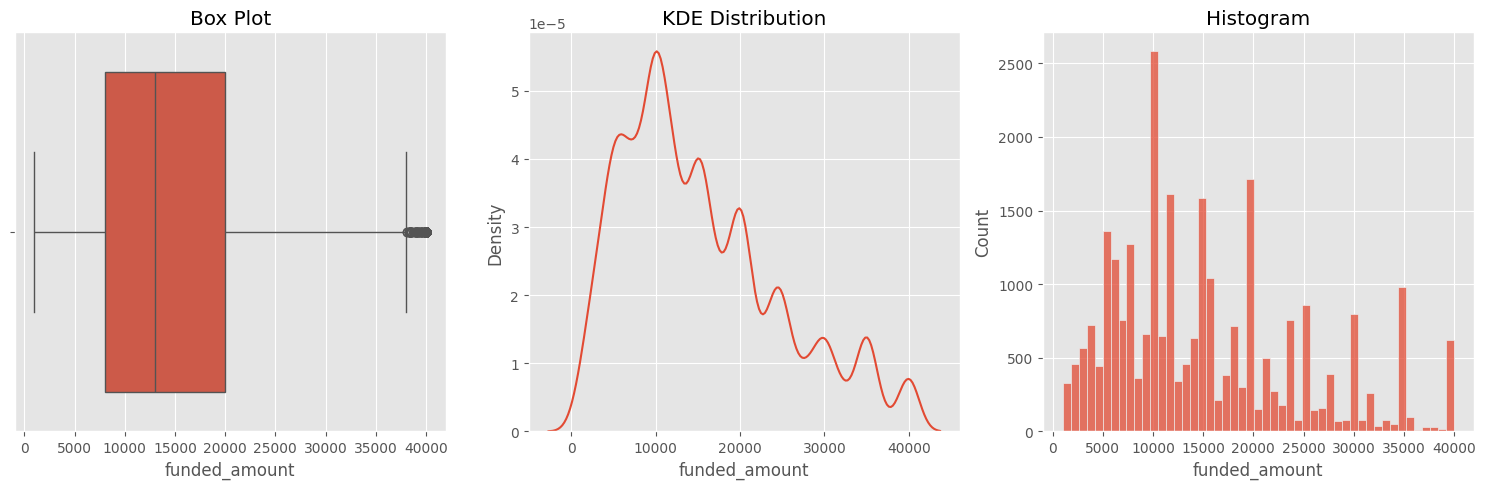

In [252]:
plot_distribution(df_clean, 'funded_amount')

Z-score outliers for funded_amount: 0 (0.00%)


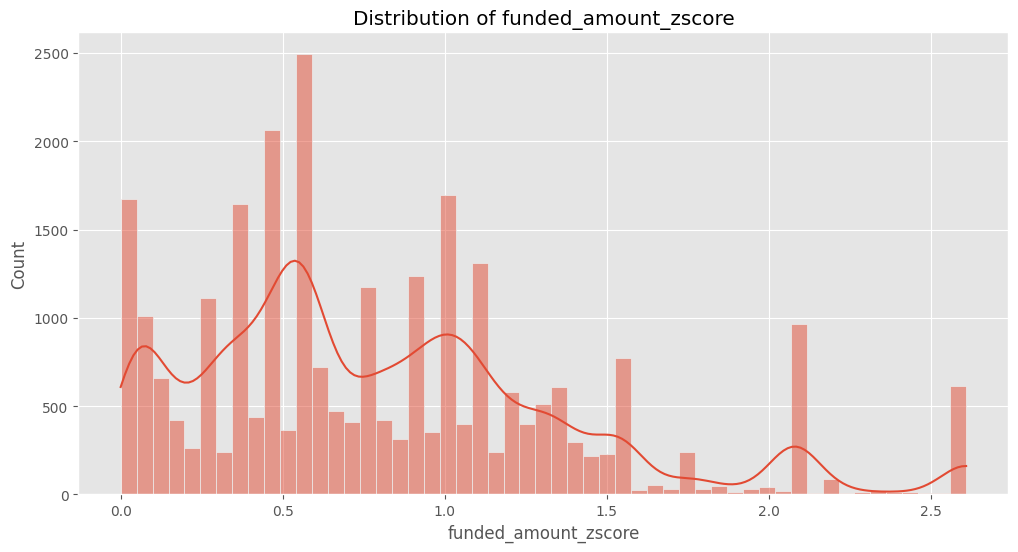

In [253]:
funded_amount_z_mask1, funded_amount_z_mask2 = apply_zscore_scaling(df_clean.copy(), 'funded_amount')

IQR outliers for funded_amount: 646 (2.39%)


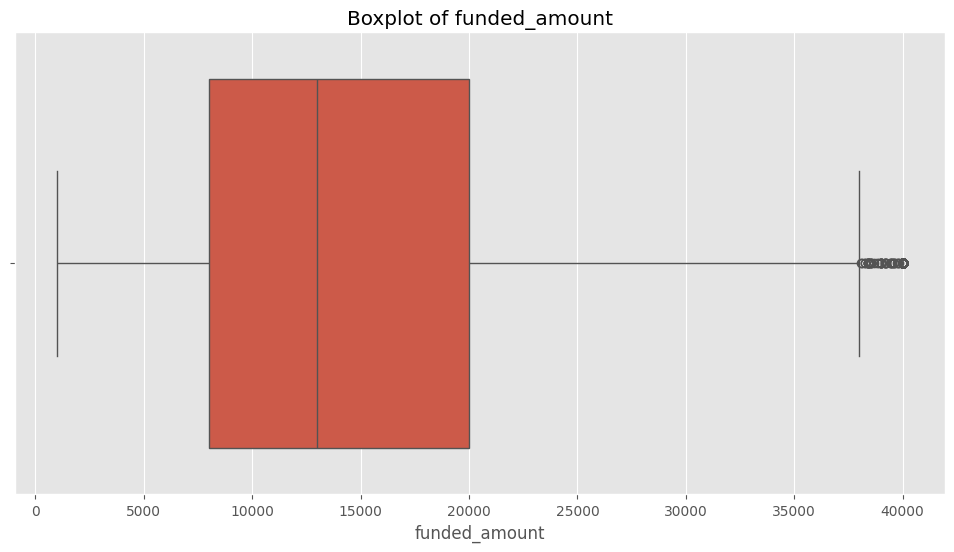

In [254]:
funded_amount_iqr_mask1, funded_amount_iqr_mask2 = apply_iqr_scaling(df_clean.copy(), 'funded_amount')

#### Using the IQR method to detect outliers in the funded_amount column is more effective than the z-score method as the data is not normally distributed and skewed.

#### Handle Outliers in the funded_amount column

- Apply the log transformation and observe the effect

Applying log transformation to column 'funded_amount'


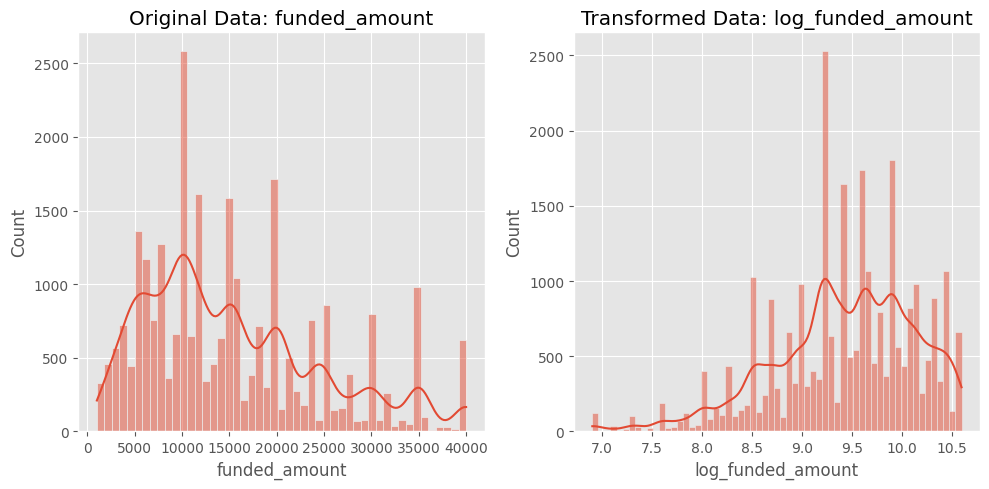

In [255]:
apply_log_transformation(df_clean, 'funded_amount') 

IQR outliers for log_funded_amount: 538 (1.99%)


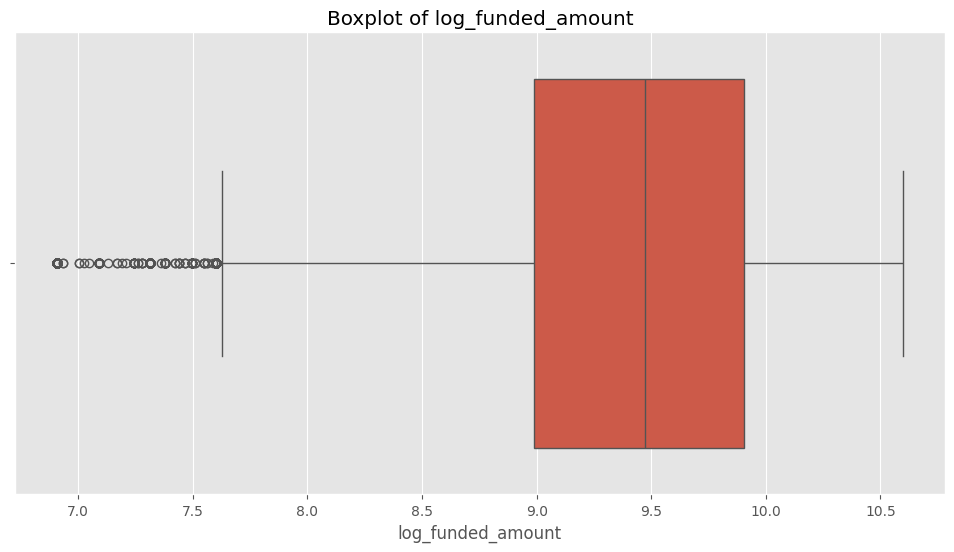

In [256]:
ignore1, ignore2 = apply_iqr_scaling(df_clean.copy(), 'log_funded_amount')

The log transformation didn't handle the outliers effectively

In [257]:
df_clean.drop(columns=['log_funded_amount'], inplace=True)

- Apply the sqrt transformation and observe the effect

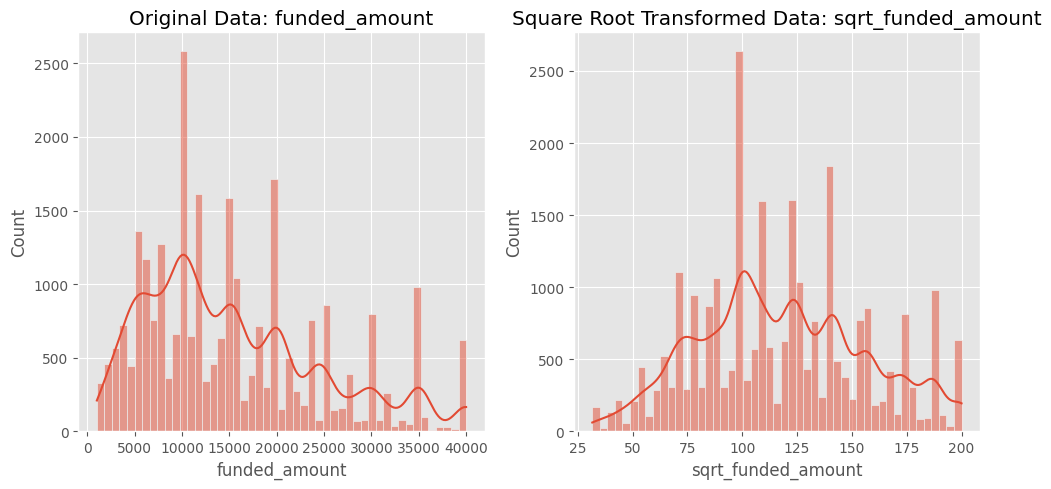

In [259]:
apply_sqrt_transformation(df_clean, 'funded_amount')

IQR outliers for sqrt_funded_amount: 0 (0.00%)


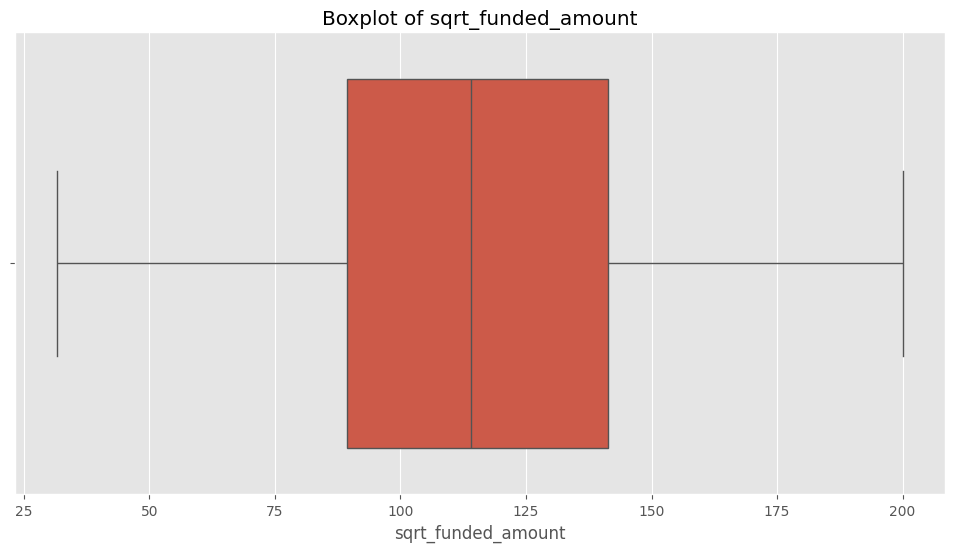

In [263]:
ignore1, ignore2 = apply_iqr_scaling(df_clean.copy(), 'sqrt_funded_amount')

The sqrt transformation have handle the funded amount outliers effectively

#### Observing Outliers in Interest Rate


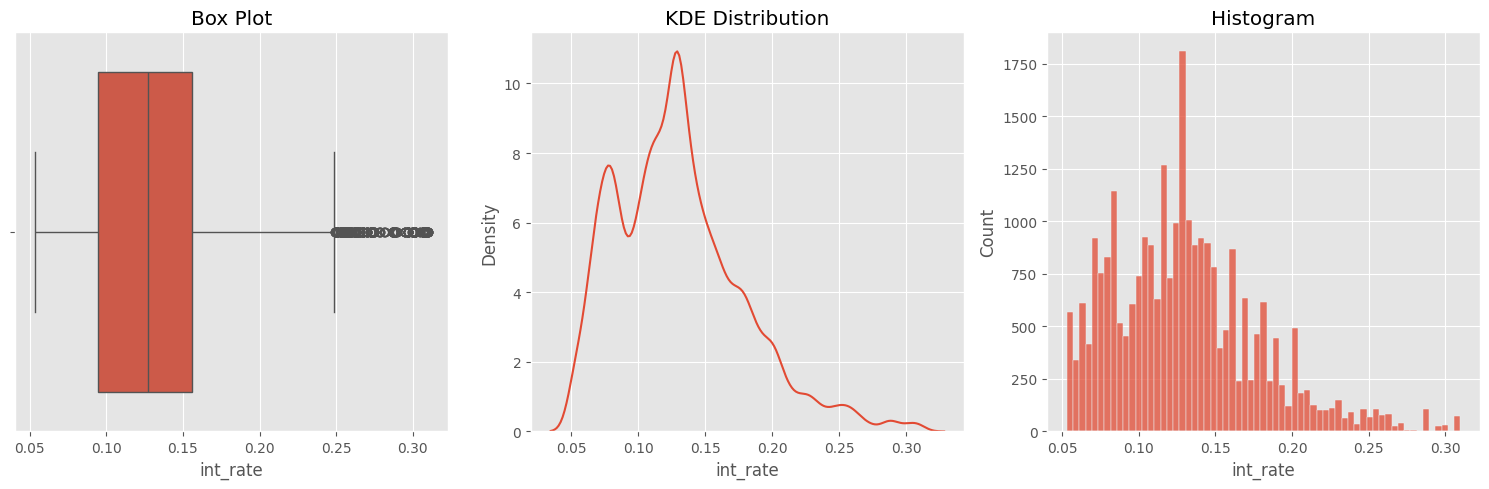

In [261]:
plot_distribution(df_clean, 'int_rate')

Z-score outliers for int_rate: 259 (0.96%)


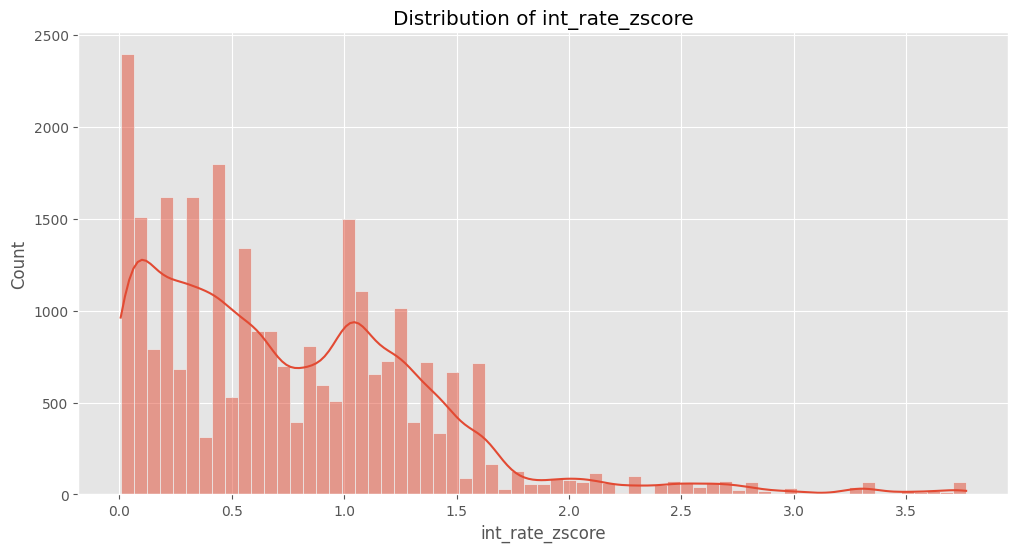

In [264]:
int_rate_z_mask1, int_rate_z_mask2 = apply_zscore_scaling(df_clean.copy(), 'int_rate')

IQR outliers for int_rate: 658 (2.43%)


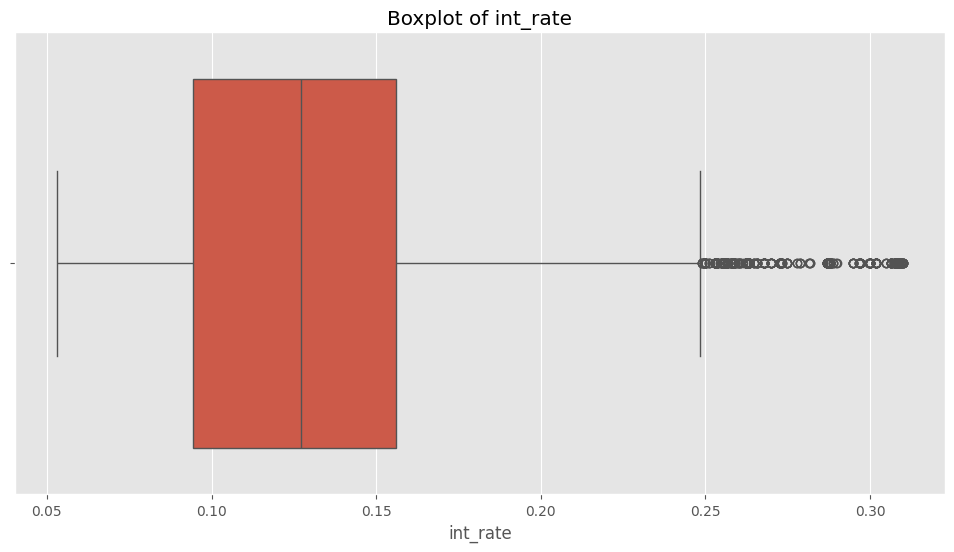

In [265]:
int_rate_iqr_mask1, int_rate_iqr_mask2 = apply_iqr_scaling(df_clean.copy(), 'int_rate')

#### Using the IQR method to detect outliers in the int_rate column is more effective than the z-score method as the data is not normally distributed and skewed.

#### Handle Outliers in the int_rate column

- Apply the log transformation and observe the effect

Applying log transformation to column 'int_rate'


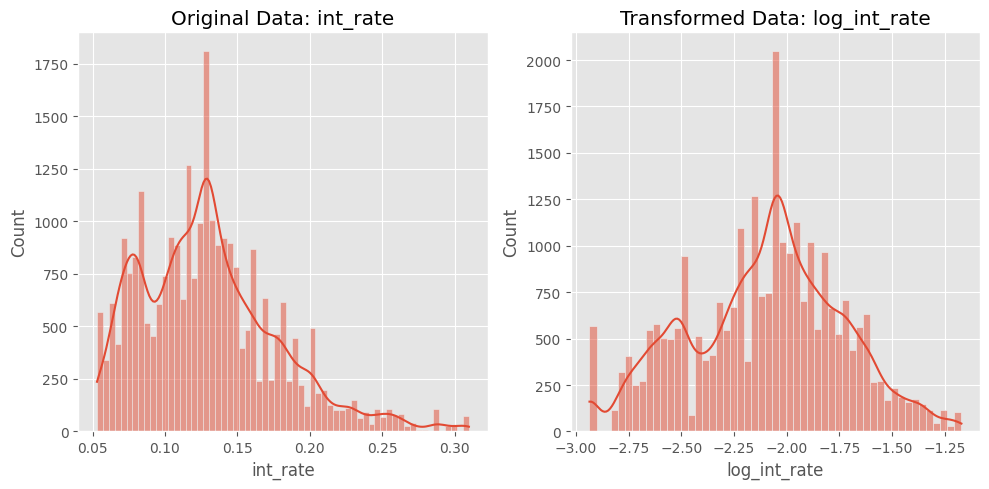

In [266]:
apply_log_transformation(df_clean, 'int_rate')

IQR outliers for log_int_rate: 0 (0.00%)


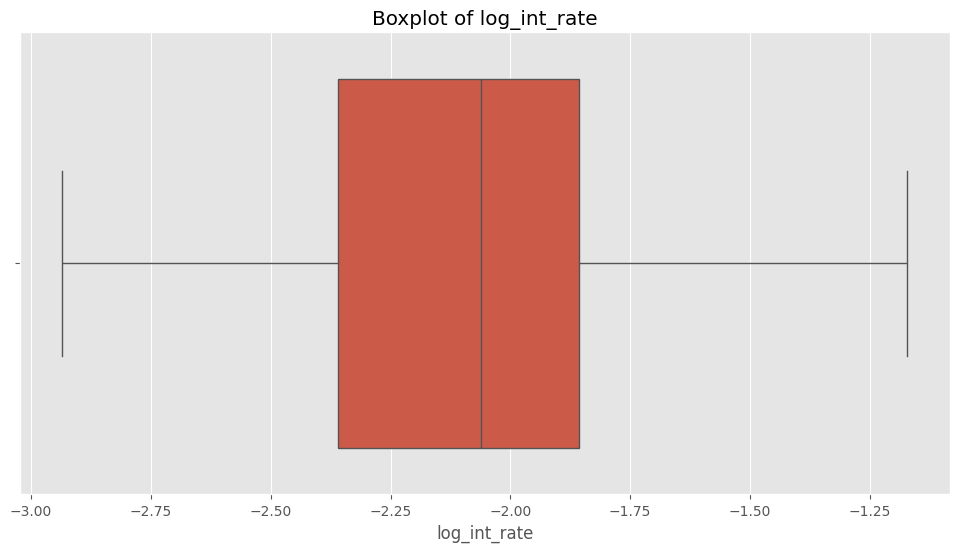

In [267]:
ignore1, ignore2 = apply_iqr_scaling(df_clean.copy(), 'log_int_rate')

- The log transformation have handled the outliers effectively

## Findings and conclusions


# 4 - Data transformation and feature eng.


## 4.1 - Adding Columns


#### Let's first start by adding the month number column

- Name: month_number
- Type: Integer
- Description: The month number of the issue date


In [281]:
def add_month_number(df: pd.DataFrame, date_column: str, new_column_name: str = 'month_number'):
    """
    Adds a month number column to the DataFrame based on the specified date column.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the date column.
    date_column (str): The name of the column with date values to convert to datetime and extract month numbers from.
    new_column_name (str): The name for the new column to store month numbers. Default is 'month_number'.

    Returns:
    pd.DataFrame: The updated DataFrame with a new column containing the month number (1-12).
    """
    
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    
    # Extract the month number and create the new column
    df[new_column_name] = df[date_column].dt.month
    
    return df

In [282]:
df_clean = add_month_number(df_clean, 'issue_date')

In [283]:
df_clean.head()

customer_id               emp_title  \
0  YidceGZkXHgxZmtceGY1XHhiOFx4MDN3XHg4MnxceGUxXH...              Lieutenant   
1  YidUXHhhZlx4YTVcdFx4ZmYhRWpbXHhmMDRceDE4WE03XH...  Senior Film Management   
2  YidceGY5KUBceGVkXHhiOW9ceGI2ZVx4ZmVceGYze1x4YW...             Machinist 2   
3  Yid3XHgwMVxyQVx4MTQxXHg5OFx4YjVceGMxPVx4OGZceD...        Customer Service   
4  YidceGFhXHgxMn5cblx4OGJceDkwXHhjN1x4YjRMR1x4Yz...                  Drivet   

  emp_length home_ownership  annual_inc  annual_inc_joint verification_status  \
0  10+ years       Mortgage    200000.0               0.0     Source Verified   
1  10+ years       Mortgage     63000.0               0.0            Verified   
2     1 year            Own     30000.0               0.0            Verified   
3  10+ years           Rent     20000.0               0.0            Verified   
4    2 years           Rent     48000.0               0.0     Source Verified   

  zip_code addr_state  avg_cur_bal  tot_cur_bal  loan_id  loan_status  \
0    117xx         NY      19404.0     329872.0   197838      Current   
1    441xx         OH       1946.0      38927.0   124597      Current   
2    972xx         OR      22762.0     136571.0   107933  Charged Off   
3    486xx         MI       1610.0       9662.0    63136  Charged Off   
4    334xx         FL       5341.0      48069.0    20511      Current   

   loan_amount state  funded_amount        term  int_rate  grade issue_date  \
0      20000.0    NY        20000.0   60 months    0.1240      6 2019-08-19   
1      12000.0    OH        12000.0   60 months    0.0993      7 2017-11-17   
2      10750.0    OR        10750.0   36 months    0.1952     23 2015-03-15   
3       8000.0    MI         8000.0   36 months    0.0789      2 2015-03-15   
4       4200.0    FL         4200.0   36 months    0.0993      8 2017-12-17   

   pymnt_plan        type             purpose              description  \
0       False  Individual  debt_consolidation       Debt Consolidation   
1       False  Individual         credit_card  Credit Card Refinancing   
2       False  Individual  debt_consolidation       Debt Consolidation   
3       False  Individual         credit_card  Credit Card Refinancing   
4       False  Individual  debt_consolidation       Debt Consolidation   

   capped_annual_inc  log1p_avg_cur_bal  log1p_tot_cur_bal  sqrt_loan_amount  \
0           165740.0           9.873286          12.706463        141.421356   
1            63000.0           7.574045          10.569469        109.544512   
2            30000.0          10.032892          11.824607        103.682207   
3            20000.0           7.384610           9.176059         89.442719   
4            48000.0           8.583355          10.780414         64.807407   

   sqrt_funded_amount  log_int_rate  sqrt_tot_cur_bal  month_number  
0          141.421356     -2.087474        574.344844             8  
1          109.544512     -2.309610        197.299265            11  
2          103.682207     -1.633731        369.555138             3  
3           89.442719     -2.539574         98.295473             3  
4           64.807407     -2.309610        219.246437            12

In [284]:
df_clean.columns

Index(['customer_id', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'annual_inc_joint', 'verification_status', 'zip_code',
       'addr_state', 'avg_cur_bal', 'tot_cur_bal', 'loan_id', 'loan_status',
       'loan_amount', 'state', 'funded_amount', 'term', 'int_rate', 'grade',
       'issue_date', 'pymnt_plan', 'type', 'purpose', 'description',
       'capped_annual_inc', 'log1p_avg_cur_bal', 'log1p_tot_cur_bal',
       'sqrt_loan_amount', 'sqrt_funded_amount', 'log_int_rate',
       'sqrt_tot_cur_bal', 'month_number'],
      dtype='object')

In [285]:
df_clean['month_number'].value_counts()

10    2757
7     2531
11    2410
8     2313
12    2283
3     2229
5     2195
4     2189
6     2143
9     2110
1     2024
2     1846
Name: month_number, dtype: int64

In [286]:
df_clean['month_number'].unique()

array([ 8, 11,  3, 12,  5,  2,  7, 10,  4,  1,  6,  9], dtype=int64)

#### Now we will add the salary can cover column

- Name: salary_can_cover
- Type: Boolean
- Description: A boolean column indicating whether the annual income can cover the loan amount


In [287]:
def create_salary_can_cover_column(df: pd.DataFrame, income_column: str, loan_column: str):
    """
    Adds a 'salary_can_cover' column to the DataFrame.
    
    This column contains a boolean value (True = 1, False = 0) that indicates
    if the annual income can cover the loan amount.

    Parameters:
    df (pd.DataFrame): The DataFrame to modify.
    income_column (str): The name of the column representing annual income.
    loan_column (str): The name of the column representing loan amount.

    Returns:
    pd.DataFrame: The modified DataFrame with a new 'Salary Can Cover' column.
    """
    df['salary_can_cover'] = (df[income_column] >= df[loan_column]).astype(bool)
    return df

In [288]:
df_clean = create_salary_can_cover_column(df_clean, 'annual_inc', 'loan_amount')

In [289]:
df_clean.head()

customer_id               emp_title  \
0  YidceGZkXHgxZmtceGY1XHhiOFx4MDN3XHg4MnxceGUxXH...              Lieutenant   
1  YidUXHhhZlx4YTVcdFx4ZmYhRWpbXHhmMDRceDE4WE03XH...  Senior Film Management   
2  YidceGY5KUBceGVkXHhiOW9ceGI2ZVx4ZmVceGYze1x4YW...             Machinist 2   
3  Yid3XHgwMVxyQVx4MTQxXHg5OFx4YjVceGMxPVx4OGZceD...        Customer Service   
4  YidceGFhXHgxMn5cblx4OGJceDkwXHhjN1x4YjRMR1x4Yz...                  Drivet   

  emp_length home_ownership  annual_inc  annual_inc_joint verification_status  \
0  10+ years       Mortgage    200000.0               0.0     Source Verified   
1  10+ years       Mortgage     63000.0               0.0            Verified   
2     1 year            Own     30000.0               0.0            Verified   
3  10+ years           Rent     20000.0               0.0            Verified   
4    2 years           Rent     48000.0               0.0     Source Verified   

  zip_code addr_state  avg_cur_bal  tot_cur_bal  loan_id  loan_status  \
0    117xx         NY      19404.0     329872.0   197838      Current   
1    441xx         OH       1946.0      38927.0   124597      Current   
2    972xx         OR      22762.0     136571.0   107933  Charged Off   
3    486xx         MI       1610.0       9662.0    63136  Charged Off   
4    334xx         FL       5341.0      48069.0    20511      Current   

   loan_amount state  funded_amount        term  int_rate  grade issue_date  \
0      20000.0    NY        20000.0   60 months    0.1240      6 2019-08-19   
1      12000.0    OH        12000.0   60 months    0.0993      7 2017-11-17   
2      10750.0    OR        10750.0   36 months    0.1952     23 2015-03-15   
3       8000.0    MI         8000.0   36 months    0.0789      2 2015-03-15   
4       4200.0    FL         4200.0   36 months    0.0993      8 2017-12-17   

   pymnt_plan        type             purpose              description  \
0       False  Individual  debt_consolidation       Debt Consolidation   
1       False  Individual         credit_card  Credit Card Refinancing   
2       False  Individual  debt_consolidation       Debt Consolidation   
3       False  Individual         credit_card  Credit Card Refinancing   
4       False  Individual  debt_consolidation       Debt Consolidation   

   capped_annual_inc  log1p_avg_cur_bal  log1p_tot_cur_bal  sqrt_loan_amount  \
0           165740.0           9.873286          12.706463        141.421356   
1            63000.0           7.574045          10.569469        109.544512   
2            30000.0          10.032892          11.824607        103.682207   
3            20000.0           7.384610           9.176059         89.442719   
4            48000.0           8.583355          10.780414         64.807407   

   sqrt_funded_amount  log_int_rate  sqrt_tot_cur_bal  month_number  \
0          141.421356     -2.087474        574.344844             8   
1          109.544512     -2.309610        197.299265            11   
2          103.682207     -1.633731        369.555138             3   
3           89.442719     -2.539574         98.295473             3   
4           64.807407     -2.309610        219.246437            12   

   salary_can_cover  
0              True  
1              True  
2              True  
3              True  
4              True

In [290]:
df_clean.columns

Index(['customer_id', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'annual_inc_joint', 'verification_status', 'zip_code',
       'addr_state', 'avg_cur_bal', 'tot_cur_bal', 'loan_id', 'loan_status',
       'loan_amount', 'state', 'funded_amount', 'term', 'int_rate', 'grade',
       'issue_date', 'pymnt_plan', 'type', 'purpose', 'description',
       'capped_annual_inc', 'log1p_avg_cur_bal', 'log1p_tot_cur_bal',
       'sqrt_loan_amount', 'sqrt_funded_amount', 'log_int_rate',
       'sqrt_tot_cur_bal', 'month_number', 'salary_can_cover'],
      dtype='object')

In [291]:
summarize_column_values(df_clean, ['salary_can_cover'])

[{'Column': 'salary_can_cover',
  'Total Values': 27030,
  'Unique Values': 2,
  'Value Counts': {True: 26901, False: 129}}]

In [292]:
def one_encode_grade(df: pd.DataFrame, column: str):
    """
    Encodes the numeric grade column into letter grades (A-G) based on specified ranges.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the grade column.
    column (str): The name of the column to encode.
    
    Returns:
    pd.DataFrame: The modified DataFrame with an added 'letter_grade' column.
    """
    # Define grade ranges
    grade_mapping = {
        'A': range(1, 6),
        'B': range(6, 11),
        'C': range(11, 16),
        'D': range(16, 21),
        'E': range(21, 26),
        'F': range(26, 31),
        'G': range(31, 36)
    }
    
    # Function to map numeric grade to letter grade
    def map_to_letter(grade):
        for letter, grade_range in grade_mapping.items():
            if grade in grade_range:
                return letter
        return None  # Handle cases where the grade does not fall in any range

    # Apply the mapping function to create the 'letter_grade' column
    df['letter_grade'] = df[column].apply(map_to_letter)

    return df

In [293]:
df_clean = one_encode_grade(df_clean, 'grade')

In [294]:
df_clean.head()

customer_id               emp_title  \
0  YidceGZkXHgxZmtceGY1XHhiOFx4MDN3XHg4MnxceGUxXH...              Lieutenant   
1  YidUXHhhZlx4YTVcdFx4ZmYhRWpbXHhmMDRceDE4WE03XH...  Senior Film Management   
2  YidceGY5KUBceGVkXHhiOW9ceGI2ZVx4ZmVceGYze1x4YW...             Machinist 2   
3  Yid3XHgwMVxyQVx4MTQxXHg5OFx4YjVceGMxPVx4OGZceD...        Customer Service   
4  YidceGFhXHgxMn5cblx4OGJceDkwXHhjN1x4YjRMR1x4Yz...                  Drivet   

  emp_length home_ownership  annual_inc  annual_inc_joint verification_status  \
0  10+ years       Mortgage    200000.0               0.0     Source Verified   
1  10+ years       Mortgage     63000.0               0.0            Verified   
2     1 year            Own     30000.0               0.0            Verified   
3  10+ years           Rent     20000.0               0.0            Verified   
4    2 years           Rent     48000.0               0.0     Source Verified   

  zip_code addr_state  avg_cur_bal  tot_cur_bal  loan_id  loan_status  \
0    117xx         NY      19404.0     329872.0   197838      Current   
1    441xx         OH       1946.0      38927.0   124597      Current   
2    972xx         OR      22762.0     136571.0   107933  Charged Off   
3    486xx         MI       1610.0       9662.0    63136  Charged Off   
4    334xx         FL       5341.0      48069.0    20511      Current   

   loan_amount state  funded_amount        term  int_rate  grade issue_date  \
0      20000.0    NY        20000.0   60 months    0.1240      6 2019-08-19   
1      12000.0    OH        12000.0   60 months    0.0993      7 2017-11-17   
2      10750.0    OR        10750.0   36 months    0.1952     23 2015-03-15   
3       8000.0    MI         8000.0   36 months    0.0789      2 2015-03-15   
4       4200.0    FL         4200.0   36 months    0.0993      8 2017-12-17   

   pymnt_plan        type             purpose              description  \
0       False  Individual  debt_consolidation       Debt Consolidation   
1       False  Individual         credit_card  Credit Card Refinancing   
2       False  Individual  debt_consolidation       Debt Consolidation   
3       False  Individual         credit_card  Credit Card Refinancing   
4       False  Individual  debt_consolidation       Debt Consolidation   

   capped_annual_inc  log1p_avg_cur_bal  log1p_tot_cur_bal  sqrt_loan_amount  \
0           165740.0           9.873286          12.706463        141.421356   
1            63000.0           7.574045          10.569469        109.544512   
2            30000.0          10.032892          11.824607        103.682207   
3            20000.0           7.384610           9.176059         89.442719   
4            48000.0           8.583355          10.780414         64.807407   

   sqrt_funded_amount  log_int_rate  sqrt_tot_cur_bal  month_number  \
0          141.421356     -2.087474        574.344844             8   
1          109.544512     -2.309610        197.299265            11   
2          103.682207     -1.633731        369.555138             3   
3           89.442719     -2.539574         98.295473             3   
4           64.807407     -2.309610        219.246437            12   

   salary_can_cover letter_grade  
0              True            B  
1              True            B  
2              True            E  
3              True            A  
4              True            B

In [295]:
summarize_column_values(df_clean, ['letter_grade'])

[{'Column': 'letter_grade',
  'Total Values': 27030,
  'Unique Values': 7,
  'Value Counts': {'B': 7942,
   'C': 7548,
   'A': 5864,
   'D': 3892,
   'E': 1276,
   'F': 379,
   'G': 129}}]

In [296]:
df_clean.term.value_counts()

 36 months    19119
 60 months     7911
Name: term, dtype: int64

In [301]:
def calculate_monthly_installment(df: pd.DataFrame, principal_column: str, interest_rate_column: str, term_column: str) -> pd.DataFrame:
    """
    Calculates the monthly installment for each loan based on the provided formula.

    Parameters:
    df (pd.DataFrame): The DataFrame containing loan information.
    principal_column (str): The name of the column for loan principal/amount.
    interest_rate_column (str): The name of the column for interest rate (annual).
    term_column (str): The name of the column for loan term (in months, as strings).

    Returns:
    pd.DataFrame: The modified DataFrame with a new column for monthly installments.
    """
    
    # Extract the number of payments from the term column using regex
    df['num_payments'] = df[term_column].str.extract('(\d+)').astype(int)

    # Calculate monthly interest rate and add a new temporary column
    df['monthly_interest_rate'] = df[interest_rate_column] / 12

    # Calculate monthly installments using the formula
    df['monthly_installment'] = (
        df[principal_column] *
        df['monthly_interest_rate'] *
        (1 + df['monthly_interest_rate']) ** df['num_payments'] /
        ((1 + df['monthly_interest_rate']) ** df['num_payments'] - 1)
    )
    
    # Optional: Remove temporary columns if needed
    df.drop(columns=['monthly_interest_rate', 'num_payments'], inplace=True)

    return df


In [302]:
df_clean = calculate_monthly_installment(df_clean, 'loan_amount', 'int_rate', 'term')

In [303]:
df_clean.columns

Index(['customer_id', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'annual_inc_joint', 'verification_status', 'zip_code',
       'addr_state', 'avg_cur_bal', 'tot_cur_bal', 'loan_id', 'loan_status',
       'loan_amount', 'state', 'funded_amount', 'term', 'int_rate', 'grade',
       'issue_date', 'pymnt_plan', 'type', 'purpose', 'description',
       'capped_annual_inc', 'log1p_avg_cur_bal', 'log1p_tot_cur_bal',
       'sqrt_loan_amount', 'sqrt_funded_amount', 'log_int_rate',
       'sqrt_tot_cur_bal', 'month_number', 'salary_can_cover', 'letter_grade',
       'monthly_installment'],
      dtype='object')

In [304]:
summarize_column_values(df_clean, ['monthly_installment'])

[{'Column': 'monthly_installment',
  'Total Values': 27030,
  'Unique Values': 13776,
  'Value Counts': {306.3079977500296: 45,
   1225.2319910001183: 45,
   301.1478128753625: 44,
   308.8624200141806: 42,
   361.377375450435: 40,
   327.3398168546844: 37,
   332.09533818222775: 37,
   336.0094424348882: 36,
   398.5144058186733: 32,
   329.71250703149667: 32,
   168.0047212174441: 30,
   602.295625750725: 29,
   317.1137801842607: 29,
   311.3378168975595: 29,
   451.7217193130437: 27,
   265.6762705457822: 27,
   392.8077802256213: 27,
   322.6249245485492: 26,
   166.04766909111387: 26,
   261.87185348374754: 25,
   337.2083153370742: 25,
   672.0188848697763: 25,
   459.4619966250444: 24,
   377.0890821138614: 24,
   314.2409017615512: 23,
   814.6978944549032: 22,
   664.1906763644555: 21,
   494.56876054724495: 20,
   375.42774110097713: 20,
   251.3927214092409: 20,
   634.2275603685214: 20,
   240.91825030029: 20,
   382.5469426725701: 20,
   336.8258469930483: 19,
   263.7700

### Bonus Task: Adding the state name column

In [321]:
def scrape_state_codes(url: str):
    response = requests.get(url)
    
    if response.status_code != 200:
        raise Exception(f"Failed to load page: {response.status_code}")
    soup = BeautifulSoup(response.text, 'html.parser')

    state_map = {}
    table = soup.find('table', class_='table')
    rows = table.find_all('tr')

    for row in rows:
        columns = row.find_all('td')
        if len(columns) > 1:  # Ensure there are enough columns
            state_name = columns[0].text.strip()
            alpha_code = columns[2].text.strip()
            state_map[alpha_code] = state_name

    return state_map

In [323]:
def add_state_name(df: pd.DataFrame, alpha_column: str):
    """
    Add a new column 'state_name' to the DataFrame based on the alpha code mapping.

    Parameters:
    df (pd.DataFrame): The DataFrame to modify.
    alpha_column (str): The name of the column containing the alpha codes.

    Returns:
    pd.DataFrame: The modified DataFrame with a new 'state_name
    """

    url = 'https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=53971'
    state_codes = scrape_state_codes(url)
    # Add a new column to the DataFrame by mapping the alpha code to the state name
    df['state_name'] = df[alpha_column].map(state_codes)
    
    return df


In [324]:
df_clean = add_state_name(df_clean, 'state')

In [328]:
df_clean.tail(10)

customer_id  \
27020  YidceDk1XHgwMlx4MGVceDA3XG4rXHgxZTcvXHhkZjtceD...   
27021  YidceDk0XHhmY1x4YjBceGVhXHgxZkVceDg4I1x4MWZbXH...   
27022  YidaMFdDdlx4ZDJRXHg4OWVceDk3cFx4YWRqXHg5MVx4YT...   
27023  YidNV1x4MWNpdFx4OTNceDhlXVx4YzZceDkyLFx4Y2NceG...   
27024  YidceGIzXHhlNDdceDg4XHhiZFx4MDVceDlmXHhmODdceD...   
27025  YidceGYxXHhkMTAkXHhlNnNceDE0ZVx4ZTBceGI3XHJceG...   
27026  YidceDgwW1x4MDJceGM4TipceGRkXHgwZWBiNlx4OTZceD...   
27027  YidceGJlXHhmYlx4YTJccldceDAzSFx4OTJceGEwXHhmNF...   
27028  YiI/XHg5Nz5ceDk0MFx4ZWFqd1ZceGM4RlZceDgyXHg4Zm...   
27029  YiJceDliIEJHXHhhY1x4ZTFrXHhiOVx4MTRceDg0XHhkMG...   

                      emp_title emp_length home_ownership  annual_inc  \
27020                  Probuild    6 years           Rent     42000.0   
27021        Fianancial Advisor  10+ years       Mortgage     80000.0   
27022                 Principal    8 years       Mortgage    160000.0   
27023  Licence Vocational Nurse    2 years           Rent     65000.0   
27024                     Sales     1 year           Rent     60000.0   
27025                       Hha  10+ years           Rent     45000.0   
27026            Letter Carrier  10+ years       Mortgage     91500.0   
27027   Chief Building Engineer     1 year            Own     95000.0   
27028           Field Inspector   < 1 year            Own     27500.0   
27029  Senior Center Specialist    7 years       Mortgage     31000.0   

       annual_inc_joint verification_status zip_code addr_state  avg_cur_bal  \
27020               0.0        Not Verified    982xx         WA       1168.0   
27021               0.0     Source Verified    615xx         IL      14091.0   
27022               0.0     Source Verified    175xx         PA      25710.0   
27023               0.0     Source Verified    923xx         CA       1190.0   
27024               0.0        Not Verified    115xx         NY       4329.0   
27025          170000.0        Not Verified    100xx         NY       3057.0   
27026               0.0     Source Verified    331xx         FL      18327.0   
27027               0.0     Source Verified    088xx         NJ       3070.0   
27028               0.0        Not Verified    201xx         VA       2013.0   
27029          150000.0        Not Verified    300xx         GA      30713.0   

       tot_cur_bal  loan_id loan_status  loan_amount state  funded_amount  \
27020       5839.0    82245  Fully Paid      10000.0    WA        10000.0   
27021     281814.0   162909  Fully Paid      16000.0    IL        16000.0   
27022     308515.0   169998     Current      16275.0    PA        16275.0   
27023      41634.0   153438     Current      15000.0    CA        15000.0   
27024      34629.0   144652     Current      15000.0    NY        15000.0   
27025      36682.0   200561     Current      20000.0    NY        20000.0   
27026     256580.0    13029     Current       3200.0    FL         3200.0   
27027      30702.0   147842     Current      15000.0    NJ        15000.0   
27028      10064.0    84652     Current      10000.0    VA        10000.0   
27029     245706.0    63573     Current       8000.0    GA         8000.0   

             term  int_rate  grade issue_date  pymnt_plan        type  \
27020   36 months    0.1311      7 2012-12-12       False  Individual   
27021   36 months    0.0726      5 2015-07-15       False  Individual   
27022   36 months    0.2565     20 2019-12-19       False  Individual   
27023   36 months    0.1640     11 2019-03-19       False  Individual   
27024   36 months    0.0949      6 2016-06-16       False  Individual   
27025   60 months    0.1709     16 2018-02-18       False       Joint   
27026   36 months    0.1349     12 2016-10-16       False  Individual   
27027   36 months    0.0799      1 2017-01-17       False  Individual   
27028   36 months    0.0702      5 2019-02-19       False  Individual   
27029   36 months    0.0819      1 2019-07-19       False       Joint   

                  purpose              descript

## 4.2 - Encoding


In [329]:
df_clean_encoded = df_clean.copy()

#### Defined functions for encoding the categorical columns


In [330]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

def one_hot_encode(df, columns_to_encode):
    """
    Performs one-hot encoding on specified columns and updates a lookup table.
    
    Parameters:
    - df (pd.DataFrame): The original DataFrame to encode.
    - columns_to_encode (list of str): List of column names to one-hot encode.
    
    Returns:
    - pd.DataFrame: The DataFrame with one-hot encoded columns.
    """

    for column in columns_to_encode:
        # Perform one-hot encoding for the current column
        dummies = pd.get_dummies(df[column], prefix=column)

        # Concatenate the one-hot encoded columns back to the original DataFrame
        df = pd.concat([df, dummies], axis=1)
        
        # Drop the original column since it’s now one-hot encoded
        df.drop(column, axis=1, inplace=True)
    
    return df

def ordinal_label_encode_column(df: pd.DataFrame, column: str, mapping: dict):
    """
    Encodes a categorical column with ordinal labels based on a specified mapping.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the column to encode.
    column (str): The name of the column to encode.
    mapping (dict): A dictionary mapping original values to ordinal labels.

    Returns:
    pd.DataFrame: The modified DataFrame with the column encoded as ordinal labels.
    """
    
    df[column] = df[column].map(mapping)

    for key, value in mapping.items():
        lookup_table.loc[len(lookup_table)] = [column, key, value]


    return df

def label_encode_alphabetically(df: pd.DataFrame, column: str):
    """
    Label encodes a column alphabetically based on unique values.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the column to encode.
    column (str): The name of the column to encode.

    Returns:
    pd.DataFrame: The modified DataFrame with the column encoded alphabetically.
    """
    
    # Create a mapping of unique values to ordinal labels
    mapping = {value: idx + 1 for idx, value in enumerate(sorted(df[column].unique()))}
    
    # Apply the mapping to encode the column
    df = ordinal_label_encode_column(df, column, mapping)
    
    return df


In [331]:
df_clean.select_dtypes(include = "object").columns.tolist()

['customer_id',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'zip_code',
 'addr_state',
 'loan_status',
 'state',
 'term',
 'type',
 'purpose',
 'description',
 'letter_grade',
 'state_name']

In [332]:
lookup_table

Column Original  Imputed
0  annual_inc_joint  Missing        0

#### Emp Length Column Encoding:

- The Emp Length column is ordinal, so we will encode it using the ordinal encoding technique. The values will be encoded as follows:
  - "< 1 year": 0
  - "1 year": 1
  - "2 years": 2
  - "3 years": 3
  - "4 years": 4
  - "5 years": 5
  - "6 years": 6
  - "7 years": 7
  - "8 years": 8
  - "9 years": 9
  - "10+ years": 10

As people with 10+ years of experience are more experienced than people with 1 year of experience, we will encode the values accordingly.


In [333]:
emp_length_mapping = {
    '10+ years': 10,
    '9 years': 9,
    '8 years': 8,
    '7 years': 7,
    '6 years': 6,
    '5 years': 5,
    '4 years': 4,
    '3 years': 3,
    '2 years': 2,
    '1 year': 1,
    '< 1 year': 0.5
}

df_clean_encoded = ordinal_label_encode_column(df_clean_encoded, 'emp_length', emp_length_mapping)

#### Home Ownership Column Encoding:

- The home_ownership column is a categorical column that represents the home ownership status of the borrower. We will encode this column using one-hot encoding.
- One-hot encoding is suitable for this column as the categories are nominal and do not have an inherent order. They are all of the same importance and should be treated as separate entities.


In [334]:
df_clean_encoded = one_hot_encode(df_clean_encoded, ['home_ownership'])

#### Verification Status Column Encoding:

- The verification_status column is a categorical column that represents whether the borrower's income was verified
- We have three categories in this column: "Not Verified", "Source Verified", and "Verified".
- Verified means that the borrower's income was verified by the lender, while Source Verified means that the borrower's income was verified by a third party.
- Not Verified means that the borrower's income was not verified.
- We will encode this column using one-hot encoding as the categories are nominal and do not have an inherent order.


In [335]:
df_clean_encoded = one_hot_encode(df_clean_encoded, ['verification_status'])

#### Addr State Column Encoding:

- The addr_state column is a categorical column that represents the state of the customer.
- We will encode this column using label encoding based on the alphabetical order of the states.
- Label encoding is suitable for this column as the states have an inherent order based on their alphabetical order.
- As the first state in the alphabetical order will be encoded as 1, the second state as 2, and so on.


In [336]:
df_clean_encoded = label_encode_alphabetically(df_clean_encoded, 'addr_state')

#### Loan Status Column Encoding:

- The loan_status column is a categorical column that represents the status of the loan.
- We will encode this column using one-hot encoding as the categories do not have an inherent order.
- The categories in this column are "Current", "Fully Paid", "Charged Off", "Late (31-120 days)", "In Grace Period", "Late (16-30 days)", and "Default"


In [337]:
df_clean_encoded.loan_status.unique()

array(['Current', 'Charged Off', 'Fully Paid', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default'], dtype=object)

In [338]:
df_clean_encoded = one_hot_encode(df_clean_encoded, ['loan_status'])

#### State Column Encoding:

- The state column is a categorical column that represents the state of the borrower's address.
- We will encode this column using label encoding based on the alphabetical order of the states.
- Label encoding is suitable for this column as the states have an inherent order based on their alphabetical order.
- As the first state in the alphabetical order will be encoded as 1, the second state as 2, and so on.


In [339]:
df_clean_encoded = label_encode_alphabetically(df_clean_encoded, 'state')

#### Term Column Encoding:

- The term column is a categorical column that represents the term of the loan.
- We will encode this column using one-hot encoding as the categories do not have an inherent order.
- The categories in this column are "36 months" and "60 months".


In [340]:
df_clean_encoded = one_hot_encode(df_clean_encoded, ['term'])

#### Letter Grade Column Encoding:

- The grade column is a categorical column that represents the grade of the loan.
- We will encode this column using label encoding as the grades have an inherent order.
- The grades range from A to G, with A being the highest grade and G being the lowest grade.
- We will encode the grades as follows: A: 1, B: 2, C: 3, D: 4, E: 5, F: 6, G: 7 where 0 indicates lowest risk while 6 indicates highest risk.


In [341]:
letter_grade_mapping = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7
}

df_clean_encoded = ordinal_label_encode_column(df_clean_encoded, 'letter_grade', letter_grade_mapping)
df_clean_encoded.sample(10)

customer_id  \
23044  YicpXHhlM1x4ZjVceGZhXHhmMSJRZFx4MDIrXHhhNlZceD...   
9175   YiJcclx4ZTVceDFlWlx4ZTdeXHhiZFx4YjdcXGtceGM1XH...   
5005   YidceGY0e0FpSFx4MWFMXHhlOVx4Y2ZceGQ2XHgwMilceD...   
26864  YidceGU3XHhiOFx4YTVceGMySltceGY0Jlx4YWNceDk2e1...   
20117  YiduXHhkMlx4ZjJceDgzXHgwMD9ceGZkIFx4ZDhceGRiXG...   
15440  YidceDFmM3RceGYyXHgwNFx4ODlOXHhmNThceGM4XHgxZV...   
11098  YidJdlx4OTdpXHg4OFx4YzR7PFx4YWVceGI2MVx4ODdceG...   
10827  YidgXHg5ZVx4ZTJINWhceGQ4Ulx4OGFceGE2XHgwZVx4ZD...   
98     YidceDkxXHg4Ylx4MTdhXHg4M1x4MTVceGYxXHhiYS1ceD...   
21207  YidceDlkXHhkNFx4YmMlXHgwZWhZNX03XHhjZFx4YWRceG...   

                       emp_title  emp_length  annual_inc  annual_inc_joint  \
23044      Processing Mail Clerk         2.0     44170.0               0.0   
9175                     Manager         0.5     22000.0               0.0   
5005            Store Room Clerk        10.0     42000.0               0.0   
26864           Customer Service         9.0     45000.0               0.0   
20117              Administrator         8.0     75000.0               0.0   
15440  Internal Sales Specialist         8.0     85000.0               0.0   
11098           Registered Nurse         0.5     42000.0               0.0   
10827               Truck Driver         0.5     35360.0               0.0   
98          Engineering Director         4.0     72000.0               0.0   
21207             Office Manager         3.0     48048.0               0.0   

      zip_code  addr_state  avg_cur_bal  tot_cur_bal  loan_id  loan_amount  \
23044    740xx          36       2343.0      16401.0   161243      15850.0   
9175     310xx          11       1038.0       7264.0    40628       6000.0   
5005     190xx          38       7248.0      72476.0    66234       8000.0   
26864    371xx          42      51555.0     257777.0    59329       7500.0   
20117    770xx          43       7919.0     110863.0    55744       7000.0   
15440    074xx          31       5509.0      49580.0   228684      25000.0   
11098    290xx          40      17556.0      87783.0    91459      10000.0   
10827    446xx          35       5371.0      53713.0   150406      15000.0   
98       361xx           2      37750.0     264248.0   200596      20000.0   
21207    469xx          15      10162.0     152427.0   109284      11000.0   

       state  funded_amount  int_rate  grade issue_date  pymnt_plan  \
23044     36        15850.0    0.2049     21 2015-03-15       False   
9175      11         6000.0    0.0797      5 2017-10-17       False   
5005      38         8000.0    0.1199      8 2017-11-17       False   
26864     42         7500.0    0.1144      9 2017-03-17       False   
20117     43         7000.0    0.2000     16 2018-02-18       False   
15440     31        25000.0    0.1629     20 2014-10-14       False   
11098     40        10000.0    0.1144      9 2016-11-16       False   
10827     35        15000.0    0.1106     10 2018-07-18       False   
98         2        20000.0    0.1714     17 2015-02-15       False   
21207     15        11000.0    0.0683      1 2018-07-18       False   

             type             purpose              description  \
23044  Individual               other                    Other   
9175   Individual  debt_consolidation       Debt Consolidation   
5005   Individual  debt_consolidation       Debt Consolidation   
26864  Individual  debt_consolidation       Debt Consolidation   
20117  Individual               other                    Other   
15440  Individual  debt_consolidation       Debt Consolidation   
11098  Individual  debt_consolidation       Debt Consolidation   
10827  Individual  debt_consolidation       Debt Consolidation   
98     Individual         credit_card  Credit Card Refinancing   
21207  Individual               other                    Other   

       capped_annual_inc  log1p_avg_cur_bal  log1p_tot_cur_bal  \
23044            44170.0           7.759614           9.705159   
9175             22000.0 

#### Type Column Encoding:

- The type column is a categorical column that represents the type of the loan.
- We will encode this column using one-hot encoding as the categories do not have an inherent order.
- The categories in this column are "Individual", "Joint", and "Direct Pay".


In [342]:
df_clean_encoded = one_hot_encode(df_clean_encoded, ['type'])

#### Purpose Column Encoding:

- The purpose column is a categorical column that represents the purpose of the loan.
- We will encode this column using one-hot encoding as the categories do not have an inherent order.
- The categories in this column are 'debt_consolidation', 'credit_card', 'home_improvement', 'medical', 'other', 'small_business', 'moving', 'car', 'major_purchase', 'house', 'vacation', 'wedding', 'renewable_energy'


In [343]:
df_clean_encoded = one_hot_encode(df_clean_encoded, ['purpose'])

In [344]:
df_clean_encoded.sample(20)

customer_id  \
17352  YidceDE5XG5ceGFmSXZceDg2XHg5ZVx4MDRTXHhiYmpceG...   
10423  YidceDg1XHgwNFx4YTc2ailnXHgwZlx4ODZceDEzXHhkOF...   
20822  YiJceGU3XHg4NFx4Y2FZV1x4ZDVceGZhXFxceGE3XHhmMl...   
15845  YidceGUwXHhlN1x4YzNceDFlQV5ceGNmVVx4ZWQkaFx4MD...   
24872  YidceGRhXHg4OXo1XHhkNlx4ZmVAXHhjNzFKUlx4YzZceG...   
23021  YiclVEtceDlmXHhjNlx4MDZceGNmJTpceGEzXHg4ZVx4Yj...   
11829  YidceDdmXHhlZFx4Y2JceDA2XHhjOFx4YzBceDgzXHgxN1...   
21698  Yic1XHhhNFx4YzVceGUyXHgwZV9ceDkxXHg5NVx4YzYvQ1...   
3573   YidCblx4ODVceGRhXHhmYlx4ZDdceDA3XHhhMFx4ZjJceD...   
2951   YidbXHg5MXhceGJjXHgwYlx4Y2FceGRmXHhmMzdceDE5XH...   
5321   YiciXHhkNFx4ZGFceGFkXWpXXHg5Ylx4YTRceGI3XHg5N1...   
13361  YidceDg3XHg5MVx4MTJceDA2XHgxM3tceGQ5XHgwYlx4Zm...   
14894  YiczXHhjNVx4OWZceDE4eVZceGM2XHhhMVx4YTRceGFhXH...   
10877  Yic6Y1x4ZDRceGU4RVx4MWFceGM1XHgxOHpCXHhiMlx4OD...   
17666  YiclXHgxNjstXHhlN1x4ZjQxXHg5ZVx4ZjEueFx4ZTBIXH...   
8591   YidceDFlbT5ceDg5XHhlN1x4OGJceDEyVFx4YjJceDFlXH...   
7603   Yic3XHhiY2c8eVx4ZDZlfFx4ZmNLXHhmNDRcXFx4ZDciXH...   
3592   YidceDFjXHhjNl5ceGIwWlx4ZGFAXHhkMiFceDk2XHhlN1...   
9936   YidceDAyVmRrXHhhZlx4MWRceGQ2XHgxZVx4MWVceDFkXH...   
7496   YidgXHhiOFx4YzRceDlmXHhiYlx4ZDJceGI4XHhlN1x4ZG...   

                           emp_title  emp_length  annual_inc  \
17352             Regional Designate        10.0     58000.0   
10423  Community Engagement Director         3.0     38950.0   
20822                    Food Server        10.0     59000.0   
15845                  Sales Manager         1.0    120000.0   
24872                   Mail Handler        10.0     53000.0   
23021                     Bus Driver         4.0     84907.0   
11829                      Principal         2.0     67000.0   
21698                         Manger         4.0    118800.0   
3573                  Data Processer         0.5     30000.0   
2951                     Svp Finance         0.5    175000.0   
5321                            Cook        10.0     42780.0   
13361                      Paralegal         0.5    115000.0   
14894            Construction Worker         0.5     38000.0   
10877       District Service Manager        10.0    107500.0   
17666     Beth Israel Medical Center         5.0     70000.0   
8591                     Maintenance        10.0     84000.0   
7603                         Teacher        10.0    102768.0   
3592         Final Release Inspector         9.0     65000.0   
9936                  Outbound Sales         6.0     61771.0   
7496          Industrial Electrician         3.0     70000.0   

       annual_inc_joint zip_code  addr_state  avg_cur_bal  tot_cur_bal  \
17352          198000.0    945xx           5      41552.0     706391.0   
10423               0.0    403xx          17       3940.0      39402.0   
20822               0.0    925xx           5      22776.0     227757.0   
15845               0.0    953xx           5      32857.0     394279.0   
24872               0.0    402xx          17       1739.0      17389.0   
23021           84907.0    853xx           4      18637.0     167736.0   
11829          122500.0    678xx          16      25671.0     308056.0   
21698               0.0    317xx          11      26420.0     449146.0   
3573                0.0    917xx           5       3050.0      12198.0   
2951                0.0    077xx          31      11843.0     165815.0   
5321                0.0    346xx          10       1920.0      15359.0   
13361               0.0    100xx          34      13909.0      97362.0   
14894           83000.0    328xx          10      18082.0     144657.0   
10877               0.0    430xx          35       8175.0      89928.0   
17666               0.0    113xx          34       4725.0      51972.0   
8591                0.0    112xx          34       2011.0      18095.0   
7603                0.0    531xx          48      33035.0     462488.0   
3592           150000.0    465xx          15      29063.0     290632.0   
9936                0.0    117xx 

In [348]:
lookup_table

Column   Original  Imputed
0    annual_inc_joint    Missing      0.0
1          emp_length  10+ years     10.0
2          emp_length    9 years      9.0
3          emp_length    8 years      8.0
4          emp_length    7 years      7.0
5          emp_length    6 years      6.0
6          emp_length    5 years      5.0
7          emp_length    4 years      4.0
8          emp_length    3 years      3.0
9          emp_length    2 years      2.0
10         emp_length     1 year      1.0
11         emp_length   < 1 year      0.5
12         addr_state         AK      1.0
13         addr_state         AL      2.0
14         addr_state         AR      3.0
15         addr_state         AZ      4.0
16         addr_state         CA      5.0
17         addr_state         CO      6.0
18         addr_state         CT      7.0
19         addr_state         DC      8.0
20         addr_state         DE      9.0
21         addr_state         FL     10.0
22         addr_state         GA     11.0
23         addr_state         HI     12.0
24         addr_state         ID     13.0
25         addr_state         IL     14.0
26         addr_state         IN     15.0
27         addr_state         KS     16.0
28         addr_state         KY     17.0
29         addr_state         LA     18.0
30         addr_state         MA     19.0
31         addr_state         MD     20.0
32         addr_state         ME     21.0
33         addr_state         MI     22.0
34         addr_state         MN     23.0
35         addr_state         MO     24.0
36         addr_state         MS     25.0
37         addr_state         MT     26.0
38         addr_state         NC     27.0
39         addr_state         ND     28.0
40         addr_state         NE     29.0
41         addr_state         NH     30.0
42         addr_state         NJ     31.0
43         addr_state         NM     32.0
44         addr_state         NV     33.0
45         addr_state         NY     34.0
46         addr_state         OH     35.0
47         addr_state         OK     36.0
48         addr_state         OR     37.0
49         addr_state         PA     38.0
50         addr_state         RI     39.0
51         addr_state         SC     40.0
52         addr_state         SD     41.0
53         addr_state         TN     42.0
54         addr_state         TX     43.0
55         addr_state         UT     44.0
56         addr_state         VA     45.0
57         addr_state         VT     46.0
58         addr_state         WA     47.0
59         addr_state         WI     48.0
60         addr_state         WV     49.0
61         addr_state         WY     50.0
62              state         AK      1.0
63              state         AL      2.0
64              state         AR      3.0
65              state         AZ      4.0
66              state         CA      5.0
67              state         CO      6.0
68              state         CT      7.0
69              state         DC      8.0
70              state         DE      9.0
71              state         FL     10.0
72              state         GA     11.0
73              state         HI     12.0
74              state         ID     13.0
75              state         IL     14.0
76              state         IN     15.0
77              state         KS     16.0
78              state         KY     17.0
79              state         LA     18.0
80              state         MA     19.0
81              state         MD     20.0
82              state         ME     21.0
83              state         MI     22.0
84              state         MN     23.0
85              state         MO     24.0
86              state         MS     25.0
87              state         MT     26.0
88              state         NC     27.0
89              state         ND     28.0
90              state         NE     29.0
91              state         NH     30.0
92              state         NJ     31.0
93              state         NM     32.0
94              state    

## 4.22 - Findings and conlcusions


## 4.3 - Normalization


## 4.31 - Findings and conclusions


# 5 - Lookup Table(s)


# 6 - Bonus ( Data Integration )


## 5- Exporting the dataframe to a csv file or parquet
